### Created By :
Retno Dwi


In [1]:
#[Retno_Dwi]_VIX_ID/X Partners

# Import all the required libraries for data analysis and model building

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 500)

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report



| Company Name | ID/X Partners
| ----- | ---------- |

> About Company : <br>
Consulting Company yg menyediakan layanan konsultasi yang berspesialisasi dalam pemanfaatan solusi data analytic and decisioning (DAD) yang dikombinasikan dengan manajemen risiko terintegrasi dan disiplin pemasaran untuk membantu klien mengoptimalkan profitabilitas portofolio dan proses bisnis.



| Preparation | Steps to Follow
| ----- | ---------- |
| Tujuan utama | membuat modeling credit risk
| Probelm | berapa kerugian company karena peminjam default?
| objective | untuk memprediksi kemungkinan default (ketidakmampuan untuk membayar kembali pinjaman) pada peminjam atau nasabah.












| Kolom | Deskripsi |
| ----- | ---------- |
| id |  Daftar Peminjam  |
| member_id  | nomer anggota peminjam |
| loan_amnt | pembayaran yg diterima bulan lalu/ Jumlah pinjaman yang terdaftar yang diajukan oleh peminjam. Jika pada suatu saat, departemen kredit mengurangi jumlah pinjaman, maka itu akan tercermin dalam nilai ini
| funded_amnt | Jumlah total yang diberikan untuk pinjaman itu pada saat itu
| funded_amnt_inv | Jumlah total yang dilakukan oleh investor untuk pinjaman tersebut pada saat itu
|term | Jumlah pembayaran pinjaman. Nilai dalam bulan dan dapat berupa 36 atau 60
| int_rate | Suku bunga peminjaman
| installment | Pembayaran bulanan yang harus dibayar oleh peminjam jika pinjaman berasal.
| grade | nilai peminjam / peringkat pinjaman                      
| sub_grade | subgrade peringkat peminjam              
| emp_title | jabatan pekerjaan saat mengajukan pinjaman                   
| emp_length | Lama kerja dalam tahun               
| home_ownership | status kepemilikan rumah            
| annual_inc | Pendapatan tahunan yang dilaporkan sendiri yang diberikan oleh peminjam selama pendaftaran             
| verification_status | Menunjukkan jika pendapatan diverifikasi oleh LendingClub, tidak diverifikasi, atau jika sumber pendapatan diverifikasi.       
| issue_d |Bulan di mana pinjaman didanai
| loan_status | status pinjaman saat ini                 
| pymnt_plan | Rencana pembayaran dapat merujuk pada pelunasan hutang yang belum dibayar, atau terkadang lebih dari satu hutang melalui konsolidasi ke dalam jadwal pembayaran yang terorganisir
| url | url untuk halaman lc dengan data daftar
| desc | deskripsi pinjaman oleh peminjam                      
| purpose | kategori pinjaman untuk permintaan pinjaman                    
| title | Judul pinjaman yang diberikan oleh peminjam.
| zip_code | kodepos peminjam                   
| addr_state | Alamat kode regional               
| dti | Rasio yg dihitung dg menggunakan total pembayaran utang bulanan peminjam thdp total kewajiban utang, tdk termasuk hipotek dan pinjaman LC yg diminta, dibagi dg pendapatan bulanan yg dilaporkan sendiri oleh peminjam.
| delinq_2yrs  | Berapa kali peminjam telah melewati batas waktu 30+ hari untuk pembayaran dalam 2 tahun terakhir.              
| earliest_cr_line | Bulan dimana batas kredit paling awal yang dilaporkan peminjam dibuka
| inq_last_6mths |  Jumlah pertanyaan oleh kreditur selama 6 bulan terakhir
| mths_since_last_delinq | jmlh bln kenakalan peminjam       
| mths_since_last_record | jmlh bln sejak catatan publik terakhir     
| open_acc is jumlah jalur | Jumlah jalur kredit terbuka dalam file kredit peminjam.                  
| pub_rec | Jumlah catatan publik yang derogatory/menghina.                   
| revol_bal | total saldo revolving credit/saldo kredit bergulir (jumlah yang belum dibayar pada akhir siklus penagihan kartu kredit).
| revol_util | Tingkat pemanfaatan jalur revolving, atau jumlah kredit yang digunakan peminjam relatif terhadap semua kredit revolving yang tersedia.
| total_acc | total jalur kredit saat dlm file kredit pinjaman
| initial_list_status | Status pencatatan awal pinjaman. Nilai yang mungkin adalah – W, F
| out_prncp | Sisa pokok pinjaman untuk jumlah total yang didanai.
| out_prncp_inv | Sisa pokok pinjaman untuk sebagian dari jumlah total yang didanai oleh investor.
| total_pymnt | Pembay diterima hingga saat ini utk jumlah total yg didanai.                 
| total_pymnt_inv | Pembayaran yang diterima hingga saat ini untuk sebagian dari jumlah total yang didanai oleh investor.           
| total_rec_prncp | Pokok diterima hingga saat ini.
| total_rec_int | Bunga yang diterima hingga saat ini.
| total_rec_late_fee | biaya keterlambatan hingga saat ini
| recoveries | pasca charge off pemulihan kotor.    
| collection_recovery_fee | post charge off biaya pengumpulan.
| last_pymnt_d |  Pembayaran bulan lalu telah diterima.
| last_pymnt_amnt | jml total pembayaran terakhir diterima
| next_pymnt_d | tgl pemby terjadwal berikutnya                
| last_credit_pull_d | bulan terakhir menarik kredit untuk pinjaman ini.          
| collections_12_mths_ex_med | Jumlah koleksi dalam 12 bulan tidak termasuk koleksi medis.
| mths_since_last_major_derog |  is bln sjk peringkat 90hari/ lebih buruk
| policy_code |tersedia untuk umum policy_code=1 produk baru tidak tersedia untuk publik policy_code=2.
| application_type | Menunjukkan apakah pinjaman tersebut merupakan aplikasi individu atau aplikasi bersama dengan dua peminjam bersama.
|  annual_inc_joint | penghasilan tahunan yg diperoleh sendiri gabungan yg disediakan co-peminjam selama pendaftaran           
| dti_joint | Rasio yang dihitung menggunakan total pembayaran bulanan peminjam bersama atas total kewajiban utang, tidak termasuk hipotek dan pinjaman LC yang diminta, dibagi oleh pendapatan bulanan yang dilaporkan sendiri oleh co-peminjam yang dilaporkan sendiri              
| verification_status_joint |  is Menunjukkan jika pendapatan bersama peminjam diverifikasi oleh LC, tidak diverifikasi, atau jika sumber pendapatan diverifikasi
| acc_now_delinq | Jumlah rekening di mana peminjam sekarang menunggak.             
|  tot_coll_amt | Total jumlah pengumpulan yang pernah ada              
| tot_cur_bal | Total Saldo Saat Ini dari Semua Akun               
| open_acc_6m | Juml prdagangan terbuka dalam 6 bulan terakhir              
|  open_il_6m| Jumlah akun angsuran yang dibuka dalam 12 bulan terakhir
| open_il_12m | Juml prdagangan terbuka dalam 6 bulan terakhir
| open_il_24m | Jumlah akun angsuran yang dibuka dalam 24 bulan terakhir
| mths_since_rcnt_il | Bulan sejak akun cicilan terbaru dibuka          
| total_bal_il | Total saldo saat ini dari semua akun cicilan              
| il_util | Rasio total saldo saat ini terhadap kredit/batas kredit yang tinggi pada semua akun pemasangan                     
| open_rv_12m | Juml perdagangan bergulir yg dibuka 12 bln terakhir           
| open_rv_24m | Juml perdagangan bergulir yg dibuka 24 bln terakhir              
| max_bal_bc | maximal semua cicilan            
| all_util |Saldo ke batas kredit pd semua perdagangan                    
| total_rev_hi_lim |Total Batas Kredit/Kredit Tinggi Revolving
| inq_fi |Jumlah pertanyaan keuangan pribadi
| total_cu_tl |Jumlah perdagangan keuangan     
| inq_last_12m |Jumlah pertanyaan kredit dalam 12 bulan terakhir

# EDA and Pre Processing

In [2]:
# Read Data
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/ano/loan_data_2007_2014.csv')
df.head(2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Read Data
# import warnings
# warnings.filterwarnings("ignore")
# df = pd.read_csv('loan_data_2007_2014.csv')
# df.head(2)

In [4]:
# get the information about the dataframe
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,Unnamed: 0,int64,0,0.000000,466285,"[0, 1, 2, 3]"
1,id,int64,0,0.000000,466285,"[1077501, 1077430, 1077175, 1076863]"
2,member_id,int64,0,0.000000,466285,"[1296599, 1314167, 1313524, 1277178]"
3,loan_amnt,int64,0,0.000000,1352,"[5000, 2500, 2400, 10000]"
4,funded_amnt,int64,0,0.000000,1354,"[5000, 2500, 2400, 10000]"
5,funded_amnt_inv,float64,0,0.000000,9854,"[4975.0, 2500.0, 2400.0, 10000.0]"
6,term,object,0,0.000000,2,"[ 36 months, 60 months]"
7,int_rate,float64,0,0.000000,506,"[10.65, 15.27, 15.96, 13.49]"
8,installment,float64,0,0.000000,55622,"[162.87, 59.83, 84.33, 339.31]"
9,grade,object,0,0.000000,7,"[B, C, A, E]"


In [5]:
# Rename columns Unnamed :0
df.rename(columns={'Unnamed: 0': 'no'},inplace = True)

In [6]:
# checking the total data
df.shape

(466285, 75)

In [7]:
# checking number
df['no'].nunique()

466285

In [8]:
# Checking ID
df['id'].nunique()

466285

In [9]:
# Checking Member ID
df['member_id'].nunique()

466285

## Duplicate Data

In [10]:
# Check Duplicated Data
print(f'Number of duplicated data (before drop duplicate) = {df.duplicated().sum()}')

Number of duplicated data (before drop duplicate) = 0


## Drop Irrelevant Columns

In [11]:
# terlihat bahwa tidak ada data duplikat artinya setiap baris mewakili satu individu

# drop unique id
df.drop(['no','id','member_id'],axis =1 , inplace = True)

In [12]:
# Any variable having missing values more than 50 percent are removed
df.drop(['mths_since_last_major_derog','annual_inc_joint','verification_status_joint','tot_coll_amt','tot_cur_bal',
         'open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util',
         'open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','dti_joint'],axis=1, inplace= True)

In [13]:
# 'application_type' Menunjukkan apakah pinjaman tersebut merupakan aplikasi individu atau aplikasi bersama dengan dua peminjam bersama.
# karena datset hanya mewakili value individual maka kolom akan didrop
df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [14]:
# drop columns text
df.drop(['url','desc','application_type'],axis =1 , inplace = True)

In [15]:
# drop 75% NULL
df.drop(['mths_since_last_record','mths_since_last_record','next_pymnt_d','mths_since_last_delinq'],axis =1 , inplace = True)

In [16]:
# 'policy_code' Menunjukkan tersedia untuk umum policy_code=1 produk baru tidak tersedia untuk publik policy_code=2
# karena datset hanya mewakili value 1(tersedia untuk umum) maka kolom akan didrop
df['policy_code'].unique()

array([1])

In [17]:
# Remove less important columns for analysis
df.drop(['zip_code','addr_state','collections_12_mths_ex_med','policy_code'],axis =1 , inplace = True)

#drop column expert judgment
df.drop(['sub_grade'],axis =1 , inplace = True)

In [18]:
df["pymnt_plan"].value_counts()

n    466276
y         9
Name: pymnt_plan, dtype: int64

In [19]:
# Payment plan has all the values "n" and only 9 values "y" so it is not important
df.drop(["pymnt_plan"], axis=1, inplace=True)

In [20]:
# checking the data after drop column not important
df.shape

(466285, 39)

## Missing Value

In [21]:
# checking Missing Value in Dataset
df.isna().sum().sort_values(ascending=False)

emp_title                  27588
emp_length                 21008
last_pymnt_d                 376
revol_util                   340
last_credit_pull_d            42
inq_last_6mths                29
delinq_2yrs                   29
total_acc                     29
pub_rec                       29
open_acc                      29
earliest_cr_line              29
acc_now_delinq                29
title                         20
annual_inc                     4
issue_d                        0
out_prncp_inv                  0
funded_amnt_inv                0
last_pymnt_amnt                0
term                           0
collection_recovery_fee        0
recoveries                     0
total_rec_late_fee             0
total_rec_int                  0
total_rec_prncp                0
total_pymnt_inv                0
total_pymnt                    0
initial_list_status            0
out_prncp                      0
loan_status                    0
int_rate                       0
installmen

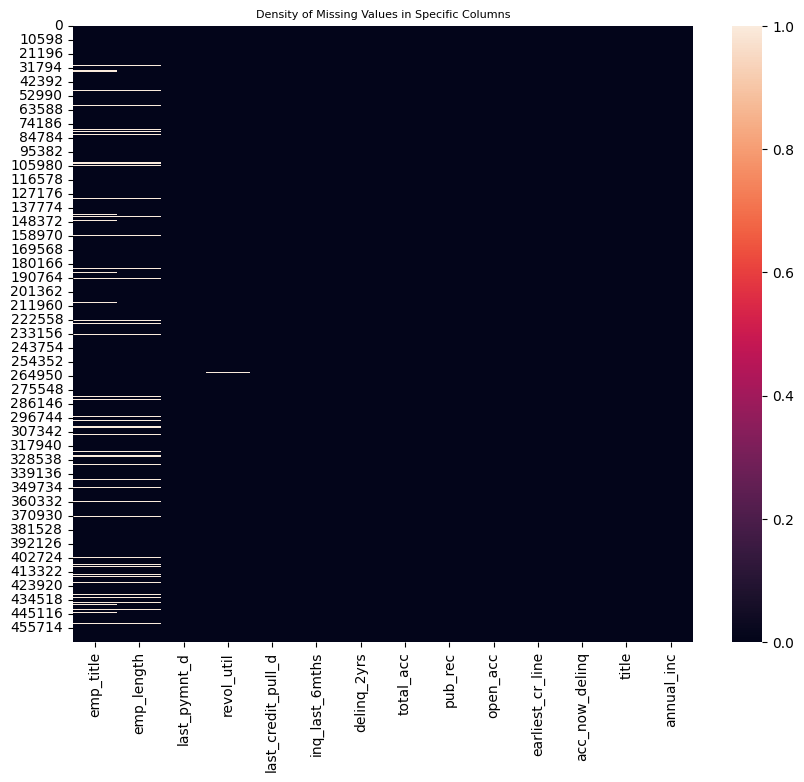

In [22]:
# Density of missing values in the data
plt.figure(figsize=(10, 8))
sns.heatmap(df[['emp_title','emp_length','last_pymnt_d','revol_util','last_credit_pull_d','inq_last_6mths','delinq_2yrs',
                'total_acc','pub_rec','open_acc','earliest_cr_line','acc_now_delinq','title','annual_inc']].isna())
plt.title('Density of Missing Values in Specific Columns', fontsize=8)
plt.show()
# terlihat banyaknya data yg missing dari kedua kolom emp_title dan emp_length

In [23]:
# Displaying the NaN values in columns emp_title and emp_length
total_NaN = (df['emp_title'].isnull()) & (df['emp_length'].isnull())

# Remove rows with total NaN emp_title and emp_length
df = df.drop(df[(df['emp_title'].isnull()) & (df['emp_length'].isnull())].index)

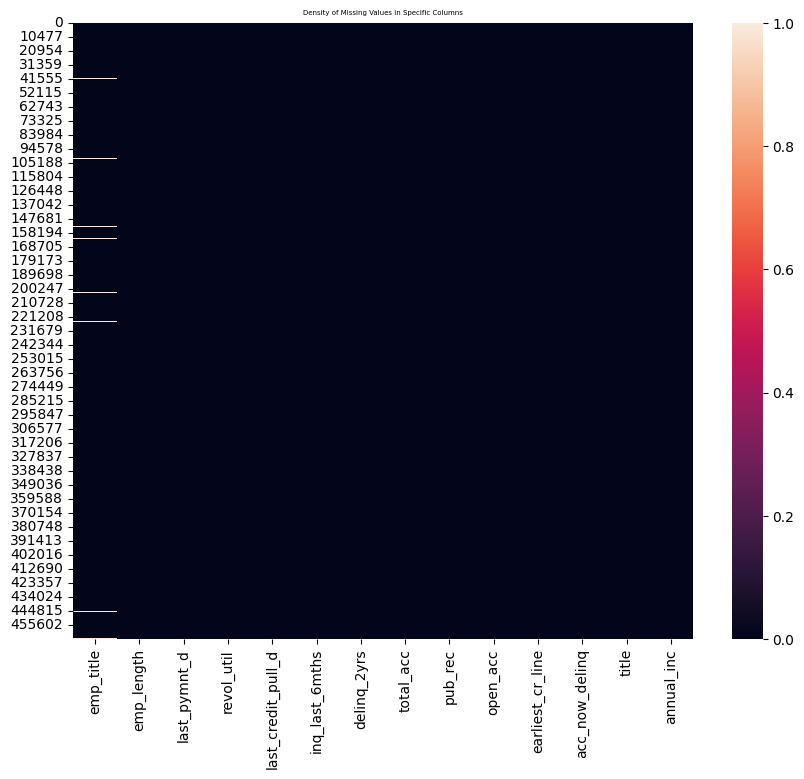

In [24]:
# Density of missing values after drop rows
plt.figure(figsize=(10, 8))
sns.heatmap(df[['emp_title','emp_length','last_pymnt_d','revol_util','last_credit_pull_d','inq_last_6mths','delinq_2yrs',
                'total_acc','pub_rec','open_acc','earliest_cr_line','acc_now_delinq','title','annual_inc']].isna())
plt.title('Density of Missing Values in Specific Columns', fontsize=5)
plt.show()

# setelah rows di drop hasil missing value pada emp_length berkurang banyak artinya banyak baris yang kosong di kedua kolom

In [25]:
# Check missing values count and percent
total= df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(14)

,Total,Percent
emp_title,6766,1.518869
last_pymnt_d,354,0.079468
revol_util,329,0.073856
emp_length,186,0.041754
last_credit_pull_d,39,0.008755
inq_last_6mths,29,0.006510
delinq_2yrs,29,0.006510
total_acc,29,0.006510
pub_rec,29,0.006510
open_acc,29,0.006510


In [26]:
# karena jumlah missing value pd data tidak terlalu banyak(hanya 0- 1 persen dari data) maka baris akan dihapus
df = df.dropna()

# Cek apakah ada missing value dalam DataFrame
if df.isna().sum().sum() == 0:
    print("Sudah Tidak ada missing value dalam DataFrame.")
else:
    print("Masih Ada missing value dalam DataFrame.")


Sudah Tidak ada missing value dalam DataFrame.


## Definition Target

In [27]:
# Definition Target
# model credit risk biasanya dilengkapi dengan skor kredit atau rating kredit
# skor kredit menunjukkan tingkat risiko yang terkait dengan peminjam atau nasabah
# Skor kredit juga digunakan oleh bank dan institusi keuangan untuk menentukan apakah pinjaman tersebut aman untuk diberikan atau tidak
# skor kredit juga menentukan seberapa besar jumlah pinjaman yang dapat diberikan, dan tingkat suku bunga yang wajar yang harus diterapkan pada pinjaman tersebut.

# Melihat Proporsional Target Dataset
df['loan_status'].value_counts()


Current                                                210060
Fully Paid                                             175035
Charged Off                                             38831
Late (31-120 days)                                       6421
In Grace Period                                          3011
Does not meet the credit policy. Status:Fully Paid       1854
Late (16-30 days)                                        1128
Default                                                   776
Does not meet the credit policy. Status:Charged Off       694
Name: loan_status, dtype: int64

In [28]:
#rename values to a smaller set of categories

df['loan_status'].replace(['Does not meet the credit policy. Status:Charged Off'],'Charged Off', inplace = True)
df['loan_status'].replace(['Does not meet the credit policy. Status:Fully Paid'],'Fully Paid', inplace = True)
df['loan_status'].replace(['Late (31-120 days)','Late (16-30 days)'],'Late', inplace = True)

In [29]:
# Showing Visualization Loan Status
import plotly.graph_objs as go
import plotly.express as px
loan_status_counts = df['loan_status'].value_counts()

fig = go.Figure(go.Bar(
    x=loan_status_counts.index,
    y=loan_status_counts.values,
    marker_color='steelblue' ))

fig.update_layout(
    title="Loan Status",
    xaxis_title="Loan Status",
    yaxis_title="Count",
    xaxis=dict(
        tickangle=35,),)
fig.show()


| category Loan | Keterangan
| --------| ------|
| `Fully Paid` | pembayaran lunas
| `Charged Off`| pembayaran macet
| `Current` | pembayaran lancar
| `Default` | gagal bayar
| `Late` | pembayaran telat dilakukan
| `In Grace Period` | dalam masa tenggang



In [30]:
# Create 2 Category BadStatus and GoodStatus

def cate_loan(x):
    if x in ['Late', 'Default','Charged Off','In Grace Period']:
        return 'bad status'
    else:
        return 'good status'

df['loan_status'] = df['loan_status'].apply(cate_loan)
loan_status = df['loan_status'].value_counts()
loan_status

good status    386949
bad status      50861
Name: loan_status, dtype: int64

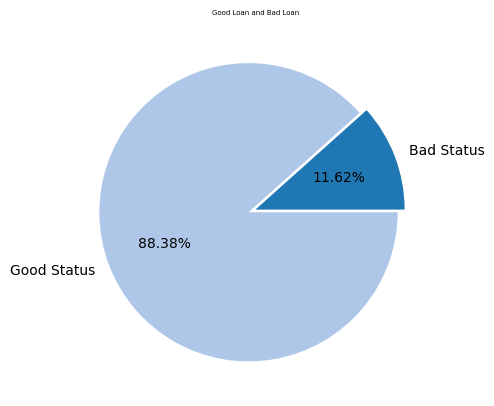

In [31]:
# Showing Pie Loan Status
loanClass_rate = loan_status / len(df.loan_status)
values = list(loan_status.sort_values().values)
labels = 'Bad Status', 'Good Status'
explode = [0, 0.05]
colors = ['#1f77b4', '#aec7e8']

plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, explode=explode, autopct=lambda p: f'{p:.2f}%', colors=colors)

plt.title('Good Loan and Bad Loan', fontsize=5)
plt.tight_layout()
plt.show()


Dapat dilihat dari tabel di atas bahwa hanya 11% dari pinjaman yang gagal bayar. Oleh karena itu, ini adalah kumpulan data yang sangat tidak seimbang, yang akan memerlukan beberapa penyesuaian parameter selama pemodelan prediksi. Namun jika kita melihat dari sisi bisnis, hal tersebut dapat menjadi tolak ukur dari kinerja perusahaan tersebut. Semakin sedikit nilai yang gagal bayar, berarti perusahaan tersebut profit.

## EDA on the Categorical Features

In [32]:
# Statistic Summary Categorical
df.describe(include='object')

,term,grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d
count,437810,437810,437810,437810,437810,437810,437810,437810,437810,437810,437810,437810,437810,437810
unique,2,7,205059,11,6,3,91,2,14,59111,647,2,98,103
top,36 months,B,Teacher,10+ years,MORTGAGE,Verified,Oct-14,good status,debt_consolidation,Debt consolidation,Oct-00,f,Jan-16,Jan-16
freq,314687,128603,5392,147175,222255,148958,36651,386949,259662,155184,3499,283518,168392,308349


In [33]:
# Check value count Term
df['term'].value_counts()

 36 months    314687
 60 months    123123
Name: term, dtype: int64

In [34]:
# merubah value menjadi 3 dan 5 tahun
df['term'] = df['term'].str.strip()
df['term'].replace('36 months', '3 tahun', inplace=True)
df['term'].replace('60 months', '5 tahun', inplace=True)
print(df['term'].value_counts())


3 tahun    314687
5 tahun    123123
Name: term, dtype: int64


In [35]:
# Check Value Grade
df['grade'].value_counts()

B    128603
C    117704
D     72002
A     70367
E     33565
F     12443
G      3126
Name: grade, dtype: int64

| Grade | Keterangan |
| ----- | ---------- |
| A | Kredit dengan risiko paling rendah. Peminjam dengan riwayat kredit yang sangat baik, termasuk riwayat pembayaran yang lancar dan rendahnya risiko kredit.
| B | Kredit dengan risiko yang sedang. Peminjam dengan riwayat kredit yang baik, tetapi mungkin memiliki beberapa riwayat keterlambatan pembayaran atau risiko kredit yang sedikit lebih tinggi daripada Grade A.
| C | Kredit dengan risiko yang cukup. Peminjam dengan riwayat kredit yang cukup baik, namun mungkin memiliki riwayat keterlambatan pembayaran yang lebih signifikan atau faktor risiko lain yang lebih menonjol.
| D | Kredit dengan risiko yang lebih tinggi. Peminjam dengan riwayat kredit yang kurang baik dan memiliki risiko pembayaran kembali yang lebih tinggi.
| E | Kredit dengan risiko sangat tinggi. Peminjam dengan riwayat kredit yang buruk dan risiko pembayaran kembali yang tinggi.
| F | Kredit dengan risiko sangat tinggi dan kemungkinan besar tidak memiliki kemampuan untuk membayar kembali pinjaman.
| G |  Kredit dengan risiko tertinggi dan kemungkinan besar tidak dapat membayar kembali pinjaman.

In [36]:
# check data emp_title
df['emp_title']

1                                         Ryder
3                           AIR RESOURCES BOARD
4                      University Medical Group
5                          Veolia Transportaton
6                     Southern Star Photography
                          ...                  
466279                   Director of Operations
466280                       Financial Advisor 
466281    Chief of Interpretation (Park Ranger)
466282                                   patrol
466283                     Server Engineer Lead
Name: emp_title, Length: 437810, dtype: object

In [37]:
# Merubah data menjadi tdk ada yang huruf besar
df['emp_title'] = df['emp_title'].str.title()

In [38]:
# mengabungkan title employe rn ke registered nurse karena datanya mirip
mapping_rn = {
       'Rn': 'Registered Nurse'}
df['emp_title'] = df['emp_title'].replace(mapping_rn)

In [39]:
# Check value emp_title terbanyak
emp_title_counts = df['emp_title'].value_counts()
top_10_emp_title = emp_title_counts.head(10) # Mengambil 10 nilai teratas yang paling sering muncul (10 nilai modus)
print("10 nilai data yang paling sering muncul dalam kolom 'emp_title':")
print(top_10_emp_title)

10 nilai data yang paling sering muncul dalam kolom 'emp_title':
Teacher             6654
Manager             5994
Registered Nurse    5745
Supervisor          2850
Owner               2476
Sales               2445
Driver              2349
Project Manager     1888
Office Manager      1858
General Manager     1690
Name: emp_title, dtype: int64


In [40]:
# persentase data emp_title
def count_and_percentage(df, keyword):
    contains_keyword = df['emp_title'].str.contains(keyword, case=False)  # Mencari nilai yang mengandung kata kunci dalam kolom "emp_title"
    count = contains_keyword.sum()
    percentage = (count / df.shape[0]) * 100
    return count, percentage

keywords = ["Teacher", "Manager", "Lead", "Chief", "Director","President","Supervisor","Owner","Sales","Analyst","Driver","Nurse","Engineer","Officer"]

for keyword in keywords:
    count_keyword, percentage_keyword = count_and_percentage(df, keyword)
    print(f"Total Data '{keyword}' pada kolom 'emp_title':", count_keyword)
    print(f"Persentase '{keyword}': {percentage_keyword:.2f}%\n")

Total Data 'Teacher' pada kolom 'emp_title': 8369
Persentase 'Teacher': 1.91%

Total Data 'Manager' pada kolom 'emp_title': 43069
Persentase 'Manager': 9.84%

Total Data 'Lead' pada kolom 'emp_title': 4742
Persentase 'Lead': 1.08%

Total Data 'Chief' pada kolom 'emp_title': 1371
Persentase 'Chief': 0.31%

Total Data 'Director' pada kolom 'emp_title': 11399
Persentase 'Director': 2.60%

Total Data 'President' pada kolom 'emp_title': 3875
Persentase 'President': 0.89%

Total Data 'Supervisor' pada kolom 'emp_title': 8450
Persentase 'Supervisor': 1.93%

Total Data 'Owner' pada kolom 'emp_title': 3552
Persentase 'Owner': 0.81%

Total Data 'Sales' pada kolom 'emp_title': 10794
Persentase 'Sales': 2.47%

Total Data 'Analyst' pada kolom 'emp_title': 7948
Persentase 'Analyst': 1.82%

Total Data 'Driver' pada kolom 'emp_title': 6051
Persentase 'Driver': 1.38%

Total Data 'Nurse' pada kolom 'emp_title': 9052
Persentase 'Nurse': 2.07%

Total Data 'Engineer' pada kolom 'emp_title': 9451
Persentase

In [41]:
#Check Value emp_length
df['emp_length'].value_counts()

10+ years    147175
2 years       40897
3 years       35988
< 1 year      35569
5 years       30196
1 year        29332
4 years       27520
7 years       25731
6 years       25692
8 years       22056
9 years       17654
Name: emp_length, dtype: int64

In [42]:
# Membuat kategori emp_length
df['emp_length'] = df['emp_length'].replace(['< 1 year'], '1 tahun')
df['emp_length'] = df['emp_length'].replace(['1 year', '2 years','3 years'], '1-3 tahun')
df['emp_length'] = df['emp_length'].replace(['4 years', '5 years'], '4-5 tahun')
df['emp_length'] = df['emp_length'].replace(['6 years', '7 years','8 years','9 years'], '6-9 tahun')
df['emp_length'] = df['emp_length'].replace(['10+ years'], '10 tahun')

In [43]:
# check emp_length after make category
df['emp_length'].value_counts()

10 tahun     147175
1-3 tahun    106217
6-9 tahun     91133
4-5 tahun     57716
1 tahun       35569
Name: emp_length, dtype: int64

In [44]:
# Check Home_ownership
df['home_ownership'].value_counts()

MORTGAGE    222255
RENT        178156
OWN          37183
OTHER          172
NONE            43
ANY              1
Name: home_ownership, dtype: int64

In [45]:
# menghapus any dan other pd kolom homeownership
df = df[~df['home_ownership'].isin(['ANY', 'OTHER'])]

In [46]:
# check value home_ownership after drop any and other
df['home_ownership'].value_counts()

MORTGAGE    222255
RENT        178156
OWN          37183
NONE            43
Name: home_ownership, dtype: int64

| home_ownership | keterangan |
| ------ | ----|
| MORTGAGE | Peminjam memiliki rumah yang dibiayai dengan hipotek.
| RENT |  Peminjam menyewa tempat tinggal dan tidak memiliki kepemilikan rumah.
| OWN | Peminjam memiliki rumah dan tidak ada hipotek atau pinjaman.
| NONE | Peminjam tidak memiliki kepemilikan rumah.

In [47]:
# mengabungan data source verified
print(df['verification_status'].value_counts())
df['verification_status'] = df['verification_status'].replace('Source Verified', 'Verified')

Verified           148893
Not Verified       145692
Source Verified    143052
Name: verification_status, dtype: int64


In [48]:
df['verification_status'].value_counts()

Verified        291945
Not Verified    145692
Name: verification_status, dtype: int64

| verification_status | keterangan |
| ------ | ----|
| Verified | Peminjam telah memberikan dokumentasi atau bukti yang memadai untuk memverifikasi informasi keuangan yang diberikan.
| Not Verified |  Peminjam belum memberikan atau lembaga pemberi pinjaman belum memeriksa secara menyeluruh dokumen atau bukti yang diperlukan untuk memverifikasi informasi keuangan.

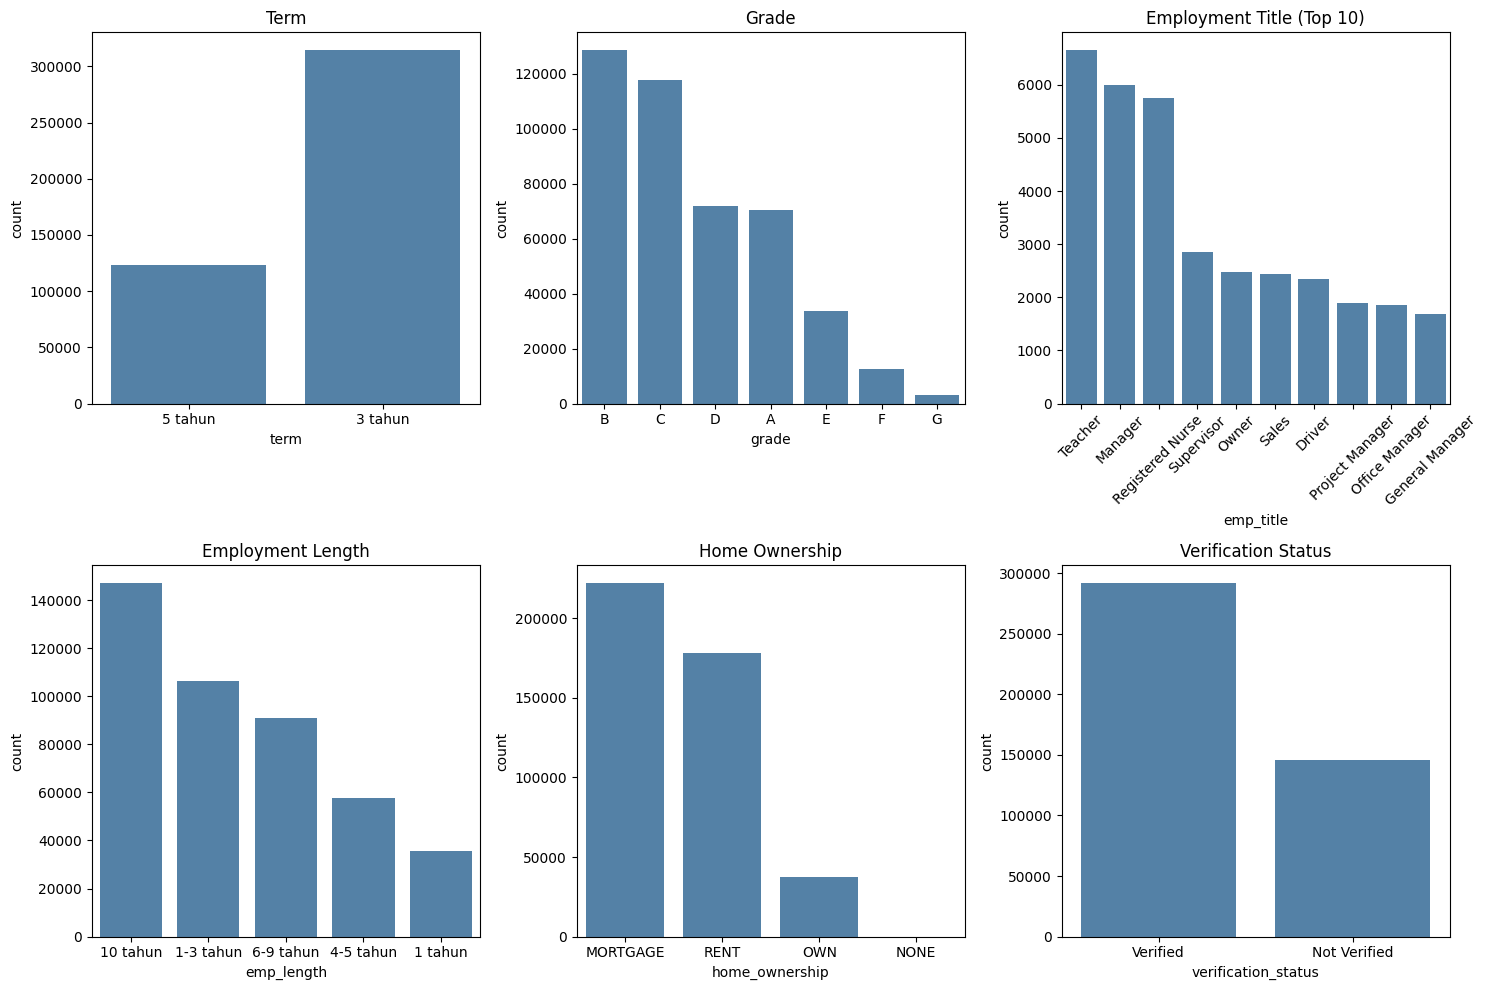

In [49]:
# Showing Categorical Feature Analysis
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
grade_counts = df['grade'].value_counts().sort_values(ascending=False)
length_counts = df['emp_length'].value_counts().sort_values(ascending=False)
home_counts = df['home_ownership'].value_counts().sort_values(ascending=False)

plt.subplot(2, 3, 1)
sns.countplot(data=df, x='term', color='steelblue')
plt.title('Term')

plt.subplot(2, 3, 2)
sns.countplot(data=df, x='grade', color='steelblue', order=grade_counts.index)
plt.title('Grade')

plt.subplot(2, 3, 3)
sns.countplot(data=df, x='emp_title', color='steelblue', order=df['emp_title'].value_counts().iloc[:10].index)
plt.xticks(rotation=45)
plt.title('Employment Title (Top 10)')


plt.subplot(2, 3, 4)
sns.countplot(data=df, x='emp_length', color='steelblue', order=length_counts.index)
plt.title('Employment Length')

plt.subplot(2, 3, 5)
sns.countplot(data=df, x='home_ownership', color='steelblue', order=home_counts.index)
plt.title('Home Ownership')

plt.subplot(2, 3, 6)
sns.countplot(data=df, x='verification_status', color='steelblue')
plt.title('Verification Status')
plt.tight_layout()
plt.show()

In [50]:
# Check purpose tujuan peminjaman berdasarkan pemberi peminjam
df['purpose'].value_counts()

debt_consolidation    259601
credit_card            97495
home_improvement       24388
other                  21762
major_purchase          9155
small_business          5834
car                     5051
medical                 4238
moving                  2765
vacation                2291
wedding                 2253
house                   2110
educational              378
renewable_energy         316
Name: purpose, dtype: int64

In [51]:
# check title (tujuan peminjaman berdasarkan peminjam)
df['title'] = df['title'].str.title()
df['title'] = df['title'].str.strip()
title_counts = df['title'].value_counts()
title_counts.head(50)

# Terlihat banyaknya data yang mirip selanjutnya data yang mirip akan digabungkan

Debt Consolidation                176643
Credit Card Refinancing            58689
Home Improvement                   16219
Other                              11836
Consolidation                       7749
Major Purchase                      4607
Debt Consolidation Loan             4600
Credit Card Consolidation           3481
Personal Loan                       3239
Business                            3052
Medical Expenses                    2639
Consolidation Loan                  2569
Credit Card Payoff                  2419
Credit Card Refinance               2407
Consolidate                         2078
Personal                            2001
Car Financing                       1995
Vacation                            1637
Loan                                1570
Moving And Relocation               1397
Debt                                1379
Credit Cards                        1365
Payoff                              1357
Freedom                             1222
Credit Card     

In [52]:
# Check Value yg sama dengan Consolidation
contains_consolidation = df['title'].str.contains('consolidation', case=False)
df_consolidation = df[contains_consolidation]
df_consolidation['title'].value_counts().head(10)

Debt Consolidation                176643
Consolidation                       7749
Debt Consolidation Loan             4600
Credit Card Consolidation           3481
Consolidation Loan                  2569
Credit Consolidation                 700
Cc Consolidation                     556
Bill Consolidation                   540
Loan Consolidation                   425
Credit Card Debt Consolidation       419
Name: title, dtype: int64

`Untuk menggabungkan nilai-nilai yang mirip atau typo agar data lebih terstruktur dan mudah dianalisis.`

| Tujuan dari Peminjam | Keterangan
| ----| ----|
| Debt Consolidation | proses menggabungkan beberapa utang atau pinjaman yang berbeda menjadi satu pinjaman tunggal.
| | Tujuan debt consolidation : untuk membantu mengurangi beban pembayaran utang dengan menggabungkan utang-utang yang ada menjadi satu pinjaman dengan suku bunga yang lebih rendah atau jangka waktu pembayaran yang lebih lama.
| | peminjam biasanya mengajukan pinjaman baru untuk membayar utang-utang yang ada. Setelah pinjaman baru tersebut disetujui, peminjam menggunakan dana dari pinjaman tersebut untuk melunasi utang-utang yang ada, sehingga sisa utangnya hanya berada dalam satu pinjaman baru.

In [53]:
# megabungkan data yang mirip debt consolidation
mapping = {
    'Consolidation': 'Debt Consolidation',
    'Debt Consolidation Loan': 'Debt Consolidation',
    'Consolidation Loan': 'Debt Consolidation',
    'Credit Consolidation': 'Debt Consolidation',
    'Loan Consolidation': 'Debt Consolidation',
    'Debt_Consolidation': 'Debt Consolidation',
    'Debit Consolidation': 'Debt Consolidation',
    'Card Consolidation': 'Debt Consolidation',
    'Debtconsolidation': 'Debt Consolidation',
    'My Debt Consolidation': 'Debt Consolidation',
    'Cc Debt Consolidation': 'Debt Consolidation',
    'My Debt Consolidation Loan': 'Debt Consolidation',
    'Credit Debt Consolidation ': 'Debt Consolidation',
    'Debt Consolidation Help': 'Debt Consolidation',
    'Debt Consolidations': 'Debt Consolidation',
    '2012 Consolidation': 'Debt Consolidation',
    'Total Debt Consolidation': 'Debt Consolidation',
    'Loan For Debt Consolidation': 'Debt Consolidation',
    'Debt Consolidation Plan': 'Debt Consolidation',
    'High Interest Debt Consolidation': 'Debt Consolidation',
    'Debt Consolidation.': 'Debt Consolidation',
    'Consolidation': 'Debt Consolidation',
    '2012 Debt Consolidation': 'Debt Consolidation',
    'Consolidationloan': 'Debt Consolidation',
    'Final Debt Consolidation': 'Debt Consolidation',
    'Debt  Consolidation': 'Debt Consolidation',
    'Consolidation 2013': 'Debt Consolidation',
    '2013 Consolidation': 'Debt Consolidation',
    '2013 Debt Consolidation': 'Debt Consolidation',
    'Debt Consolidation 2': 'Debt Consolidation',
    'Deb Consolidation': 'Debt Consolidation',
    'Dedt Consolidation': 'Debt Consolidation',
    'Consolidation Of Debt': 'Debt Consolidation',
    'Dept Consolidation': 'Debt Consolidation',
    'My Consolidation': 'Debt Consolidation',
    'Personal Debt Consolidation': 'Debt Consolidation',
    'Debt Consolidation 2013': 'Debt Consolidation',
    'Credit Consolidation Loan': 'Debt Consolidation',
    'Debt Consolidation 2012': 'Debt Consolidation',
    'Debt Consolidation/Home Improvement': 'Debt Consolidation',
    'Bill Consolidation Loan': 'Debt Consolidation',
    'My Consolidation Loan': 'Debt Consolidation',
    'Debt Consolidation 1': 'Debt Consolidation',
    'Debt Consolidation And Home Improvement': 'Debt Consolidation',
    'Deb Consolidation': 'Debt Consolidation',
    'Personal Consolidation': 'Debt Consolidation',
    'Consolidation1': 'Debt Consolidation',
    'Debt Consolidation Load': 'Debt Consolidation',
    'Personal Consolidation Loan': 'Debt Consolidation',
    'Debt Consolidation 2011': 'Debt Consolidation',
    'Debt Consolidation & Home Improvement': 'Debt Consolidation',
    'Debit Consolidation Loan': 'Debt Consolidation',
    'Lending Club Debt Consolidation': 'Debt Consolidation',
    'Final Consolidation': 'Debt Consolidation',
    'Consolidation 2': 'Debt Consolidation',
    'Consolidation 1': 'Debt Consolidation',
    'Consolidation Of Bills': 'Debt Consolidation',
    'Student Loan Consolidation': 'Debt Consolidation',
    'Debtconsolidationloan': 'Debt Consolidation',
    'Consolidation/Home Improvement': 'Debt Consolidation',
    'Consolidation Load': 'Debt Consolidation',
    'Consolidation 2012': 'Debt Consolidation',
    'Debt Consolidation!': 'Debt Consolidation',
    'Bills Consolidation': 'Debt Consolidation',
    'Personal Debt Consolidation Loan': 'Debt Consolidation',
    'High Interest Consolidation': 'Debt Consolidation',
    'Loan For Consolidation': 'Debt Consolidation',
    'Small Debt Consolidation': 'Debt Consolidation',
    'Ccconsolidation': 'Debt Consolidation',
    'Consolidation Plan': 'Debt Consolidation',
    'Consolidations': 'Debt Consolidation',
    'Reconsolidation' : 'Debt Consolidation',
    'Debt. Consolidation' : 'Debt Consolidation',
    'Deby Consolidation' : 'Debt Consolidation',
    'Consolidation Debt' : 'Debt Consolidation',
    'Loanconsolidation' : 'Debt Consolidation',
    'Lending Club Consolidation' : 'Debt Consolidation',
    'Complete Debt Consolidation' : 'Debt Consolidation',
    'Mydebtconsolidation' : 'Debt Consolidation',
    'Debt Consolidation/Wedding' : 'Debt Consolidation',
    'Debt Reconsolidation' : 'Debt Consolidation',
    'Dept Consolidation Loan' : 'Debt Consolidation',
    'Debt/Credit Card Consolidation' : 'Debt Consolidation',
    'Consolidation!' : 'Debt Consolidation',
    'Debt Consolidation And Home Improvements' : 'Debt Consolidation',
    '2011 Consolidation' : 'Debt Consolidation',
    'Debt Consolidation/Home Repair' : 'Debt Consolidation',
    'Payment Consolidation' : 'Debt Consolidation',
    'Debt Consolidation Cc' : 'Debt Consolidation',
    'Lc Consolidation' : 'Debt Consolidation',
    'Simple Debt Consolidation' : 'Debt Consolidation',
    'Debt_Consolidation Loan' : 'Debt Consolidation',
    'Chase Consolidation' : 'Debt Consolidation',
    'Personal Loan Consolidation' : 'Debt Consolidation',
    'Responsible Debt Consolidation' : 'Debt Consolidation',
    'New Consolidation' : 'Debt Consolidation',
    'Debt Consolidation Loan 1' : 'Debt Consolidation',
    'Consolidation Time' : 'Debt Consolidation',
    'Cc Debt Consolidation Loan' : 'Debt Consolidation',
    'Lower Interest Debt Consolidation' : 'Debt Consolidation',
    'Consolidation2' : 'Debt Consolidation',
    'Debt Consolidation Ii' : 'Debt Consolidation',
    'Lc Debt Consolidation' : 'Debt Consolidation',
    'Home Improvement & Debt Consolidation' : 'Debt Consolidation',
    'Card Consolidation Loan' : 'Debt Consolidation',
    'Revolving Debt Consolidation' : 'Debt Consolidation',
    'Credit Card Consolidations' : 'Debt Consolidation',
    'Smart Consolidation' : 'Debt Consolidation',
    'Debt Consolidation/Home Repairs' : 'Debt Consolidation',
    'Lc Consolidation Loan' : 'Debt Consolidation',
    'Business Debt Consolidation' : 'Debt Consolidation',
    '2011 Debt Consolidation' : 'Debt Consolidation',
    'Consolidation 2010' : 'Debt Consolidation',
    'Debt Consolidation / Home Improvement' : 'Debt Consolidation',
    'Debt Consolidation - Credit Cards' : 'Debt Consolidation',
    'Debt Consolidation And Payoff' : 'Debt Consolidation',
    'Consolidation #1' : 'Debt Consolidation',
    'Lending Club Consolidation Loan' : 'Debt Consolidation',
    'Consolidation Of Credit Card Debt' : 'Debt Consolidation',
    'Debt Consolidation/Home Improvements' : 'Debt Consolidation',
    'Consolidation Help' : 'Debt Consolidation',
    'Debts Consolidation' : 'Debt Consolidation',
    'Creditconsolidation' : 'Debt Consolidation',
    'The Consolidation' : 'Debt Consolidation',
    'Student Debt Consolidation' : 'Debt Consolidation',
    'Deb Consolidation Loan' : 'Debt Consolidation',
    'Consolidation Loans' : 'Debt Consolidation',
    'Lower Interest Consolidation' : 'Debt Consolidation',
    'Consolidation And Home Improvement' : 'Debt Consolidation',
    'Personal Loan For Debt Consolidation' : 'Debt Consolidation',
    'Consolidation 2011' : 'Debt Consolidation',
    'Debt Consolidation For Credit Cards' : 'Debt Consolidation',
    'Consolidation & Home Improvement' : 'Debt Consolidation',
    'Debt Consolidation And Refinancing' : 'Debt Consolidation',
    'Short Term Debt Consolidation' : 'Debt Consolidation',
    'Myconsolidation' : 'Debt Consolidation',
    'Debt-Consolidation' : 'Debt Consolidation',
    'Debt Consolidation And Refinance' : 'Debt Consolidation',
    'Cards Consolidation' : 'Debt Consolidation',
    'Consolidation2012' : 'Debt Consolidation',
    'Consolidation  Loan' : 'Debt Consolidation',
    'My Consolidation Plan' : 'Debt Consolidation',
    'Home Improvement Debt Consolidation' : 'Debt Consolidation',
    'Debt Consolidation Loan.' : 'Debt Consolidation',
    'Citi Consolidation' : 'Debt Consolidation',
    'Debtconsolidation2013' : 'Debt Consolidation',
    'Personal/Debt Consolidation' : 'Debt Consolidation',
    'Consolidation Of Debt Loan': 'Debt Consolidation',
    'Consolidation Loan 2013': 'Debt Consolidation',
    'Lending Club Debt Consolidation Loan': 'Debt Consolidation',
    'Debt Consolidation Loan 2': 'Debt Consolidation',
    'Debt Consolidation Needed': 'Debt Consolidation',
    'Debt Consolidation Request': 'Debt Consolidation',
    'Smart Debt Consolidation': 'Debt Consolidation',
    'Life Consolidation': 'Debt Consolidation',
    'Debt Consolidation And New Roof': 'Debt Consolidation',
    'Consolidation And Payoff': 'Debt Consolidation',
    'Debet Consolidation': 'Debt Consolidation',
    '2013 Consolidation Loan': 'Debt Consolidation',
    'Debt Consolidation - Cc': 'Debt Consolidation',
    'Total Consolidation': 'Debt Consolidation',
    'Debt Consolidation, Home Improvement': 'Debt Consolidation',
    'Debt Consolidation Loan Request': 'Debt Consolidation',
    'My Loan Consolidation': 'Debt Consolidation',
    'Debt Consolidation Laon': 'Debt Consolidation',
    'Debt Consolidation/Home Improvement Loan': 'Debt Consolidation',
    'Debt Consolidation Payoff': 'Debt Consolidation',
    'Full Consolidation': 'Debt Consolidation',
    'Consolidation Laon': 'Debt Consolidation',
    'Consolidation Funds': 'Debt Consolidation',
    'Family Debt Consolidation': 'Debt Consolidation',
    'Consolidation Fund': 'Debt Consolidation',
    'Business Consolidation Loan': 'Debt Consolidation',
    'Unsecured Debt Consolidation': 'Debt Consolidation',
    'Consolidation For The Future': 'Debt Consolidation',
    'Load Consolidation': 'Debt Consolidation',
    'Debt Consolidation - Lower Interest Rate': 'Debt Consolidation',
    'Dedt Consolidation Loan': 'Debt Consolidation',
    'My Debt Consolidation Plan': 'Debt Consolidation',
    'Consolidation2013': 'Debt Consolidation',
    'Debt Consolidation To Lower Interest': 'Debt Consolidation',
    'High Interest Rate Consolidation': 'Debt Consolidation',
    'Debt Consolidation And Medical Expenses': 'Debt Consolidation',
    'Debt Consolidation/Medical Bills': 'Debt Consolidation',
    'Debt Consolidation Refinance': 'Debt Consolidation',
    'Loan Consolidation 2012': 'Debt Consolidation',
    'Debt Consolidation #1': 'Debt Consolidation',
    'Fresh Start Consolidation': 'Debt Consolidation',
    'Consolidate': 'Debt Consolidation',
    'Debt Consolidate' : 'Debt Consolidation',
    'Consolidate Debt' : 'Debt Consolidation',
    'Debt Consolodation':'Debt Consolidation',
    'Debt Cosolidation':'Debt Consolidation',
    'Debt Consilidation' :'Debt Consolidation',
    'Consol' :'Debt Consolidation',
    'Consolidate Loan' : 'Debt Consolidation',
    'Consolodation' :'Debt Consolidation',
    'Consolidate Bills' : 'Debt Consolidation',
    'Consolidated' : 'Debt Consolidation',
    'Consolidating Debt': 'Debt Consolidation',
    'Debt Consoldation': 'Debt Consolidation',
    'Consolidating' : 'Debt Consolidation',
    'Consolidated Loan' : 'Debt Consolidation',
    'Debt Consildation' : 'Debt Consolidation',
    'Consolodate' : 'Debt Consolidation',
    'Consolidator' : 'Debt Consolidation',
    'Consoladation' : 'Debt Consolidation',
    'Consolidating My Debt' : 'Debt Consolidation',
    'Consol Loan' : 'Debt Consolidation',
    'Consolidate Debts' : 'Debt Consolidation',
    'Cosolidation' : 'Debt Consolidation',
    'Consolidate Cards' : 'Debt Consolidation',
    'Consolidate My Debt' : 'Debt Consolidation',
    'Debt Consoildation' : 'Debt Consolidation',
    'Consolidated Debt' : 'Debt Consolidation',
    'Consolodation Loan' : 'Debt Consolidation' ,
    'Debt Consolidating' : 'Debt Consolidation' ,
    'Consalidation' : 'Debt Consolidation' ,
    'Debt Concolidation' : 'Debt Consolidation' ,
    'Consilidation' : 'Debt Consolidation' ,
    'Debt Consolodation Loan' : 'Debt Consolidation',
    'Debt Consolidated' : 'Debt Consolidation',
    'Consoldation' : 'Debt Consolidation' ,
    'Consolidate 2013' : 'Debt Consolidation' ,
    'Consolidate 1' : 'Debt Consolidation' ,
    'Debt Consoliation' : 'Debt Consolidation',
    'Consolidate Credit' : 'Debt Consolidation',
    'Debt Consoidation' : 'Debt Consolidation',
    'Debtconsolidate' : 'Debt Consolidation' ,
    'Consolidate Me' : 'Debt Consolidation',
    'Consolidating Loan': 'Debt Consolidation',
    'Debt Consolidatio': 'Debt Consolidation',
    'Debt Consolidtion': 'Debt Consolidation',
    'Debt Consolidatoin': 'Debt Consolidation',
    'Consoladation Loan': 'Debt Consolidation',
    'Consolidate My Bills': 'Debt Consolidation',
    'Consolidating Bills': 'Debt Consolidation',
    'Bill Consolidation': 'Debt Consolidation',
    'Consolidate Cc': 'Debt Consolidation',
    'Debt Consolidatin': 'Debt Consolidation',
    'Debt Consol': 'Debt Consolidation',
    'Debt Consoladation' : 'Debt Consolidation',
    'Debt Consolidator' : 'Debt Consolidation',
    'Debt Cons.' : 'Debt Consolidation',
    'Debtcon' :'Debt Consolidation',
    'Debt Con' : 'Debt Consolidation',
    'Debtconsol' : 'Debt Consolidation',
    'Debt Cons': 'Debt Consolidation',
    'Debt Consolid': 'Debt Consolidation',
    'Debt Considation': 'Debt Consolidation',
    'Debt Consoildation' : 'Debt Consolidation',
    'Debt Consolation' : 'Debt Consolidation',
    'Debt Consolitation' : 'Debt Consolidation',
    'Debt Consolidaton' : 'Debt Consolidation',
    'Debt Consol.' : 'Debt Consolidation',
    'Debt Consol Loan' : 'Debt Consolidation',
    'Debt Consalidation' : 'Debt Consolidation',
    'Debt Conslidation' : 'Debt Consolidation',
    'Debt Conso' : 'Debt Consolidation',
    'Debt Consildation' : 'Debt Consolidation',
    'Consolidate Loans' : 'Debt Consolidation',
    'Consolidate Cc Debt' : 'Debt Consolidation',
    'Debt Condolidation' : 'Debt Consolidation',
    'Loan Consolidate' : 'Debt Consolidation',
    'Conslidation': 'Debt Consolidation',
    'Debt Consolitdation': 'Debt Consolidation',
    'Consolid': 'Debt Consolidation',
    'Cosolidate': 'Debt Consolidation',
    'Consildation': 'Debt Consolidation',
    'Consolidating Debts': 'Debt Consolidation',
    'Consolidacion': 'Debt Consolidation',
    'Debt Consoldiation': 'Debt Consolidation',
    'Debt Cosolidation Loan': 'Debt Consolidation',
    'Debt Consolo': 'Debt Consolidation',
    'Debt Conolidation': 'Debt Consolidation',
    'Debt Consiladation': 'Debt Consolidation',
    'Consolidate1': 'Debt Consolidation',
    'Debt Consolication': 'Debt Consolidation',
    'Consoildation': 'Debt Consolidation',
    'Consolidate Debt Loan': 'Debt Consolidation',
    'Consoladate': 'Debt Consolidation',
    'Condolidation': 'Debt Consolidation',
    'Consilidation Loan': 'Debt Consolidation',
    'Consolitation': 'Debt Consolidation',
    'Conso Loan': 'Debt Consolidation',
    'Consolidate Now': 'Debt Consolidation',
    'Consolidate Credit Debt': 'Debt Consolidation',
    'Consolidate!': 'Debt Consolidation',
    'Consolidate 2012': 'Debt Consolidation',
    'Consolidaton': 'Debt Consolidation',
    'Debt Consolidaion' : 'Debt Consolidation',
    'Consolidating High Interest Credit Cards': 'Debt Consolidation',
    'Looking To Consolidate Debt': 'Debt Consolidation',
    'Consoliation Loan': 'Debt Consolidation',
    'Consolidate Credit Card Payments': 'Debt Consolidation',
    'Loan To Consolidate Debt': 'Debt Consolidation'}
df['title'] = df['title'].replace(mapping)


In [54]:
# Check Value yg sama dengan Credit card
contains_cc = df['title'].str.contains('credit card', case=False)
df_cc = df[contains_cc]
df_cc['title'].value_counts().head(10)

Credit Card Refinancing      58689
Credit Card Consolidation     3481
Credit Card Payoff            2419
Credit Card Refinance         2407
Credit Cards                  1365
Credit Card                   1203
Credit Card Loan              1060
Pay Off Credit Cards           704
Credit Card Debt               561
Credit Card Refi               554
Name: title, dtype: int64

In [55]:
# megabungkan data sejenis Credit Card
mapping_cc = {
    'Credit Card Refinancing': 'Credit Card',
    'Credit Card Consolidation': 'Credit Card',
    'Credit Card Payoff': 'Credit Card',
    'Credit Card Refinance': 'Credit Card',
    'Credit Card Loan': 'Credit Card',
    'Pay Off Credit Cards': 'Credit Card',
    'Credit Card Debt': 'Credit Card',
    'Credit Card Refi': 'Credit Card',
    'Credit Card Pay Off': 'Credit Card',
    'Credit Card Debt Consolidation': 'Credit Card',
    'Credit Card Refinance Loan': 'Credit Card',
    'Credit Card Consolidation Loan': 'Credit Card',
    'Credit Card Payment': 'Credit Card',
    'Pay Off Credit Card': 'Credit Card',
    'Credit Card Payoff Loan': 'Credit Card',
    'Payoff Credit Cards': 'Credit Card',
    'Credit Card Repayment': 'Credit Card',
    'No More Credit Cards': 'Credit Card',
    'Consolidate Credit Cards': 'Credit Card',
    'Paying Off Credit Cards': 'Credit Card',
    'Pay Credit Cards': 'Credit Card',
    'Credit Card Relief': 'Credit Card',
    'Credit Card Payoffs': 'Credit Card',
    'Credit Card Payments': 'Credit Card',
    'Credit Card Freedom': 'Credit Card',
    'Consolidate Credit Card Debt': 'Credit Card',
    'Credit Card Pay-Off': 'Credit Card',
    'Credit Card Elimination': 'Credit Card',
    'Credit Cards Payoff': 'Credit Card',
    'Pay Off Credit Card Debt': 'Credit Card',
    'Credit Card Consolidate': 'Credit Card',
    'Credit Card Reduction': 'Credit Card',
    'Credit Cards Consolidation': 'Credit Card',
    'Refinance Credit Cards': 'Credit Card',
    'Credit Cards Pay Off': 'Credit Card',
    'Credit Card Paydown': 'Credit Card',
    'Consolidating Credit Cards': 'Credit Card',
    'Pay Credit Card': 'Credit Card',
    'Credit Card Debt Payoff': 'Credit Card',
    'Pay Off High Interest Credit Cards': 'Credit Card',
    'Refinance Credit Card': 'Credit Card',
    'Credit Card Free': 'Credit Card',
    'Credit Card Consolodation': 'Credit Card',
    'Bye Bye Credit Cards': 'Credit Card',
    'Credit Card Debt Consolidation Loan': 'Credit Card',
    'Consolidating Credit Card Debt': 'Credit Card',
    'Get Rid Of Credit Cards': 'Credit Card',
    'Payoff Credit Card': 'Credit Card',
    'Credit Cards': 'Credit Card',
    'Credit Card Debit': 'Credit Card',
    'Goodbye Credit Cards': 'Credit Card',
    'Credit Card Debt Loan': 'Credit Card',
    'Credit Card Help': 'Credit Card',
    'Credit Cards Gone': 'Credit Card',
    'Credit Card Consol': 'Credit Card',
    'Pay Of Credit Cards': 'Credit Card',
    'Consolidation Of Credit Cards': 'Credit Card',
    'Credit Card Refinace': 'Credit Card',
    'High Interest Credit Card Consolidation': 'Credit Card',
    'Credit Card Refi Loan': 'Credit Card',
    'Pay Off High Interest Credit Card': 'Credit Card',
    'Pay Off My Credit Cards': 'Credit Card',
    'Paying Off Credit Card Debt': 'Credit Card',
    'Credit Card Pay Off Loan': 'Credit Card',
    'Credit Cards Refinance': 'Credit Card',
    'Refinance Credit Card Debt': 'Credit Card',
    'Freedom From Credit Cards': 'Credit Card',
    'Credit Card Refiance': 'Credit Card',
    'Credit Card Pay Down': 'Credit Card',
    'Credit Card Refinancing Loan': 'Credit Card',
    'No More Credit Cards!': 'Credit Card',
    'Credit Cards Be Gone': 'Credit Card',
    'Refinancing Credit Cards': 'Credit Card',
    'Get Out Of Credit Card Debt': 'Credit Card',
    'Eliminate Credit Card Debt': 'Credit Card',
    'Credit Card Killer': 'Credit Card',
    'Credit Card Re-Fi': 'Credit Card',
    'No More Credit Card Debt': 'Credit Card',
    'Credit Cards Loan': 'Credit Card',
    'Credit Card Debt Reduction': 'Credit Card',
    'Paying Off My Credit Cards': 'Credit Card',
    'Refi Credit Cards': 'Credit Card',
    'Credit Card Debts': 'Credit Card',
    'Credit Card Clean Up': 'Credit Card',
    'Credit Card Debt Free': 'Credit Card',
    'Get Rid Of Credit Card Debt': 'Credit Card',
    'Credit Card Debt Elimination': 'Credit Card',
    'Eliminate Credit Cards': 'Credit Card',
    'Credit Card Cleanup': 'Credit Card',
    'Credit Card Payment Loan': 'Credit Card',
    'High Interest Credit Card Payoff': 'Credit Card',
    'Paying Off High Interest Credit Cards': 'Credit Card',
    'Consolidate High Interest Credit Cards': 'Credit Card',
    'Paying Off Credit Card': 'Credit Card',
    'Credit Card Consilidation': 'Credit Card',
    'Credit Card Pay Offs': 'Credit Card',
    'Credit Card Bills': 'Credit Card',
    'No Credit Cards': 'Credit Card',
    'Pay Down Credit Cards': 'Credit Card',
    'Refinancing Credit Card': 'Credit Card',
    'Payoff Credit Card Debt': 'Credit Card',
    'Credit Card Re-Finance': 'Credit Card',
    'Credit Card Repayment Loan': 'Credit Card',
    'Credit Card Pay': 'Credit Card',
    'Credit Card Eliminator': 'Credit Card',
    'Pay Off All Credit Cards': 'Credit Card',
    'Credit Card And Debt Consolidation': 'Credit Card',
    'Pay Off High Interest Rate Credit Cards': 'Credit Card',
    'Getting Out Of Credit Card Debt': 'Credit Card',
    'Credit Cards Payment': 'Credit Card',
    'Credit Cards Payments': 'Credit Card',
    'Credit Card Repay': 'Credit Card',
    'Credit Card Dept': 'Credit Card',
    'Credit Card Cons': 'Credit Card',
    'Payoff High Interest Credit Cards': 'Credit Card',
    'Chase Credit Card': 'Credit Card',
    'Consolidate Credit Card': 'Credit Card',
    'Consolidate My Credit Cards': 'Credit Card',
    'Credit Card Consoldation': 'Credit Card',
    'Credit Card Loan Consolidation': 'Credit Card',
    'Getting Rid Of Credit Cards': 'Credit Card',
    'Reduce Credit Card Debt': 'Credit Card',
    'Credit Card Payout': 'Credit Card',
    'Refinancing Credit Card Debt': 'Credit Card',
    'Pay My Credit Cards': 'Credit Card',
    'Credit Cards Debt': 'Credit Card',
    'Pay Off Credit Cards Loan': 'Credit Card',
    'Pay Off Credit Card Loan': 'Credit Card',
    'Pay Off Credit Cards!': 'Credit Card',
    'Credit Card Finance': 'Credit Card',
    'Getting Rid Of Credit Card Debt': 'Credit Card',
    'Goodbye Credit Card Debt': 'Credit Card',
    'Freedom From Credit Card Debt': 'Credit Card',
    'High Interest Credit Cards': 'Credit Card',
    'Credit Card Rate Reduction': 'Credit Card',
    'Goodbye Credit Cards!': 'Credit Card',
    'Credit Card Payback': 'Credit Card',
    'Loan For Credit Cards': 'Credit Card',
    'Credit Cards Be Gone!': 'Credit Card',
    'Credit Card Loans': 'Credit Card',
    'Credit Card Cons.': 'Credit Card',
    'No More Credit Card Debt!': 'Credit Card',
    'Refi Credit Card': 'Credit Card',
    'Credit Card Consolidation/Refinance': 'Credit Card',
    'Credit Card Refinacing': 'Credit Card',
    'Good Bye Credit Cards': 'Credit Card',
    'Cc Loan': 'Credit Card',
    'Cc Consolidation' : 'Credit Card',
    'Cc Payoff' : 'Credit Card',
    'Cc Loan': 'Credit Card',
    'Cc Refinance': 'Credit Card',
    'Cc Refi': 'Credit Card',
    'Cc': 'Credit Card',
    'Cards': 'Credit Card',
    'Cc Debt' : 'Credit Card',
    'Card Refinance' : 'Credit Card',
    'Credit Pay Off': 'Credit Card',
    'Credit_Card' : 'Credit Card',
    'Card Loan': 'Credit Card',
    'Creditcardpayoff' : 'Credit Card',
    'Creditcards' : 'Credit Card',
    'Ccrefi' : 'Credit Card',
    'Cc Consolidate' : 'Credit Card',
    'Card Refi' : 'Credit Card',
    'Creditcard' : 'Credit Card',
    'Ccloan' : 'Credit Card',
    'Cc Consolidation Loan' : 'Credit Card',
    'Creditcard Payoff' : 'Credit Card',
    'Card' : 'Credit Card' ,
    'Ccdebt' : 'Credit Card',
    'Cc Refinancing' : 'Credit Card',
    'Cc Refinance Loan' : 'Credit Card',
    'Cc Payoff Loan' : 'Credit Card',
    'Ccc' : 'Credit Card',
    'Credit Reduction' : 'Credit Card',
    'Creditcard Consolidation' : 'Credit Card' ,
    'Creditcardrefinance' : 'Credit Card' ,
    'Creditcardconsolidation' : 'Credit Card',
    'Creditcardloan': 'Credit Card' ,
    'Cc Repayment': 'Credit Card',
    'Card Debt': 'Credit Card',
    'Cc Payment': 'Credit Card',
    'Creditcardrefi': 'Credit Card' ,
    'Ccrefinance': 'Credit Card' ,
    'Cc Consol': 'Credit Card',
    'Cc Payoffs': 'Credit Card',
    'Cc Reduction': 'Credit Card',
    'Cc Freedom': 'Credit Card',
    'Cc Payments': 'Credit Card' ,
    'Ccard': 'Credit Card' ,
    'Card Consolidate': 'Credit Card',
    'Card Pay Off' : 'Credit Card',
    'Card Payment': 'Credit Card',
    'Citicard': 'Credit Card',
    'Card Refinancing': 'Credit Card',
    'Card Payoffs': 'Credit Card',
    'Cc Debt Loan': 'Credit Card',
    'Cc Refi Loan': 'Credit Card',
    'Credit_Card Loan': 'Credit Card',
    'Creditcard Refinance': 'Credit Card',
    'Creditcarddebt': 'Credit Card',
    'No More Cc': 'Credit Card',
    'Cc Pay': 'Credit Card',
    'Citi Card': 'Credit Card',
    'My Cc Loan': 'Credit Card' ,
    'Cc Relief': 'Credit Card',
    'Credit Card Consolitation': 'Credit Card',
    'Credit Card Elimination Loan': 'Credit Card',
    'Card Refinance Loan': 'Credit Card'}

df['title'] = df['title'].replace(mapping_cc)

In [56]:
# Check Value yg sama dengan Credit card
contains_home = df['title'].str.contains('home', case=False)
df_home = df[contains_home]
df_home['title'].value_counts().head(10)

Home Improvement         16219
Home Buying                899
Home Improvement Loan      713
Home                       471
Home Improvements          313
Home Loan                  239
Home Repair                 89
Home Repairs                79
Home Down Payment           62
Home Improvment             61
Name: title, dtype: int64

| Tujuan dari Peminjam | Keterangan
| ----| ----|
| Home Improvement | merujuk pada perbaikan atau peningkatan yang dilakukan pada rumah atau properti tinggal.
| | Perbaikan ini bisa mencakup berbagai jenis renovasi, perbaikan, atau pembaruan yang bertujuan untuk meningkatkan kualitas, kenyamanan, dan nilai properti.

In [57]:
# megabungkan data yang mirip dengan home improvement
mapping_home = {
    'Homefree': 'Home Improvement',
    'My Home Improvement Loan': 'Home Improvement',
    'Homeimprove': 'Home Improvement',
    'Home Fix': 'Home Improvement',
    'Debt And Home Improvement': 'Home Improvement',
    'Home Makeover': 'Home Improvement',
    'Home Improvement 1': 'Home Improvement',
    'Home Upgrade': 'Home Improvement',
    'Better Home': 'Home Improvement',
    'Home Upgrades': 'Home Improvement',
    'Dream Home': 'Home Improvement',
    'Home Down Payment Loan': 'Home Improvement',
    'Home Improvment Loan': 'Home Improvement',
    'My Home Improvement': 'Home Improvement',
    'My Home': 'Home Improvement',
    'Home Investment': 'Home Improvement',
    'Home Improvments': 'Home Improvement',
    'Home Expenses': 'Home Improvement',
    'Home Imp': 'Home Improvement',
    'Home Stuff': 'Home Improvement',
    'Home_Improvement Loan': 'Home Improvement',
    'Home Free': 'Home Improvement',
    'Home Repair Loan': 'Home Improvement',
    'Homeloan': 'Home Improvement',
    'Home Buying': 'Home Improvement',
    'Home Improvement Loan': 'Home Improvement',
    'Home': 'Home Improvement',
    'Home Improvements': 'Home Improvement',
    'Home Loan': 'Home Improvement',
    'Home Repair': 'Home Improvement',
    'Home Repairs': 'Home Improvement',
    'Home Down Payment': 'Home Improvement',
    'Home Improvment': 'Home Improvement',
    'Home Remodel': 'Home Improvement',
    'Home Purchase': 'Home Improvement',
    'Homeimprovement': 'Home Improvement',
    'Home Improve': 'Home Improvement',
    'Home Inprovement': 'Home Improvement',
    'Home Improvement Project': 'Home Improvement',
    'Home Renovation': 'Home Improvement',
    'Home Improv': 'Home Improvement',
    'New Home': 'Home Improvement',
    'Home Addition': 'Home Improvement',
    'Home Remodeling': 'Home Improvement',
    'Home_Improvement': 'Home Improvement',
    'Home Improvement And Debt Consolidation': 'Home Improvement',
    'Home Improvement/Debt Consolidation': 'Home Improvement',
    'Home Sweet Home': 'Home Improvement',
    'Home Project': 'Home Improvement',
    'Home Sale': 'Home Improvement',
    'Home Projects': 'Home Improvement',
    'Sweet Home': 'Home Improvement',
    'Loan For Home Improvement': 'Home Improvement',
    'Home Consolidation': 'Home Improvement',
    'Personal Home Loan': 'Home Improvement',
    'Home Purchase Loan': 'Home Improvement',
    'Home Renovation Loan': 'Home Improvement',
    'Homesweethome': 'Home Improvement',
    'Home Downpayment': 'Home Improvement',
    'Credit Card/Home Improvement': 'Home Improvement',
    'Home Improvement 2012': 'Home Improvement',
    'Debt/Home Improvement': 'Home Improvement',
    'Home1': 'Home Improvement',
    'Fix Home': 'Home Improvement',
    'Home Inprovements': 'Home Improvement',
    'First Home': 'Home Improvement',
    'Home Improvement Consolidation': 'Home Improvement',
    'Home Improvement / Debt Consolidation': 'Home Improvement',
    'Home Improving': 'Home Improvement',
    'Home Work': 'Home Improvement',
    'Home Appliances': 'Home Improvement',
    'Second Home': 'Home Improvement',
    'Homework': 'Home Improvement',
    'Improvement' : 'Home Improvement',
    'House': 'Home Improvement',
    'Investment' : 'Home Improvement',
    'House Loan': 'Home Improvement',
    'Improvements' : 'Home Improvement',
    'Improvement Loan' : 'Home Improvement',
    'Apartment': 'Home Improvement',
    'House Repair': 'Home Improvement',
    'House Improvement': 'Home Improvement',
    'Household': 'Home Improvement',
    'Cleaning House': 'Home Improvement',
    'Housing': 'Home Improvement'}

df['title'] = df['title'].replace(mapping_home)

In [58]:
# Check Value yg sama dengan Personal Loan
contains_person = df['title'].str.contains('personal', case=False)
df_person = df[contains_person]
df_person['title'].value_counts().head(10)

Personal Loan         3239
Personal              2001
My Personal Loan       127
Personalloan            32
Personal Debt           24
Personal Expenses       19
Personal Use            11
Personal Loan 1         11
Mypersonalloan           9
Personal Debt Loan       8
Name: title, dtype: int64

| Tujuan dari Peminjam | Keterangan
| ----| ----|
| Personal loan | jenis pinjaman yang diberikan oleh lembaga keuangan seperti bank, koperasi, atau platform pinjaman daring kepada individu (perorangan) tanpa harus menunjukkan tujuan khusus penggunaan dana.
| | Pinjaman ini dapat digunakan oleh penerima pinjaman untuk berbagai keperluan pribadi, seperti membayar tagihan, renovasi rumah, biaya pendidikan, liburan, membeli barang elektronik, atau keperluan mendesak lainnya.

In [59]:
# megabungkan data mirip  Personal Loan
mapping_personal = {
    'Personal':'Personal Loan',
    'My Personal Loan': 'Personal Loan',
    'Personal Loan': 'Personal Loan',
    'Personalloan' : 'Personal Loan',
    'Personal Debt': 'Personal Loan',
    'Personal Expenses':'Personal Loan',
    ' Personal Loan ': 'Personal Loan',
    'Personal Use': 'Personal Loan',
    'Personal Loan 1': 'Personal Loan',
    'Mypersonalloan':'Personal Loan',
    'Personal Load': 'Personal Loan',
    'Lending Club Personal Loan': 'Personal Loan',
    'Personal Debt Loan': 'Personal Loan',
    'Personal Loans': 'Personal Loan',
    'Unsecured Personal Loan': 'Personal Loan',
    'Personal1': 'Personal Loan',
    'My Personal': 'Personal Loan',
    'Personal Payoff': 'Personal Loan',
    'Personal Loan 2': 'Personal Loan',
    'Personal 1': 'Personal Loan',
    'Personal Expense': 'Personal Loan',
    'Personal Freedom': 'Personal Loan',
    'Personal  Loan': 'Personal Loan',
    'Personal Debt': 'Personal Loan,',
    'Personal Loan Refinance': 'Personal Loan',
    'Personal Loan 2012': 'Personal Loan',
    'Personal Purchase ': 'Personal Loan',
    'Personal Finance': 'Personal Loan',
    'Personal Debt Payoff': 'Personal Loan',
    'Lc Personal Loan': 'Personal Loan',
    'Personal Help': 'Personal Loan',
    'Personal Loan,': 'Personal Loan',
    'Personal Credit': 'Personal Loan',
    'Personal Purchase': 'Personal Loan',
    'Personal': 'Personal Loan',
    'My Personal Loan': 'Personal Loan',
    'Personalloan': 'Personal Loan',
    'Personal Debt': 'Personal Loan',
    'Personal Expenses': 'Personal Loan',
    'Personal Use': 'Personal Loan',
    'Personal Loan 1': 'Personal Loan',
    'Mypersonalloan': 'Personal Loan',
    'Personal Debt Loan': 'Personal Loan',
    'Personal Load': 'Personal Loan',
    'Lending Club Personal Loan': 'Personal Loan',
    'Personal Loans': 'Personal Loan',
    'Unsecured Personal Loan': 'Personal Loan',
    'Personal1': 'Personal Loan',
    'My Loan': 'Personal Loan',
    'Myloan' : 'Personal Loan',
    'Mine' : 'Personal Loan',
    'My First Loan' : 'Personal Loan',
    'Personel Loan': 'Personal Loan',
    'Private Loan' : 'Personal Loan',
    'Me' : 'Personal Loan',
    'Personnal': 'Personal Loan',
    'Personel': 'Personal Loan',
    'Personnel': 'Personal Loan',
    'Private': 'Personal Loan',
    'Personnel Loan': 'Personal Loan',
    'Person Loan': 'Personal Loan'}
df['title'] = df['title'].replace(mapping_personal)

mapping_loan = {
        'Loan' : 'Loan',
        'Loan 1' : 'Loan',
        'Loan1' : 'Loan',
        'Loan 2': 'Loan',
        'Lc Loan': 'Loan',
        'New Loan' : 'Loan',
        'Loan2' : 'Loan',
        '2013 Loan' : 'Loan',
        '2012 Loan' : 'Loan',
        'Loan 2013' : 'Loan',
        'Loan #1' : 'Loan',
        'Loan 2012' : 'Loan',
        'Loan2012': 'Loan',
        'Loan4Me': 'Loan',
        '2011 Loan': 'Loan',
        'Tax Loan' : 'Loan',
        'Investment Loan' : 'Loan',
        'Lcloan' : 'Loan',
        'Relief Loan' : 'Loan' ,
        'Boat Loan' : 'Loan',
        'Green Loan' : 'Loan',
        'The Loan': 'Loan',
        'Short Term Loan' : 'Loan',
        'Student Loan' : 'Loan',
        'Smart Loan' : 'Loan',
        'Truck Loan' : 'Loan',
        'Help Loan' : 'Loan' ,
        'Rv Loan' : 'Loan',
        '2Nd Loan': 'Loan',
        'Club Loan' : 'Loan' ,
        'Bike Loan': 'Loan',
        'Fresh Start Loan' : 'Loan' ,
        'New Start Loan' : 'Loan',
        'Lcloan' : 'Loan',
        'Christmas Loan' : 'Loan',
        'Quick Loan' : 'Loan' ,
        'Hot Tub Loan':'Loan',
        'Final Loan':'Loan',
        'Loan #2' : 'Loan',
        'Purchase Loan'  : 'Loan',
        'Money Loan': 'Loan',
        'Med Loan': 'Loan',
        'Auto Repair Loan': 'Loan',
        'Last Loan': 'Loan',
        'First Loan' : 'Loan',
        'Family Loan' : 'Loan' ,
        'Bridge Loan' : 'Loan' ,
        'Equipment Loan' : 'Loan' ,
        'Lower Rate Loan' : 'Loan',
        'Lower Interest Loan' : 'Loan',
        'Swimming Pool Loan' : 'Loan' ,
        'Loan Request' : 'Loan' ,
        'Roof Loan' : 'Loan',
        'Second Loan' : 'Loan' ,
        'Loan For Me' : 'Loan',
        'Atv Loan' : 'Loan',
        'One Loan' : 'Loan',
        'Spa Loan' : 'Loan' ,
        'Loan One' : 'Loan',
        'Short Loan' : 'Loan',
        'Back On Track Loan' : 'Loan' ,
        'Lower Interest Rate Loan' : 'Loan',
        'Small Loan' : 'Loan' ,
        'Clean Up Loan' : 'Loan',
        'Dc Loan':'Loan',
        'Dcloan': 'Loan',
        'Repayment Loan': 'Loan',
        'Loan A': 'Loan',
        'Jeep Loan': 'Loan',
        'Dental Loan': 'Loan',
        'Catch Up Loan': 'Loan',
        'Student Loan Payoff': 'Loan',
        'New Life Loan': 'Loan',
        'My Loan 1': 'Loan',
        'Loan2013': 'Loan',
        'Unsecured Loan' : 'Loan',
        'My New Loan' : 'Loan',
        'Myloan1' : 'Loan',
        'Good Loan' : 'Loan',
        'Loans' : 'Loan',
        'Deck Loan' : 'Loan',
        'Installment Loan': 'Loan',
        '1St Loan' : 'Loan',
        'Happy Loan' : 'Loan',
        'Signature Loan': 'Loan',
        'Student Loans': 'Loan',
        'Summer Loan': 'Loan',
        'Dream Loan': 'Loan',
        'Big Loan': 'Loan',
        'Land Loan': 'Loan',
        'Temp Loan': 'Loan',
        'Citi Loan': 'Loan',
        'Loan#1': 'Loan',
        'Bank Loan': 'Loan',
        'Life Improvement Loan': 'Loan',
        "Mike'S Loan"  : 'Loan',
        'Newloan': 'Loan',
        'Trailer Loan': 'Loan' ,
        'Loan Repayment': 'Loan',
        'Loan For Debt': 'Loan' ,
        'Important Loan': 'Loan',
        'Loan Help': 'Loan'  ,
        'Cons Loan': 'Loan'}
df['title'] = df['title'].replace(mapping_loan)

In [60]:
# Check Value yg sama dengan Other
contains_o = df['title'].str.contains('Other', case=False)
df_o = df[contains_o]
df_o['title'].value_counts().head(10)

Other                             11836
Other Loan                          201
Other Purpose Loan                    9
Others                                7
Bills Other                           2
Consolidation And Other               2
Other Expenses                        2
Pay Off Credit Cards And Other        2
Debt Consolidation And Others         2
Consolidate & Other                   2
Name: title, dtype: int64

In [61]:
# Megabungkan Data yg bernilai Other
mapping_o = {
    'Other Loan':'Other',
    'Other Purpose Loan': 'Other',
    'Others': 'Other',
    'Bills Other': 'Other',
    'Consolidation And Other': 'Other',
    'Other Expenses': 'Other',
    'Pay Off Credit Cards And Other': 'Other',
    'Debt Consolidation And Others': 'Other',
    'Consolidate & Other': 'Other',

   # Selain itu data yg sulit di definisikan juga disimpan dlm value other
    'Dcl' : 'Other',
    'Last Time' : 'Other',
    'New Windows' : 'Other',
    'Fresh Start' : 'Other',
    'Relief' : 'Other',
    'New Start' : 'Other',
    'Help' : 'Other',
    'Back On Track' : 'Other',
    'Future' :'Other',
    'Clean Slate' : 'Other',
    'Clean Up' :'Other',
    'Discover' : 'Other',
    'New Beginnings' : 'Other',
    'New Beginning' : 'Other',
    'Swimming Pool' : 'Other',
    'Roof' : 'Other',
    'Peace Of Mind' : 'Other',
    'Hot Tub' : 'Other',
    'New Roof' : 'Other',
    'Starting Over' : 'Other',
    'New Life' : 'Other',
    'Truck' : 'Other',
    'Breathing Room' : 'Other',
    'Lower Interest' :'Other',
    'Purchase' : 'Other',
    'Thank You' : 'Other',
    'Getting Back On Track' : 'Other',
    'Remodel' : 'Other',
    'All In One' : 'Other',
    'Helping Hand' : 'Other',
    'Get Rid Of Debt' : 'Other',
    'Amex' : 'Other',
    'Catch Up' : 'Other',
    'Christmas' : 'Other',
    'Expenses' : 'Other',
    'A New Start' : 'Other',
    'Basement' : 'Other',
    'Bathroom Remodel' : 'Other',
    'Second Chance' : 'Other',
    'Garage' : 'Other',
    'Hope' : 'Other',
    'Bike' : 'Other' ,
    'Cleanup' : 'Other' ,
    'Restructure' : 'Other' ,
    'A Fresh Start' : 'Other' ,
    'Bathroom' : 'Other' ,
    'Blessing' : 'Other' ,
    'New' : 'Other',
    'Working Capital' : 'Other',
    'A New Beginning' : 'Other',
    'Furniture' : 'Other',
    'Cash' : 'Other',
    'Windows' : 'Other',
    'Dental' : 'Other',
    'Happy' : 'Other',
    'Chase' : 'Other',
    'Spa' : 'Other',
    'Get Back On Track' : 'Other',
    'Goodbye Debt' : 'Other',
    'Simplify' : 'Other',
    'Atv' : 'Other',
    'Short Term' : 'Other',
    'Camper': 'Other' ,
    '3 Year Plan' : 'Other' ,
    'Jeep': 'Other' ,
    'No Debt': 'Other',
    'Restart': 'Other',
    'Harley': 'Other',
    'First' : 'Other',
    'Irs' : 'Other' ,
    'Becoming Debt Free' : 'Other' ,
    '2013' : 'Other' ,
    '2012' : 'Other' ,
    'Combine' : 'Other' ,
    'Bail Out' : 'Other' ,
    'Newstart' : 'Other',
    'Life' : 'Other',
    'Get Ahead' : 'Other' ,
    'Capital One' : 'Other',
    'Starting Fresh' : 'Other' ,
    'Light At The End Of The Tunnel' : 'Other' ,
    'Backyard' : 'Other' ,
    'Finance' : 'Other' ,
    'My Future' : 'Other' ,
    'Landscaping' : 'Other' ,
    'Main' : 'Other' ,
    'Deck' : 'Other' ,
    'No More Cards' : 'Other' ,
    'Daniel Defense' : 'Other'  ,
    'Stress Relief' : 'Other',
    'Getting It Together' : 'Other' ,
    'Thanks' : 'Other',
    'Investment Property' : 'Other',
    'Need Help' : 'Other',
    'Rv' : 'Other' ,
    'Family' : 'Other' ,
    'Help Me' : 'Other' ,
    'Get It Together' : 'Other' ,
    'Roof Replacement' : 'Other' ,
    'Better Life' : 'Other',
    'Conso' : 'Other',
    'New Begining' : 'Other',
    'Piece Of Mind' : 'Other',
    'Second' : 'Other',
    'Trailer' : 'Other',
    'Bailout' : 'Other',
    'Basement Remodel' : 'Other',
    'Dental Work' : 'Other',
    'Addition' : 'Other' ,
    'Freshstart' : 'Other' ,
    'Get It Done' : 'Other' ,
    'Out From Under' : 'Other',
    'Success' : 'Other' ,
    'Console' : 'Other' ,
    '2Nd Chance' : 'Other',
    'Happiness' : 'Other',
    'Mustang' : 'Other',
    'Fence' : 'Other',
    'One' : 'Other',
    'Catching Up' : 'Other',
    'Rebuild' : 'Other' ,
    'Ccr' : 'Other' ,
    'Solution' : 'Other',
    'Patio' : 'Other',
    'Land Purchase' : 'Other' ,
    'Upgrade' : 'Other' ,
    'Help!' : 'Other' ,
    'Refresh' : 'Other'  ,
    'Peace' : 'Other'  ,
    'Lc' : 'Other'   ,
    'Better Future' : 'Other',
    'Become Debt Free' : 'Other',
    'Path To Freedom' : 'Other',
    'Snowball' : 'Other',
    'My Help' : 'Other',
    'Progress' : 'Other',
    'Citi' : 'Other',
    'Back On My Feet' : 'Other',
    'Start Over' : 'Other',
    'Security' : 'Other',
    'Hvac' : 'Other',
    'Happy Days' : 'Other',
    'American Express' : 'Other',
    'Needed' : 'Other',
    'Catchup' : 'Other',
    'New Bathroom' : 'Other' ,
    'Fix It' : 'Other'  ,
    'Help Me Out' : 'Other',
    'Unexpected Expenses' : 'Other' ,
    'Helper' : 'Other' ,
    'Dec-12' : 'Other' ,
    'Get My Life Back' : 'Other',
    'Finally' : 'Other',
    'Fix It' : 'Other',
    'New Year' : 'Other',
    'Furnace' : 'Other',
    'Smart Move' : 'Other',
    'Smart' : 'Other' ,
    '2010' : 'Other' ,
    'Cons' : 'Other' ,
    'Tuition' : 'Other' ,
    'Balance Transfer' : 'Other' ,
    'Taking Control' : 'Other'  ,
    'Regroup' : 'Other' ,
    'Goal' : 'Other' ,
    'Project' : 'Other' ,
    'Renew' : 'Other',
    'Free And Clear' : 'Other' ,
    'Lesson Learned' : 'Other'  ,
    'Getting Back On My Feet' : 'Other'  ,
    'Dc' : 'Other'  ,
    'On Track' : 'Other'  ,
    'Salvation' : 'Other'  ,
    'Reliable' : 'Other'  ,
    'Remodeling': 'Other',
    'Balance': 'Other',
    'Florida': 'Other',
    'Redemption': 'Other',
    'Back Yard': 'Other',
    'Finish Basement': 'Other',
    'Backontrack': 'Other',
    'New Beginings': 'Other',
    'Lower Apr': 'Other',
    'Life Improvement': 'Other',
    'Thankful': 'Other',
    'Get Free': 'Other',
    'Cash Flow': 'Other',
    'Fresh': 'Other',
    'Get On Track': 'Other',
    'Equipment': 'Other',
    'Floors': 'Other',
    'Stuff': 'Other',
    'Get Right': 'Other',
    'Work': 'Other',
    'Golf Cart0': 'Other',
    'Citibank': 'Other',
    'Fix': 'Other',
    'Please Help': 'Other',
    'Getting Ahead': 'Other',
    'Free At Last': 'Other',
    'For Me': 'Other',
    'Relief Fund': 'Other',
    'Lifeline': 'Other',
    'Scooter': 'Other',
    'Re-Finance': 'Other',
    'Golf Cart': 'Other',
    'Air Conditioner': 'Other',
    'Stress Free': 'Other',
    'Clean Start': 'Other',
    'Property': 'Other',
    'Sunshine': 'Other',
    'A New Life': 'Other',
    'Main Loan': 'Other',
    'Cleaning Up': 'Other',
    'Helpful': 'Other',
    'Opportunity': 'Other',
    'Big Purchase': 'Other',
    'First Step': 'Other',
    'Equipment Purchase': 'Other',
    'Landscape': 'Other',
    'Safety Net': 'Other',
    'Attorney Fees': 'Other',
    'On The Right Track': 'Other',
    'Land': 'Other',
    'Rescue': 'Other',
    'Responsible Borrower': 'Other',
    'Bright Future': 'Other',
    'Funeral': 'Other',
    'Dreams': 'Other',
    'Going Forward': 'Other',
    'Unexpected Expense': 'Other',
    'Fun': 'Other',
    'Breathe': 'Other',
    'My Relief': 'Other',
    'Combo': 'Other',
    'New Day': 'Other',
    'Triumph': 'Other',
    'Get Out': 'Other',
    'Misc': 'Other',
    'Hopeful': 'Other',
    'Solar': 'Other',
    'Bank Of America': 'Other',
    'Disney': 'Other',
    'Freedom Plan': 'Other',
    'Timeshare': 'Other',
    'Right Track': 'Other',
    'Newlife': 'Other',
    'Helpinghand': 'Other',
    'Blessed': 'Other',
    'Love': 'Other',
    'Good Investment': 'Other',
    'Nov-12': 'Other',
    'Large Purchase': 'Other',
    'Emergency Funds': 'Other',
    'Time Share': 'Other',
    'Big Help': 'Other',
    'Horse': 'Other' ,
    'Renewable Energy': 'Other',
    '401K': 'Other'  ,
    'Getting Caught Up': 'Other'   ,
    'Assistance': 'Other',
    'Funeral Expenses': 'Other',
    'Getting Out Of Debt!': 'Other',
    'Breather': 'Other',
    'Brighter Future': 'Other',
    'Resolution': 'Other',
    'Done': 'Other',
    'Getting On Track': 'Other',
    'Security Deposit': 'Other',
    'Peaceofmind': 'Other',
    'Help Needed': 'Other',
    'Property Purchase': 'Other',
    'Faith': 'Other',
    'Fixit': 'Other',
    'Capital': 'Other',
    'Great': 'Other',
    'Jet Ski': 'Other',
    'Helping Hands': 'Other',
    'Freeme': 'Other',
    'Good': 'Other',
    'On My Way': 'Other',
    'Financial Relief': 'Other',
    'Three Year Plan': 'Other',
    'Invest': 'Other',
    'Solid': 'Other',
    'Club': 'Other',
    'Savior': 'Other',
    'Lower My Interest': 'Other',
    'Hawaii': 'Other',
    'Just For Me': 'Other',
    'Summer 2013': 'Other',
    'Responsible': 'Other',
    'New Deck': 'Other',
    'Helpme': 'Other',
    'Rainy Day': 'Other',
    'Financing': 'Other',
    'Thankyou': 'Other',
    'Betterlife': 'Other',
    'Rebuilding': 'Other',
    '2Nd': 'Other',
    'Spring': 'Other',
    'Control': 'Other',
    'Releif': 'Other',
    'Forward': 'Other',
    'A Little Help': 'Other',
    'Relocating': 'Other',
    'Visa': 'Other',
    'Road To Recovery': 'Other',
    'Streamline': 'Other',
    'Interest Reduction': 'Other'}
df['title'] = df['title'].replace(mapping_o)

| Tujuan dari Peminjam | Keterangan
| ----| ----|
| Repairs | upaya untuk memperbaiki atau mengatasi masalah atau kerusakan pada suatu bangunan atau properti agar tetap berfungsi dengan baik.
| Renovation | perubahan besar atau pembaruan yang dilakukan pada sebuah bangunan atau properti dengan tujuan untuk meningkatkan atau memperbarui tampilan, kenyamanan, dan fungsionalitasnya.
| Payment | proses pembayaran atau penyelesaian kewajiban finansial untuk produk atau layanan yang telah diterima atau digunakan.
| Payback | pinjaman atau keuangan merujuk pada proses atau tindakan membayar kembali utang atau pinjaman yang telah diberikan sebelumnya. Ini adalah bagian dari kesepakatan pinjaman di mana peminjam setuju untuk membayar kembali jumlah pinjaman beserta bunga atau biaya lainnya dalam jangka waktu tertentu.


In [62]:
# kita juga menggabungkan Repair dan Renovation
mapping_repair = {
       'Repair'  : 'Repairs',
       'Roof Repair': 'Repairs' ,
       'House Repairs': 'Repairs'}
df['title'] = df['title'].replace(mapping_repair)

mapping_reno = {
       'Renovation': 'Renovations'}
df['title'] = df['title'].replace(mapping_reno)

# kita juga menggabungkan data yang sama dengan payment
mapping_payment = {
       'Lower My Payments' : 'Payments',
       'Onepayment' : 'Payments' ,
       'One Monthly Payment' : 'Payments',
       'Repayment' : 'Payments',
       'One Payment' :'Payments',
       'Down Payment' : 'Payments',
       'Payment' : 'Payments',
       'Lower Monthly Payments' : 'Payments',
       'Lower Payments' : 'Payments',
       'One Easy Payment': 'Payments',
       'Loan Payment': 'Payments',
       'House Down Payment': 'Payments',
       'Irs Payment': 'Payments'}
df['title'] = df['title'].replace(mapping_payment)

# megabungkan total data yang mirip dengan saving money
mapping_sav = {
    'Save Me': 'Saving Money',
    'Save' : 'Saving Money',
    'Saving' : 'Saving Money',
    'Save Money': 'Saving Money',
    'Money Saver' : 'Saving Money',
    'Saver' : 'Saving Money',
    'Money' : 'Saving Money',
    'Savings' : 'Saving Money',
    'Lifesaver' : 'Saving Money',
    'My Money' : 'Saving Money' ,
    'Life Saver' : 'Saving Money',
    'Smart Money' : 'Saving Money',
    'Need Money': 'Saving Money',
    'Money Management': 'Saving Money'}
df['title'] = df['title'].replace(mapping_sav)

mapping_legal = {
      'Legal Fees' :  'Legal',
      'Lawyer Fees':  'Legal',}
df['title'] = df['title'].replace(mapping_legal)

mapping_tax = {
  'Tax Payment' : 'Taxes',
  'Tax': 'Taxes',
  'Pay Taxes': 'Taxes',
  'Property Tax' : 'Taxes'}
df['title'] = df['title'].replace(mapping_tax)

mapping_eme = {
  'Emergency Fund' : 'Emergency',
   'Emergency Loan': 'Emergency',
  'Family Emergency' : 'Emergency',}
df['title'] = df['title'].replace(mapping_eme)

mapping_Boat = {
  'Boat Purchase': 'Boat',
  'Boa': 'Boat',}
df['title'] = df['title'].replace(mapping_Boat)

mapping_rate = {
  'Interest Rate Reduction': 'Rate',
  'Lower Interest Rates' : 'Rate',
  'Lower Rates' : 'Rate',
  'Lower My Rate' : 'Rate' ,
  'Better Rate' : 'Rate' ,
  'Lower Interest Rate' : 'Rate',
  'Lower Rate' : 'Rate',
  'Better Rate Loan' : 'Rate',
  'Lower My Interest Rate' : 'Rate',
  'Interest Rate Reduction Loan' : 'Rate',
  'Lower My Rates' : 'Rate',
  'Rate Reduction':'Rate'}
df['title'] = df['title'].replace(mapping_rate)

mapping_pay = {
  'Paying Down Debt': 'Payback',
  'Pay Down' : 'Payback',
  'Pay Cards': 'Payback',
  'Pay Debt' : 'Payback',
  'Repay': 'Payback',
  'Pay It Down': 'Payback' ,
  'Paydown': 'Payback' ,
  'Pay Them Off': 'Payback' ,
  'Pay Down Loan': 'Payback' ,
  'Pay Credit': 'Payback' ,
  'Payday': 'Payback',}
df['title'] = df['title'].replace(mapping_pay)

| Tujuan dari Peminjam | Keterangan
| ----| ----|
| Debt | jumlah uang atau kewajiban finansial yang harus dibayarkan oleh individu, perusahaan, atau lembaga kepada pihak lain
| | sebagai akibat dari pinjaman atau pembelian barang atau jasa dengan janji untuk membayar kembali dalam jangka waktu tertentu.
| | Dalam konteks pinjaman, debt mengacu pada jumlah uang yang dipinjam oleh seseorang atau perusahaan dari pihak lain,
| | seperti bank atau lembaga keuangan, dengan perjanjian untuk membayarnya kembali dengan bunga dalam jangka waktu tertentu

In [63]:
# Debt dapat berbentuk beragam maka data akan digabung
mapping_debt = {
    'Debt Elimination Loan':'Debt',
    'Debt Releif':'Debt',
    'Debt Eraser':'Debt',
    'Debt Free':'Debt',
    'Debt Loan': 'Debt',
    'Get Out Of Debt' : 'Debt',
    'Debt Relief': 'Debt',
    'Pay Down Debt': 'Debt',
    'Debt Reduction': 'Debt',
    'Debtfree': 'Debt',
    'Out Of Debt': 'Debt',
    'Debt Freedom': 'Debt',
    'No More Debt' : 'Debt',
    'Debt Help' : 'Debt',
    'Debt Elimination' : 'Debt',
    'Debt Payment' : 'Debt' ,
    'Debt Refinance' : 'Debt',
    'Getting Out Of Debt' : 'Debt',
    'Debt Be Gone' : 'Debt',
    'Debt Repayment': 'Debt',
    'Debts' : 'Debt',
    'Get Out Of Debt Loan' : 'Debt',
    'Debts' :'Debt',
    'Debt Free Loan': 'Debt',
    'Debt Buster' : 'Debt',
    'Get Out Of Debt!' : 'Debt',
    'Debt Payoff Loan' : 'Debt',
    'My Debt' : 'Debt',
    'Reduce Debt' : 'Debt',
    'Get Debt Free' : 'Debt',
    'Debt Refi' : 'Debt',
    'Debt Management': 'Debt',
    'Getoutofdebt' : 'Debt',
    'Outofdebt' : 'Debt',
    'Debit' : 'Debt',
    'Debt Paydown' : 'Debt',
    'Debt Eliminator' : 'Debt',
    'Debt Free In 3' : 'Debt',
    'Debt Console' : 'Debt',
    'Debt Free Plan' : 'Debt',
    'Debt Free!' : 'Debt',
    'Debt Refinancing' : 'Debt',
    'Debt Reduction Loan' : 'Debt',
    'Debt Clean Up' : 'Debt',
    'Debt Gone' : 'Debt',
    'Debt Restructure' : 'Debt',
    'Debt Con.' : 'Debt',
    'Debt Reducer' : 'Debt',
    'Debt Control' : 'Debt',
    'Debtcons' : 'Debt',
    'Debt Fix' : 'Debt',
    'Debt Solution': 'Debt',
    'Debt Payments': 'Debt',
    'Debt Free Soon': 'Debt',
    'Debt Free In Three': 'Debt',
    'Debt Pay-Off': 'Debt',
    'Debt Down': 'Debt',
    'Bye Bye Debt': 'Debt',
    'Debtloan': 'Debt',
    'Debit Loan': 'Debt',
    'Debt Cons Loan': 'Debt' ,
    'Debit Free': 'Debt',
    'Debt Killer': 'Debt' ,
    'Clear Debt': 'Debt',
    'My Debt Loan': 'Debt' ,
    'Eliminate Debt': 'Debt' ,
    'Out Of Debt Loan': 'Debt' ,
    'Debt Restructuring': 'Debt' ,
    'Dept': 'Debt' ,
    'Debt1': 'Debt',
    'Debt Pay': 'Debt',
    'Debt Cleanup': 'Debt',
    'Get Outta Debt': 'Debt',
    'Free From Debt': 'Debt',
    'Dept Payoff': 'Debt',
    'Debt Away': 'Debt',
    'Debt Freedom Loan': 'Debt' ,
    'Getting Debt Free': 'Debt' ,
    'Free Of Debt': 'Debt' ,
    'Debt Removal': 'Debt',
    'Debt Crusher': 'Debt' ,
    'Dept Loan': 'Debt' ,
    'Lower Debt': 'Debt',
    'Debt Free Goal': 'Debt',
    'Debt Pay Down': 'Debt',
    'Debtbegone': 'Debt',
    'Get Out Of Debt Faster': 'Debt',
    'Debt Be Gone!': 'Debt',
    'No More Debt!': 'Debt',
    'Getting Rid Of Debt': 'Debt',
    'Free Debt': 'Debt',
    'Debt Relief Loan': 'Debt',
    'Debtrelief': 'Debt',
    'Debt Fixer': 'Debt',
    'Debt Reconciliation': 'Debt',
    'Debtless': 'Debt',
    'Less Debt': 'Debt',
    'Debt Free Future': 'Debt',
    'Debt Con Loan': 'Debt',
    'Debt Helper': 'Debt',
    'Dept Free': 'Debt',
    'Debt Saver': 'Debt',
    'Road To Debt Free': 'Debt',
    'Clean Up Debt': 'Debt',
    'Fix Debt': 'Debt',
    'Nodebt': 'Debt',
    'Debt 1': 'Debt',
    'Debt-Free': 'Debt',
    'Lower My Debt': 'Debt',
    'Be Debt Free': 'Debt',
    'Debt Repayment Loan': 'Debt',
    'Get Me Out Of Debt': 'Debt',
    'Debt Clear': 'Debt',
    'Soon To Be Debt Free': 'Debt',
    'Debt Free Forever': 'Debt',
    'Mydebt': 'Debt',
    'Clearing Debt': 'Debt',
    'Debit Relief': 'Debt',
    'Debt Plan': 'Debt',
    'Get Out Of Debit': 'Debt',
    'Debt Free 2012': 'Debt',
    'Debt Free 2013': 'Debt',
    'Debt Repay': 'Debt',
    'Debt Freedom Plan': 'Debt',
    'Decrease Debt': 'Debt',
    'Debt B Gone': 'Debt',
    'Nomoredebt': 'Debt',
    'Debt Reduction Plan': 'Debt',
    'Zero Debt': 'Debt',
    'Debt 2013': 'Debt',
    'Get Out Of Debt Plan': 'Debt',
    'Debt No More': 'Debt',
    'Reduce My Debt': 'Debt',
    'Debt Free Living': 'Debt',
    'Debt Payment Loan': 'Debt',
    'Debthelp': 'Debt',
    'Help Me Get Out Of Debt': 'Debt',
    'Debt Free In 3 Years': 'Debt',
    'Debtdown': 'Debt',
    'Debt Assistance': 'Debt',
    'Done With Debt': 'Debt',
    'Debit Consolidate': 'Debt',
    'Debt Recon': 'Debt',
    'Get Out Of Debt Now': 'Debt',
    'No More Cc Debt': 'Debt',
    'Debt C': 'Debt',
    'Debtreduction': 'Debt',
    'Debtfix': 'Debt',
    'Debit Consol': 'Debt' }
df['title'] = df['title'].replace(mapping_debt)

| Tujuan dari Peminjam | Keterangan
| ----| ----|
| Payoff |  merupakan istilah yang digunakan untuk menggambarkan tindakan membayar atau melunasi sepenuhnya suatu hutang atau utang yang dimiliki oleh seseorang atau suatu entitas.
| | Dalam konteks pinjaman atau kredit, payoff berarti melunasi seluruh sisa saldo utang yang harus dibayar agar hutang atau kredit tersebut dianggap telah dilunasi secara penuh.



In [64]:
# Misalnya, jika seseorang memiliki pinjaman sebesar $5,000  dan telah membayar sejumlah $3,000,
# maka sisa saldo hutangnya adalah $2,000. Ketika seseorang membayar seluruh sisa saldo $2,000 tersebut,
# maka dapat dikatakan bahwa pinjaman tersebut telah di-"payoff" atau dilunasi.

In [65]:
# mengabungkan data yang bernilai payoff
mapping_pay = {
    'Paidoff':'Payoff',
    'Pay Off Amex' :'Payoff',
    'Debt Payoff':'Payoff',
    'Pay Off': 'Payoff',
    'Pay Off Debt' : 'Payoff',
    'Debt Pay Off': 'Payoff',
    'Pay Off Bills': 'Payoff',
    'Credit Payoff':'Payoff',
    'Payoff Loan': 'Payoff',
    'Card Payoff' : 'Payoff',
    'Pay It Off': 'Payoff',
    'Pay Off Loan': 'Payoff',
    'Payoff Debt' : 'Payoff',
    'Payoffs' : 'Payoff',
    'Cc Pay Off' : 'Payoff',
    'Pay Off Cards' : 'Payoff',
    'Ccpayoff' : 'Payoff',
    'Paying Off Debt' : 'Payoff',
    'Loan Payoff' : 'Payoff',
    'Payoff Bills' : 'Payoff',
    'Payoff Cards' : 'Payoff',
    'Card Pay Off' : 'Payoff',
    'Payoffdebt' : 'Payoff',
    'Pay Off Debts' : 'Payoff',
    'Pay-Off' : 'Payoff',
    'Payitoff' : 'Payoff',
    'Pay Offs' : 'Payoff',
    'Debtpayoff' : 'Payoff',
    'Payoffbills' : 'Payoff',
    'Amex Payoff' : 'Payoff',
    'Paying Off Bills' : 'Payoff',
    'Pay Off Credit' :'Payoff',
    'Discover Payoff' :'Payoff',
    'The Payoff' :'Payoff',
    'Paid Off':'Payoff',
    'Payoff Cc':'Payoff',
    'Payoffloan':'Payoff' ,
    'Pay Off My Debt':'Payoff',
    'Paydebt': 'Payoff',
    'Paying It Off':'Payoff' ,
    'Pay Off Loans':'Payoff',
    'Pay It Off!':'Payoff',
    'Payoffcreditcards':'Payoff',
    'Paying It Off':'Payoff',
    'Payoffcc':'Payoff',
    'Pay It All Off':'Payoff',
    'Pay Back':'Payoff',
    'Pay':'Payoff',
    'Cardpayoff':'Payoff',
    'Loan Pay Off':'Payoff',
    'Capital One Payoff':'Payoff',
    'Paid In Full':'Payoff',
    'Payoff Debts':'Payoff',
    'The Pay Off ':'Payoff',
    'Pay My Debt':'Payoff',
    'Visa Payoff':'Payoff',
    'Pay Off High Interest Loan':'Payoff',
    'The Pay Off':'Payoff',
    'Pay Off Cc' :'Payoff',
    'Pay Off High Interest Debt':'Payoff',
    '401K Loan Payoff':'Payoff',
    'Pay Of Debt':'Payoff',
    'Paying Off':'Payoff',
    'Payoff Credit':'Payoff',
    'Pay Debts':'Payoff',
    'Pay My Debts':'Payoff',
    'Pay Debt Off' :'Payoff',
    'Payoffcards' : 'Payoff',
    'Chase Payoff' : 'Payoff',
    'Pay-Off Loan': 'Payoff',
    'Discover Card Payoff': 'Payoff',
    'Truck Payoff': 'Payoff',
    'Pay Off Debt Loan': 'Payoff',
    'Pay Off Everything': 'Payoff',
    'Citibank Payoff': 'Payoff',
    'C.C. Payoff': 'Payoff',
    'Loan Payoffs': 'Payoff',
    'Pay Off High Interest Cards': 'Payoff',
    '401K Payoff': 'Payoff',
    'Boa Payoff': 'Payoff',
    'Paying Off My Debt': 'Payoff',
    'Pay Off My Cards': 'Payoff',
    'Payoff Time': 'Payoff',
    'Pay Off The Cards': 'Payoff',
    'Pay Off Ccs': 'Payoff',
    'Pay Off Card': 'Payoff',
    'Loanpayoff': 'Payoff'}
df['title'] = df['title'].replace(mapping_pay)

| Tujuan dari Peminjam | Keterangan
| ----| ----|
| LendingClub | sebuah platform peer-to-peer lending atau pinjaman secara sebaya yang berbasis di Amerika Serikat.
| | Platform ini menyediakan layanan pinjaman online bagi individu atau peminjam (borrowers) yang membutuhkan dana, serta bagi investor yang ingin berinvestasi dalam pinjaman tersebut.
|pool /pooling | mengacu pada praktik menggabungkan aset atau dana dari berbagai sumber menjadi satu kelompok atau portofolio.
| | Tujuan dari pooling adalah untuk mengelompokkan aset atau dana bersama-sama untuk mencapai efisiensi dan diversifikasi.
| Freedom | kemampuan seseorang untuk hidup tanpa beban utang atau keterbatasan ekonomi yang berat,
| | sehingga mereka memiliki fleksibilitas dan pilihan untuk mencapai tujuan keuangan dan pribadi.
| refinance | proses mengganti pinjaman atau hutang yang sudah ada dengan pinjaman baru yang memiliki persyaratan yang berbeda, termasuk suku bunga dan jangka waktu pembayaran yang baru.
| | Tujuan utama dari refinancing adalah untuk mendapatkan kondisi pinjaman yang lebih menguntungkan atau lebih sesuai dengan kebutuhan dan situasi keuangan saat ini.


In [66]:
# mengabungkan data yang sama menjadi Business
mapping_bisnis = {
    'Business Loan':'Business',
    'Small Business Loan': 'Business',
    'Small Business' : 'Business',
    'Business Expansion' : 'Business',
    'Small_Business' : 'Business',
    'Small_Business Loan' : 'Business',
    'Business Start Up' : 'Business',
    'Taking Care Of Business' : 'Business',
    'Business Startup' : 'Business',
    'Business Investment': 'Business',
    'New Business': 'Business',
    'Business Purchase': 'Business',
    'Business Expenses': 'Business',
    'Business Growth': 'Business',
    'Bussiness': 'Business'}
df['title'] = df['title'].replace(mapping_bisnis)

# kita juga mengabungkan data menjadi wedding
mapping_wed = {
    'Wedding Loan':'Wedding',
    'Wedding Expenses': 'Wedding',
    'Engagement Ring' : 'Wedding',
    'Wedding Fund' : 'Wedding',
    'Ring' : 'Wedding',
    'Wedding Expense' : 'Wedding',
    'Engagement': 'Wedding',
    'Dream Wedding': 'Wedding' ,
    'Wedding Ring': 'Wedding',
    'Wedding Funds' : 'Wedding',
    'My Wedding' : 'Wedding',
    'Engagement Ring Loan': 'Wedding',
    'Wedding Plans' : 'Wedding',
    "Daughter'S Wedding": 'Wedding',
    'Getting Married': 'Wedding',
    'Ring Loan': 'Wedding',
    'Wedding 2013': 'Wedding',
    'Wedding Help': 'Wedding',
    'Daughters Wedding': 'Wedding',
    'Our Wedding': 'Wedding',
    'Wedding Money': 'Wedding'}
df['title'] = df['title'].replace(mapping_wed)

# megabungkan Vacation
mapping_vac = {
    'Family Vacation': 'Vacation',
    'Holiday' : 'Vacation',
    'Travel Trailer' :'Vacation',
    'Travel' : 'Vacation',
    'Honeymoon' : 'Vacation',
    'Holiday Loan': 'Vacation',
    'Vacations': 'Vacation',
    'My Vacation' : 'Vacation',
    'Holidays': 'Vacation',
    'Vacation Loan':'Vacation'}
df['title'] = df['title'].replace(mapping_vac)

# megabungkan major
mapping_major = {
    'Major Purchase Loan':'Major Purchase',
    'Education':'Major Purchase',
    'Major_Purchase' : 'Major Purchase',
    'School Loan'  : 'Major Purchase',
    'Education Loan'  : 'Major Purchase',
    'School' : 'Major Purchase',
    'Major': 'Major Purchase',
    'College': 'Major Purchase',
    'Major Purchases': 'Major Purchase'}
df['title'] = df['title'].replace(mapping_major)

# megabungkan medical
mapping_medi = {
    'Medical Expenses':'Medical',
    'Medical Loan': 'Medical',
    'Medical Bills': 'Medical',
    'Surgery': 'Medical',
    'Medical Expense' : 'Medical',
    'Recovery' : 'Medical',
    'Surgery Loan': 'Medical',
    'Medical Debt Consolidation': 'Medical',
    'Medical Bill Consolidation' : 'Medical',
    'Medical Consolidation': 'Medical',
    'Medical Bill': 'Medical',
    'Medical Procedure': 'Medical',
    'Unexpected Medical Expenses': 'Medical',
    'Medical Expense Loan': 'Medical'}
df['title'] = df['title'].replace(mapping_medi)

# mengabungkan car financing
mapping_car = {
    'Car Loan':'Car Financing',
    'Car': 'Car Financing',
    'Motorcycle' : 'Car Financing',
    'Auto Loan' : 'Car Financing',
    'Motorcycle Loan': 'Car Financing',
    'Car Repair' : 'Car Financing',
    'Auto' : 'Car Financing',
    'Car Repairs' : 'Car Financing',
    'Car Payoff' : 'Car Financing',
    'New Car' : 'Car Financing',
    'Auto Repair' : 'Car Financing',
    'Used Car Loan': 'Car Financing',
    'Vehicle': 'Car Financing' ,
    'Auto Repairs': 'Car Financing',
    'Motorcycle Purchase': 'Car Financing',
    'Car Purchase': 'Car Financing',
    'Car Repair Loan': 'Car Financing',
    'Car Refinance': 'Car Financing',
    'Used Car':'Car Financing',
    'Vehicle Loan':'Car Financing',
    'Car Payment':'Car Financing',
    'Buying A Car':'Car Financing',
    'Bmw':'Car Financing',
    'Car Finance':'Car Financing',
    'Honda':'Car Financing',
    'Mortgage':'Car Financing',
    'Auto Finance':'Car Financing',
    'My Car':'Car Financing'}
df['title'] = df['title'].replace(mapping_car)

#mengabungkan moving
mapping_move = {
    'Moving And Relocation':'Moving',
    'Moving Loan': 'Moving',
    'Moving Expenses': 'Moving',
    'Relocation': 'Moving',
    'Moving Forward' : 'Moving',
    'Relocation Loan' : 'Moving',
    'Move': 'Moving',
    'Moving Expense': 'Moving',
    'Moving On': 'Moving',
    'Relocation Expenses': 'Moving'}
df['title'] = df['title'].replace(mapping_move)


# mengabungkan lending club
mapping_len = {
    'Lending Club Loan':'Lending Club',
    'Lendingclub' : 'Lending Club',
    'Lending Loan': 'Lending Club',
    'Lendingclub Loan': 'Lending Club',
    'Lendingclubloan' : 'Lending Club',
    'Lending' : 'Lending Club',
    'My Lending Club Loan': 'Lending Club',
    'Lendingloan' : 'Lending Club',
    'Lending Club Refinance': 'Lending Club',
    'Lending Club 2': 'Lending Club',
    'Lending Club Refi': 'Lending Club',
    'Lending Tree': 'Lending Club',
    'Lending Tree Loan': 'Lending Club'}
df['title'] = df['title'].replace(mapping_len)

# mengabungkan data Bills
mapping_bil = {
    'Pay Bills':'Bills',
    'Bill Payoff' : 'Bills',
    'Bill Pay': 'Bills',
    'Bill Pay Off' : 'Bills',
    'Pay My Bills' : 'Bills',
    'Bill Loan' : 'Bills',
    'Bill Payment' : 'Bills',
    'Bill' : 'Bills',
    'Paybills' : 'Bills',
    'Paying Bills': 'Bills',
    'My Bills': 'Bills',
    'Pay Off My Bills' : 'Bills',
    'Billpay': 'Bills',
    'Paymybills' : 'Bills',
    'No More Bills': 'Bills',
    'Loan For Bills': 'Bills',
    'Bill Payments': 'Bills',
    'Bill Consolidate' : 'Bills',
    'Pay The Bills': 'Bills',
    'Bill Payer': 'Bills',
    'One Bill': 'Bills' ,
    'Pay Bill': 'Bills' ,
    'Pay Bills Off': 'Bills' ,
    'Combine Bills': 'Bills' ,
    'Pay Of Bills': 'Bills' ,
    'Bills Be Gone': 'Bills' ,
    'Bill Help': 'Bills' ,
    'Less Bills': 'Bills' ,
    'Bill Consol': 'Bills' ,
    'Bill Free': 'Bills' ,
    'Bills Paid': 'Bills'}
df['title'] = df['title'].replace(mapping_bil)

# mengabungkan Credit
mapping_credit = {
    'Credit Loan':'Credit',
    'Credit Debt' : 'Credit',
    'Credit Refinance': 'Credit',
    'Credit Refi': 'Credit',
    'Credit Debt Consolidation': 'Credit',
    'Credit Refinancing' : 'Credit',
    'Credit Refinance Loan' : 'Credit',
    'Credit Relief' : 'Credit',
    'Credit Payment' : 'Credit',
    'Credit Reduction' : 'Credit',
    'Credit Consolidate': 'Credit',
    'Credit Freedom': 'Credit' ,
    'Credit Free': 'Credit' ,
    'Credit Help': 'Credit',
    'Credit Repayment': 'Credit',
    'Credit Fix': 'Credit',
    'Credit Clean Up': 'Credit',
    'Excellent Credit': 'Credit',
    'Creditpayoff': 'Credit',
    'Credit Consol': 'Credit',
    'Credit Payoff Loan': 'Credit',
    'Line Of Credit': 'Credit',
    'Credit Pay': 'Credit',
    'Credit Line': 'Credit',
    'Creditloan': 'Credit',
    'Credit Debt Payoff': 'Credit',
    'Credit Consolodation': 'Credit',
    'My Credit Loan': 'Credit',
    'Credit Refinancing Loan': 'Credit'}
df['title'] = df['title'].replace(mapping_credit)

# mengabungkan refinance
mapping_refi = {
    'Refi':'Refinance',
    'Refinance Loan' : 'Refinance',
    'Refinancing': 'Refinance',
    'Refi Loan' : 'Refinance',
    'Loan Refinance' : 'Refinance',
    'Loan Refinance' : 'Refinance',
    'Refinancing Loan' : 'Refinance',
    'Refinance Debt' : 'Refinance',
    'Refiance': 'Refinance',
    'Refinace': 'Refinance',
    'Amex Refinance' : 'Refinance',
    'Refinance Cc': 'Refinance',
    'Re-Fi': 'Refinance',
    'Refi Cc': 'Refinance',
    'Chase Refinance': 'Refinance',
    'Refinance Cards': 'Refinance'}
df['title'] = df['title'].replace(mapping_refi)

# mengabungkan Freedom
mapping_free = {
    'Freedom Loan':'Freedom',
    'Financial Freedom' : 'Freedom',
    'Free' : 'Freedom',
    'Freedom From Debt' : 'Freedom',
    'My Freedom': 'Freedom',
    'Freedom!' : 'Freedom',
    'Financial Freedom Loan' : 'Freedom',
    'Free Me': 'Freedom',
    'Road To Freedom': 'Freedom',
    'My Freedom Loan': 'Freedom',
    'Debtfreedom': 'Freedom',
    'Set Me Free': 'Freedom',
    'Freedomloan': 'Freedom',
    'Freedom1': 'Freedom'}
df['title'] = df['title'].replace(mapping_free)

#mengabungkan pool
mapping_pool = {
    'Pool Loan':'Pool',
    'Pool Remodel' : 'Pool',
    'New Pool' : 'Pool',
    'Pool Renovation' : 'Pool',
     'Pool Repair' : 'Pool',
    'Inground Pool' : 'Pool'}
df['title'] = df['title'].replace(mapping_pool)

# menabungkan Kitchen
mapping_kit = {
    'Kitchen Remodel':'Kitchen',
    'Kitchen Renovation':'Kitchen',
    'Kitchen Improvement' : 'Kitchen',
    'New Kitchen' :'Kitchen',
    'Kitchen Loan':'Kitchen',
    'Kitchen Upgrade':'Kitchen',}
df['title'] = df['title'].replace(mapping_kit)


In [67]:
# check data title (tujuan peminjaman berdasarkan peminjam) setelah digabungkan
title_counts = df['title'].value_counts()
title_counts.head(20)

# Terlihat bahwa Data sudah terstruktur dengan baik sesuai dengan kemiripannya

Debt Consolidation    202948
Credit Card            81498
Home Improvement       20505
Other                  18771
Debt                    7570
Personal Loan           7102
Payoff                  5718
Major Purchase          4962
Loan                    4305
Business                4097
Car Financing           3539
Medical                 3518
Moving                  2114
Wedding                 1942
Vacation                1857
Freedom                 1809
Refinance               1384
Credit                  1313
Bills                   1278
Lending Club            1041
Name: title, dtype: int64

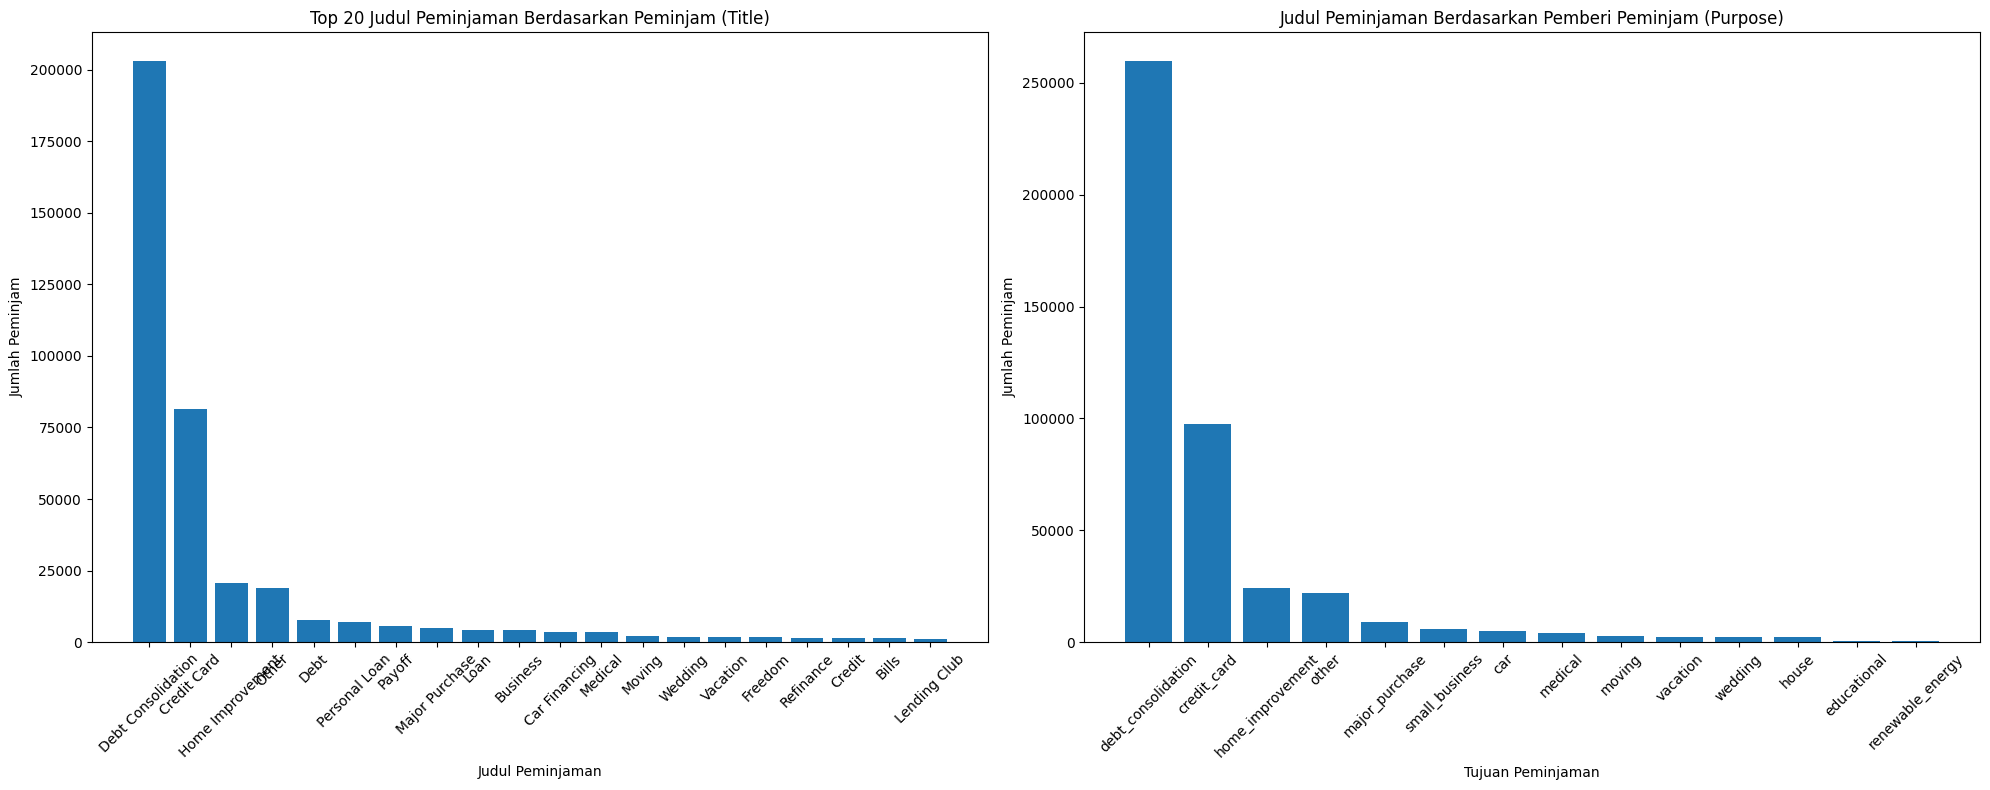

In [68]:
# Showing Distribution Title and Purpose
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
title_counts = df['title'].value_counts().head(20)
axes[0].bar(title_counts.index, title_counts.values)
axes[0].set_xlabel('Judul Peminjaman')
axes[0].set_ylabel('Jumlah Peminjam')
axes[0].set_title('Top 20 Judul Peminjaman Berdasarkan Peminjam (Title)')
axes[0].tick_params(axis='x', rotation=45)


purpose_counts = df['purpose'].value_counts()
axes[1].bar(purpose_counts.index, purpose_counts.values)
axes[1].set_xlabel('Tujuan Peminjaman')
axes[1].set_ylabel('Jumlah Peminjam')
axes[1].set_title('Judul Peminjaman Berdasarkan Pemberi Peminjam (Purpose)')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()



In [69]:
# check status
df['initial_list_status'].value_counts()

f    283356
w    154281
Name: initial_list_status, dtype: int64

| initial_list_status | keterangan |
| ---------| --------|
|f | menunjukkan bahwa pinjaman pertama kali di-listing oleh pemberi pinjaman dalam bentuk yang sepenuhnya diisi dan verifikasi (fully funded).
|w | menunjukkan bahwa pinjaman pertama kali di-listing dalam bentuk yang masih dalam proses pendanaan (belum sepenuhnya diisi dan verifikasi).

In [70]:
pip install plotly


In [71]:
# Showing Distribution initial_list_status
import plotly.graph_objects as go
initial_list_status_counts = df['initial_list_status'].value_counts()
labels = initial_list_status_counts.index
values = initial_list_status_counts.values
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title='Distribusi Status Pendaftaran Awal')
fig.show()

In [72]:
# check data issue_d (tanggal penerbitan peminjaman)
issue_d_counts = df['issue_d'].value_counts()
issue_d_counts.head(10)

Oct-14    36651
Jul-14    28060
Nov-14    23610
May-14    18179
Apr-14    18019
Aug-14    17856
Jun-14    16384
Mar-14    15455
Jan-14    14345
Dec-13    13906
Name: issue_d, dtype: int64

In [73]:
# check data laporan kredit pertama peminjam
df['earliest_cr_line'].value_counts().head(10)

Oct-00    3499
Aug-00    3431
Aug-01    3303
Oct-99    3266
Oct-01    3194
Nov-99    3166
Nov-00    3117
Sep-00    3114
Sep-99    2983
Aug-99    2955
Name: earliest_cr_line, dtype: int64

In [74]:
# check data tanggal terakhir pembayaran yang dilakukan oleh peminjam
df['last_pymnt_d'].value_counts().head(10)

Jan-16    168389
Dec-15     58022
Jul-15     11079
Oct-15     10581
Sep-15      9640
Mar-15      9541
Jun-15      9525
Apr-15      9480
Aug-15      9362
May-15      9057
Name: last_pymnt_d, dtype: int64

In [75]:
# check tanggal terakhir kali informasi kredit peminjam diperbarui
df['last_credit_pull_d'].value_counts().head(10)

Jan-16    308301
Dec-15     13164
Nov-15      7863
Sep-15      7590
Oct-15      7524
Jul-15      6901
Aug-15      6173
Jun-15      5860
Apr-15      5340
Mar-15      5124
Name: last_credit_pull_d, dtype: int64

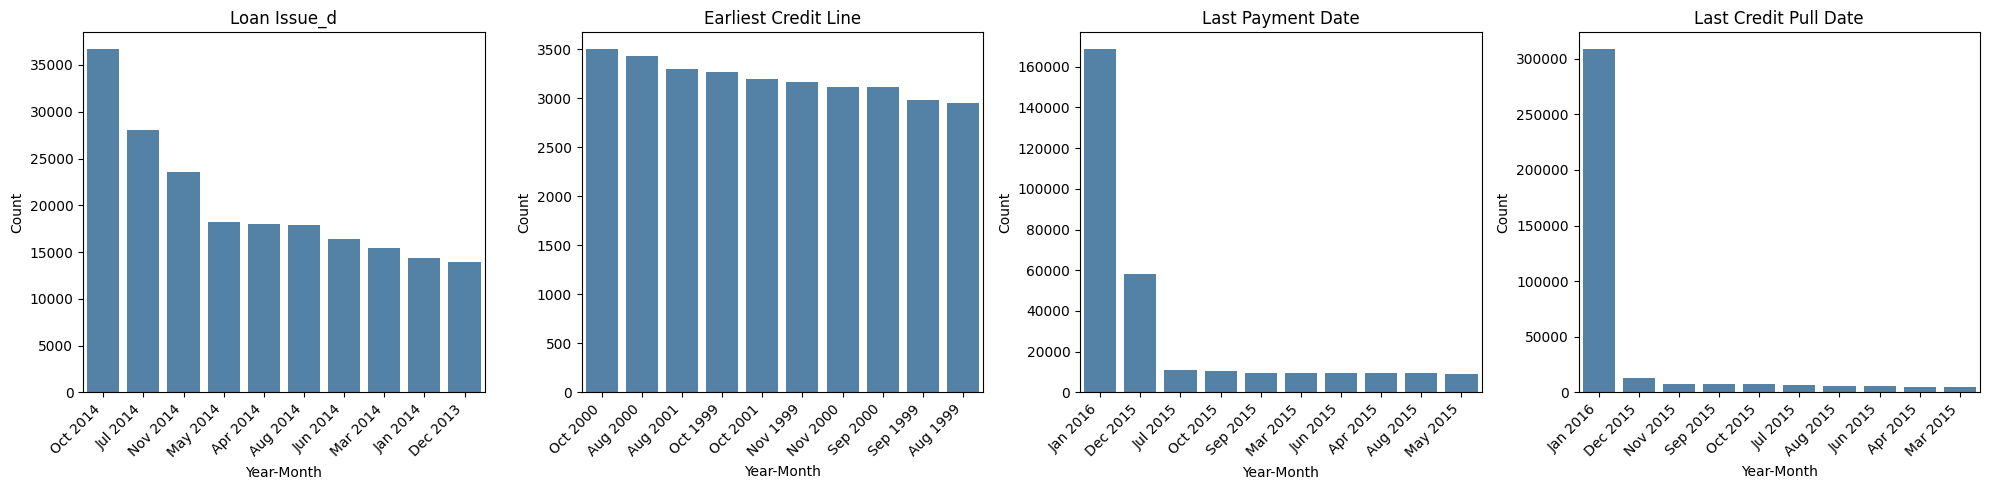

In [76]:
# Showing Visualization Categorical Feature Based Date
# Convert the 'issue_d', 'earliest_cr_line', 'last_pymnt_d', and 'last_credit_pull_d' columns to datetime format
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

# Create subplots with one row and four columns
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Group by month and year, and count occurrences for each group for 'issue_d'
issue_d_counts = df['issue_d'].dt.to_period('M').value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=issue_d_counts.index.strftime('%b %Y'), y=issue_d_counts.values, color='steelblue', ax=axes[0])
axes[0].set_title('Loan Issue_d')
axes[0].set_xlabel('Year-Month')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Group by month and year, and count occurrences for each group for 'earliest_cr_line'
earliest_cr_line_counts = df['earliest_cr_line'].dt.to_period('M').value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=earliest_cr_line_counts.index.strftime('%b %Y'), y=earliest_cr_line_counts.values, color='steelblue', ax=axes[1])
axes[1].set_title('Earliest Credit Line')
axes[1].set_xlabel('Year-Month')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Group by month and year, and count occurrences for each group for 'last_pymnt_d'
last_pymnt_d_counts = df['last_pymnt_d'].dt.to_period('M').value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=last_pymnt_d_counts.index.strftime('%b %Y'), y=last_pymnt_d_counts.values, color='steelblue', ax=axes[2])
axes[2].set_title('Last Payment Date')
axes[2].set_xlabel('Year-Month')
axes[2].set_ylabel('Count')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')

# Group by month and year, and count occurrences for each group for 'last_credit_pull_d'
last_credit_pull_d_counts = df['last_credit_pull_d'].dt.to_period('M').value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=last_credit_pull_d_counts.index.strftime('%b %Y'), y=last_credit_pull_d_counts.values, color='steelblue', ax=axes[3])
axes[3].set_title('Last Credit Pull Date')
axes[3].set_xlabel('Year-Month')
axes[3].set_ylabel('Count')
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


 <b> `ISSUE_DATE , EARLIEST_CR_LINE , LAST_PAYMENT_DATE & LAST_CREDIT_PULL_D`

In [77]:
# Showing Year Issue_d
df['issue_d'] = pd.to_datetime(df['issue_d']) # Pastikan kolom 'issue_d' berisi tipe data datetime
df['issue_year'] = df['issue_d'].dt.year # Mengekstrak tahun dari kolom 'issue_d' dan tambahkan ke kolom baru 'issue_year'
print(df['issue_year'].unique()) # Melihat tahun unik yang ada dalam dataset
num_unique_years = df['issue_year'].nunique() # Count the number of unique years in the 'issue_year' column
print("Number of unique years in the 'issue_year' column:", num_unique_years)

[2011 2010 2009 2008 2007 2013 2012 2014]
Number of unique years in the 'issue_year' column: 8


In [78]:
# Showing Year earliest_cr_line
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year
print(df['earliest_cr_line_year'].unique())
num_unique_years = df['earliest_cr_line_year'].nunique()
print("Jumlah tahun unik dalam kolom 'earliest_cr_line':", num_unique_years)

# Ternyata terdapat anomali tahun diatas 2016

[1999 1996 2004 2005 2007 1998 1989 2003 1991 1993 2001 1997 1983 1985
 2002 1984 2006 1981 2000 1994 1995 1992 1986 1990 1988 1980 2008 1973
 1979 1987 1982 1978 1971 1972 1970 1969 1975 1976 1977 2068 1974 2067
 2065 2063 2066 2062 2056 2046 2050 2064 2054 2059 2010 2009 2061 2060
 2057 2053 2055 2058 2011 2051 2049 2044 2048]
Jumlah tahun unik dalam kolom 'earliest_cr_line': 65


In [79]:
# Filter Tahun yang Relevant untuk earliest_cr_line
df = df[(df['earliest_cr_line_year'] >= 2000) & (df['earliest_cr_line_year'] <= 2016)]
print(df['earliest_cr_line_year'].unique())
num_unique_years = df['earliest_cr_line_year'].nunique()
print("Jumlah tahun unik dalam kolom 'earliest_cr_line' setelah difilter:", num_unique_years)

[2004 2005 2007 2003 2001 2002 2006 2000 2008 2010 2009 2011]
Jumlah tahun unik dalam kolom 'earliest_cr_line' setelah difilter: 12


In [80]:
# Short Value Year earliest_cr_line
tahun_unik = df['earliest_cr_line_year'].unique()
tahun_unik_sorted = sorted(tahun_unik)
print(tahun_unik_sorted)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]


In [81]:
# Showing Year last_pymnt_d
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])
df['last_pymnt_d_year'] = df['last_pymnt_d'].dt.year
print(df['last_pymnt_d_year'].unique())
num_unique_years = df['last_pymnt_d_year'].nunique()
print("Jumlah tahun unik dalam kolom 'last_pymnt_d_year':", num_unique_years)

[2015 2016 2012 2013 2014 2011 2010 2009 2008 2007]
Jumlah tahun unik dalam kolom 'last_pymnt_d_year': 10


In [82]:
# Showing Year last_credit_pull_d
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'])
df['last_credit_pull_d_year'] = df['last_pymnt_d'].dt.year
print(df['last_credit_pull_d_year'].unique())
num_unique_years = df['last_credit_pull_d_year'].nunique()
print("Jumlah tahun unik dalam kolom ''last_credit_pull_d_year'':", num_unique_years)

[2015 2016 2012 2013 2014 2011 2010 2009 2008 2007]
Jumlah tahun unik dalam kolom ''last_credit_pull_d_year'': 10


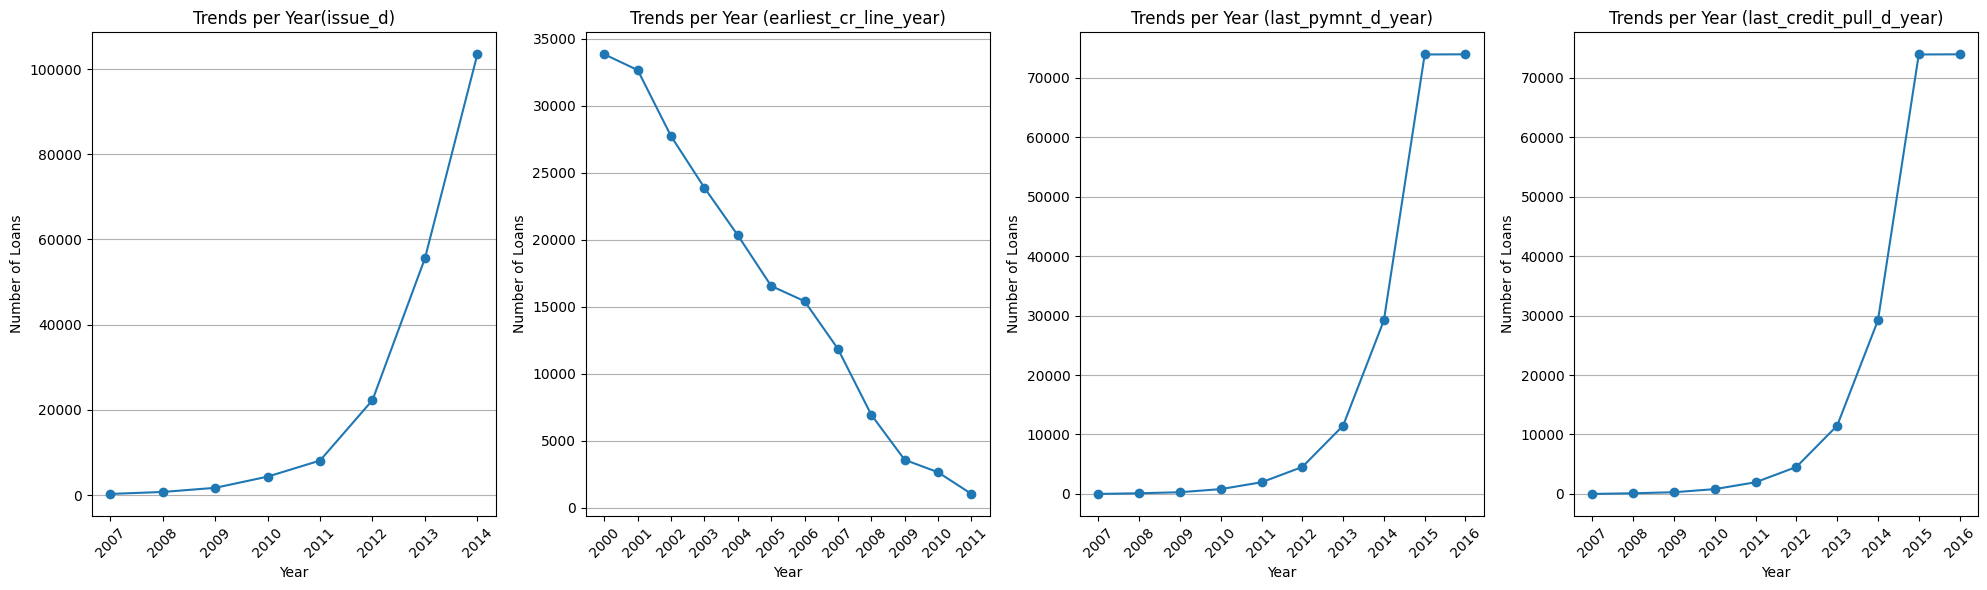

In [83]:
# Showing Trend issue_d , earliest_cr_line , last_pymnt_d, last_credit_pull_d per Year

# Menghitung jumlah pinjaman per tahun
loan_counts_per_year = df['issue_year'].value_counts().sort_index()
loan_counts_per_year_filtered = df['earliest_cr_line_year'].value_counts().sort_index()
loan_counts_per_year_last_pymnt_d = df['last_pymnt_d_year'].value_counts().sort_index()
loan_counts_per_year_last_credit_pull_d = df['last_credit_pull_d_year'].value_counts().sort_index()

# Membuat subplots dengan 1 baris dan 4 kolom
plt.figure(figsize=(20, 6))

# Plot pertama: Number of Loans per Year
plt.subplot(1, 4, 1)
plt.plot(loan_counts_per_year.index, loan_counts_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Loans')
plt.title('Trends per Year(issue_d)')
plt.xticks(loan_counts_per_year.index, rotation=45)
plt.grid(axis='y')

# Plot kedua: Number of Loans per Year (earliest_cr_line_year)
plt.subplot(1, 4, 2)
plt.plot(loan_counts_per_year_filtered.index, loan_counts_per_year_filtered.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Loans')
plt.title('Trends per Year (earliest_cr_line_year)')
plt.xticks(loan_counts_per_year_filtered.index, rotation=45)
plt.grid(axis='y')

# Plot ketiga: Number of Loans per Year (last_pymnt_d_year)
plt.subplot(1, 4, 3)
plt.plot(loan_counts_per_year_last_pymnt_d.index, loan_counts_per_year_last_pymnt_d.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Loans')
plt.title('Trends per Year (last_pymnt_d_year)')
plt.xticks(loan_counts_per_year_last_pymnt_d.index, rotation=45)
plt.grid(axis='y')

# Plot keempat: Number of Loans per Year (last_credit_pull_d_year)
plt.subplot(1, 4, 4)
plt.plot(loan_counts_per_year_last_credit_pull_d.index, loan_counts_per_year_last_credit_pull_d.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Loans')
plt.title('Trends per Year (last_credit_pull_d_year)')
plt.xticks(loan_counts_per_year_last_credit_pull_d.index, rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Drop kolom-kolom yang tidak diperlukan
# df = df.drop(['issue_year', 'earliest_cr_line_year', 'last_pymnt_d_year', 'last_credit_pull_d_year'], axis=1)

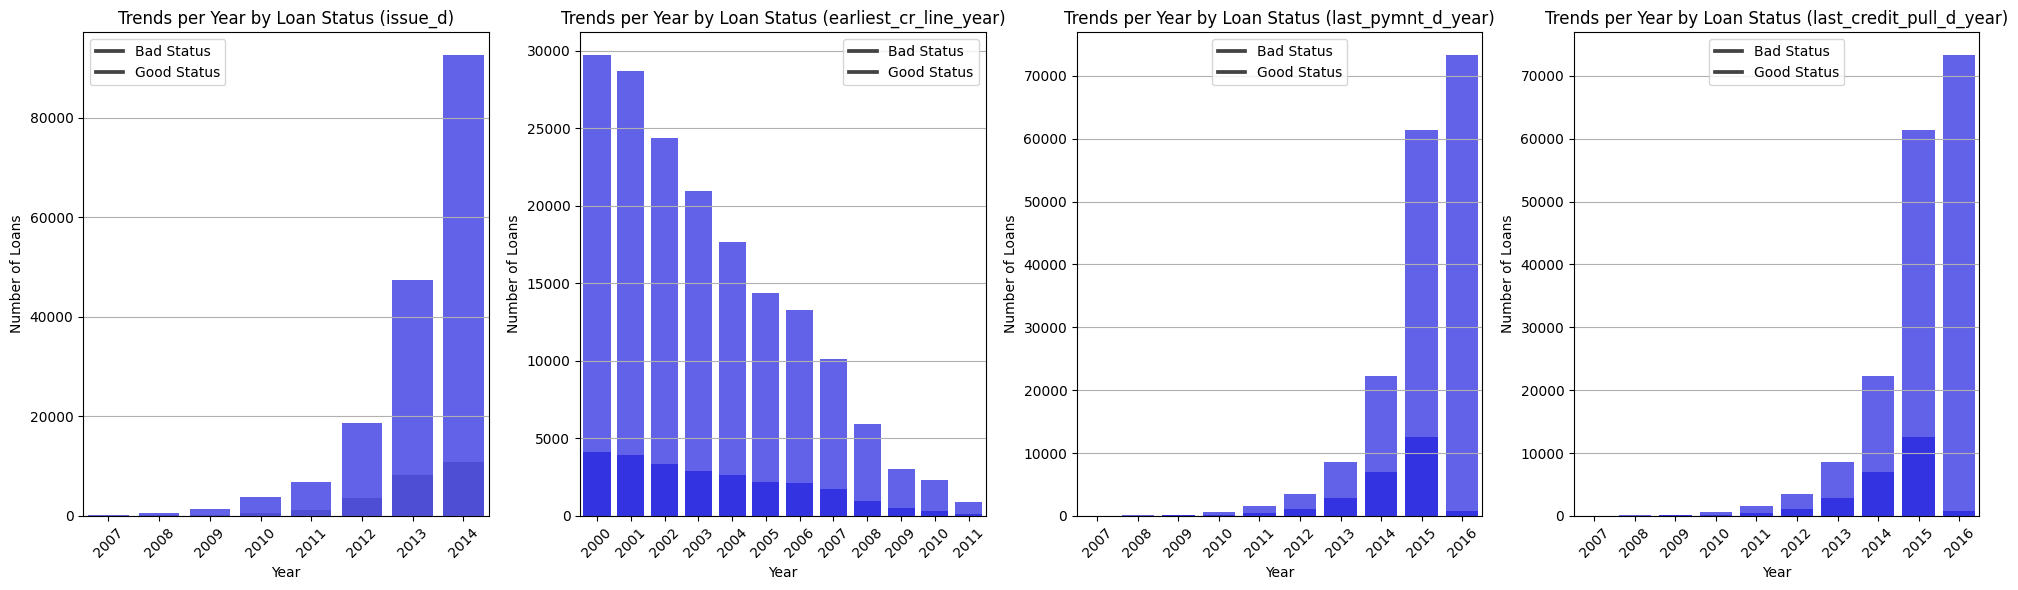

In [84]:
# Showing Bar Plot of Trends per Year by Loan Status

# Menghitung jumlah pinjaman per tahun berdasarkan 'loan_status' dan 'issue_year'
loan_counts_issue_year = df.groupby(['issue_year', 'loan_status']).size().unstack()

# Menghitung jumlah pinjaman per tahun berdasarkan 'loan_status' dan 'earliest_cr_line_year'
loan_counts_earliest_cr_line_year = df.groupby(['earliest_cr_line_year', 'loan_status']).size().unstack()

# Menghitung jumlah pinjaman per tahun berdasarkan 'loan_status' dan 'last_pymnt_d_year'
loan_counts_last_pymnt_d_year = df.groupby(['last_pymnt_d_year', 'loan_status']).size().unstack()

# Menghitung jumlah pinjaman per tahun berdasarkan 'loan_status' dan 'last_credit_pull_d_year'
loan_counts_last_credit_pull_d_year = df.groupby(['last_credit_pull_d_year', 'loan_status']).size().unstack()

# Membuat subplots dengan 1 baris dan 4 kolom
plt.figure(figsize=(20, 6))

# Plot pertama: Number of Loans per Year by Loan Status (issue_d)
plt.subplot(1, 4, 1)
sns.barplot(data=loan_counts_issue_year, x=loan_counts_issue_year.index, y='bad status', palette=['#9e9e9e'], alpha=0.7)
sns.barplot(data=loan_counts_issue_year, x=loan_counts_issue_year.index, y='good status', palette=['#0000FF'], alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Number of Loans')
plt.title('Trends per Year by Loan Status (issue_d)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(['Bad Status', 'Good Status'])

# Plot kedua: Number of Loans per Year by Loan Status (earliest_cr_line_year)
plt.subplot(1, 4, 2)
sns.barplot(data=loan_counts_earliest_cr_line_year, x=loan_counts_earliest_cr_line_year.index, y='bad status', palette=['#0000FF'], alpha=0.7)
sns.barplot(data=loan_counts_earliest_cr_line_year, x=loan_counts_earliest_cr_line_year.index, y='good status', palette=['#0000FF'], alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Number of Loans')
plt.title('Trends per Year by Loan Status (earliest_cr_line_year)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(['Bad Status', 'Good Status'])

# Plot ketiga: Number of Loans per Year by Loan Status (last_pymnt_d_year)
plt.subplot(1, 4, 3)
sns.barplot(data=loan_counts_last_pymnt_d_year, x=loan_counts_last_pymnt_d_year.index, y='bad status', palette=['#0000FF'], alpha=0.7)
sns.barplot(data=loan_counts_last_pymnt_d_year, x=loan_counts_last_pymnt_d_year.index, y='good status', palette=['#0000FF'], alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Number of Loans')
plt.title('Trends per Year by Loan Status (last_pymnt_d_year)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(['Bad Status', 'Good Status'])

# Plot keempat: Number of Loans per Year by Loan Status (last_credit_pull_d_year)
plt.subplot(1, 4, 4)
sns.barplot(data=loan_counts_last_credit_pull_d_year, x=loan_counts_last_credit_pull_d_year.index, y='bad status', palette=['#0000FF'], alpha=0.7)
sns.barplot(data=loan_counts_last_credit_pull_d_year, x=loan_counts_last_credit_pull_d_year.index, y='good status', palette=['#0000FF'], alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Number of Loans')
plt.title('Trends per Year by Loan Status (last_credit_pull_d_year)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(['Bad Status', 'Good Status'])

plt.tight_layout()
plt.show()

In [85]:
# Drop the columns from the DataFrame after analysis
df.drop(['issue_year', 'earliest_cr_line_year', 'last_pymnt_d_year', 'last_credit_pull_d_year'], axis=1, inplace=True)

## EDA on the Numerical Features

In [86]:
#Statistic Summary Numerical
display(df.describe())

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq
count,196323.000000,196323.000000,196323.000000,196323.000000,196323.000000,1.963230e+05,196323.000000,196323.000000,196323.000000,196323.000000,196323.000000,196323.000000,196323.000000,196323.000000,196323.000000,196323.000000,196323.000000,196323.000000,196323.000000,196323.000000,196323.000000,196323.000000,196323.000000,196323.000000,196323.000000
mean,12816.007167,12804.443570,12758.532019,14.147865,392.806993,6.375658e+04,17.052045,0.215176,0.790473,10.642176,0.127163,12038.625296,55.995768,21.601183,3890.999278,3889.747863,10271.908201,10224.474645,7915.969936,2274.731459,0.651158,80.555654,8.108425,2906.156752,0.002481
std,7445.048844,7438.537881,7455.163134,4.314425,219.576779,4.568531e+04,7.893306,0.689968,1.073349,4.826567,0.427722,11301.967594,23.450418,10.670329,5717.899266,5716.286831,7352.263247,7346.363971,6323.617972,2162.794687,5.019430,492.560423,75.120212,5125.507025,0.053873
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,33.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7200.000000,7200.000000,7198.291478,11.140000,238.160000,4.000000e+04,11.160000,0.000000,0.000000,7.000000,0.000000,5447.000000,39.300000,14.000000,0.000000,0.000000,5060.910000,5025.130000,3352.585000,880.935000,0.000000,0.000000,0.000000,291.040000,0.000000
50%,11200.000000,11200.000000,11200.000000,13.980000,346.690000,5.500000e+04,16.700000,0.000000,0.000000,10.000000,0.000000,9566.000000,57.200000,20.000000,0.000000,0.000000,8368.920000,8321.380000,6000.000000,1630.030000,0.000000,0.000000,0.000000,498.150000,0.000000
75%,17000.000000,17000.000000,16950.000000,16.990000,505.340000,7.670000e+04,22.640000,0.000000,1.000000,13.000000,0.000000,15570.000000,74.200000,27.000000,6308.310000,6304.290000,13393.707625,13348.020000,10375.000000,2869.540000,0.000000,0.000000,0.000000,3189.330000,0.000000
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,6.100000e+06,39.990000,24.000000,32.000000,76.000000,17.000000,661711.000000,153.000000,156.000000,32160.380000,32160.380000,55982.649900,55982.650000,35000.010000,22709.980000,358.680000,29282.070000,7002.190000,36234.440000,5.000000


In [87]:
# Menggunakan metode select_dtypes() untuk memilih kolom numerikal
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Menghitung jumlah kolom numerikal
total_numerikal = numerical_columns.shape[1]

# Menampilkan hasil
print("Total kolom numerikal:", total_numerikal)

Total kolom numerikal: 25


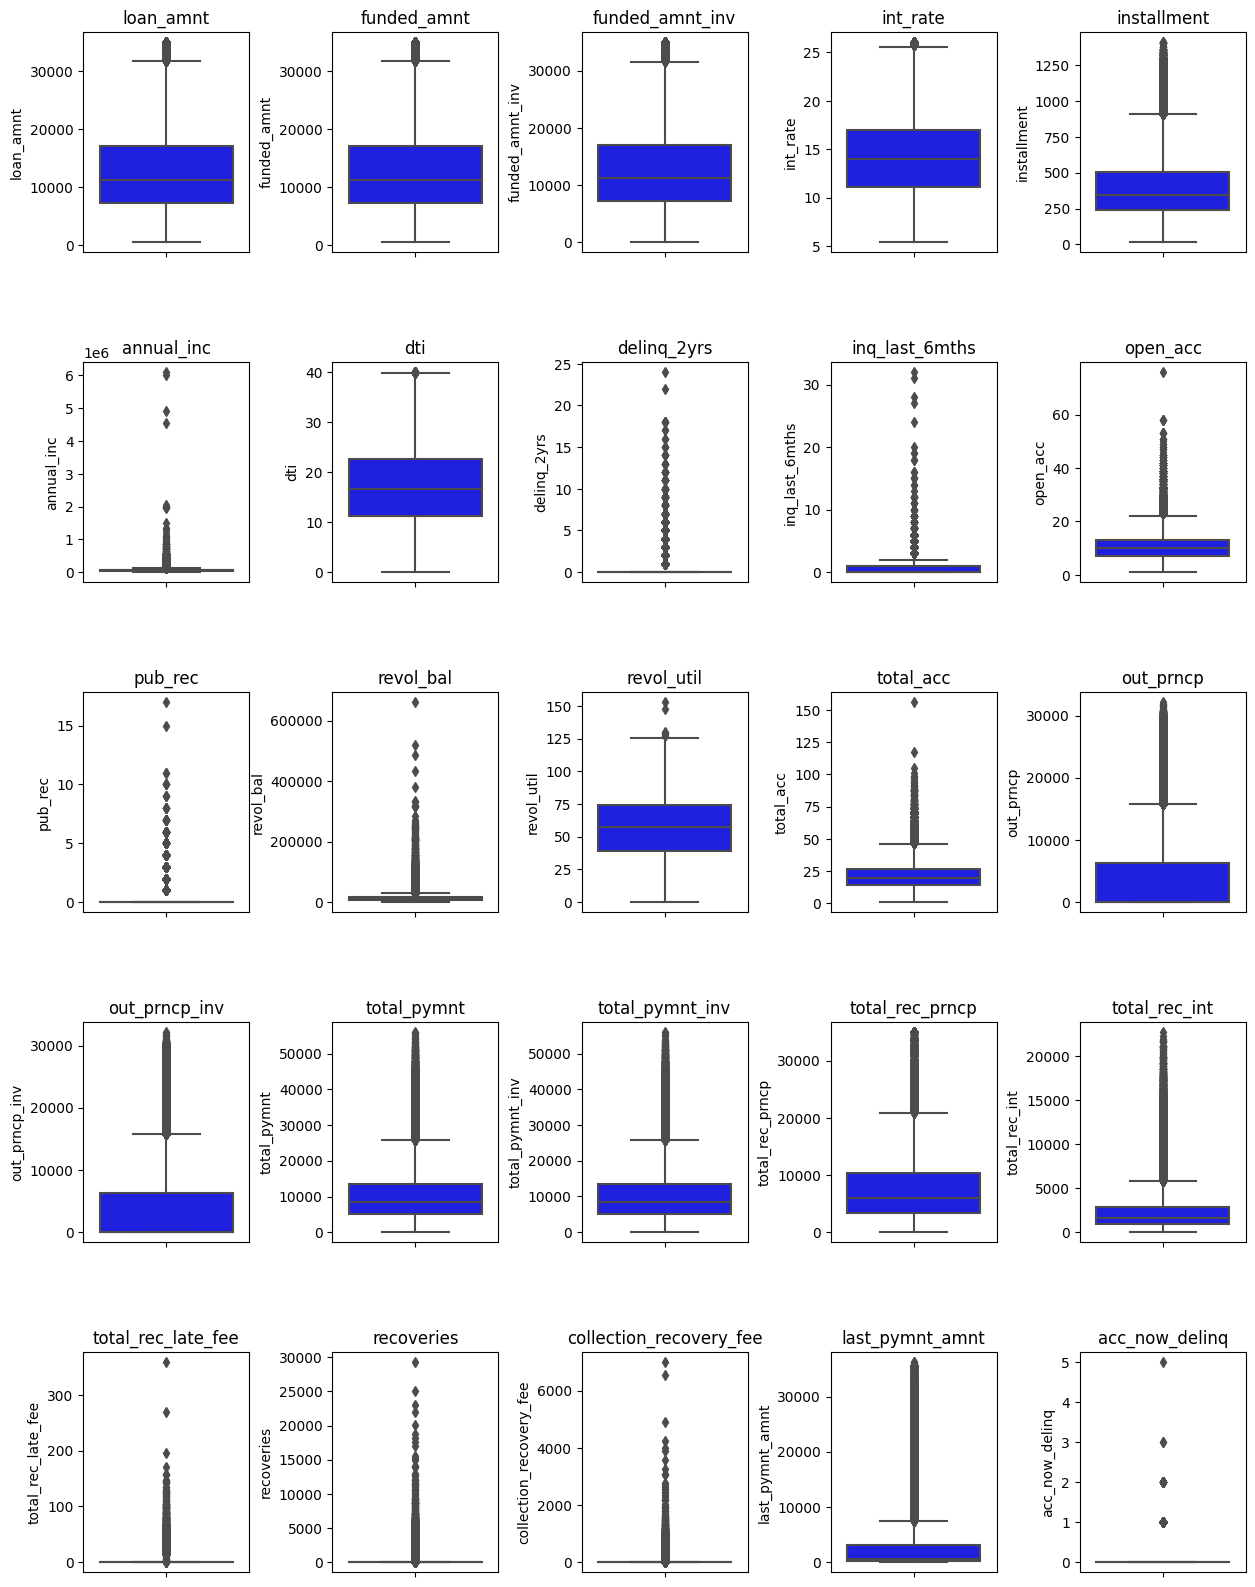

In [88]:
# Create Boxplot for Each Numerical Feature
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math  # Importing the 'math' module

# Assuming your DataFrame 'df' contains the data

# Selecting only the numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the number of columns needed for subplots
num_rows = 5
num_cols = 5

# Creating subplots to display all the box plots
plt.figure(figsize=(15, 20))
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjusting the space between subplots

# Loop through each numerical column and create the box plot
for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=df, y=column, color='blue')  # Using 'skyblue' color for box plot
    plt.title(column)
    plt.ylabel(column)

plt.show()


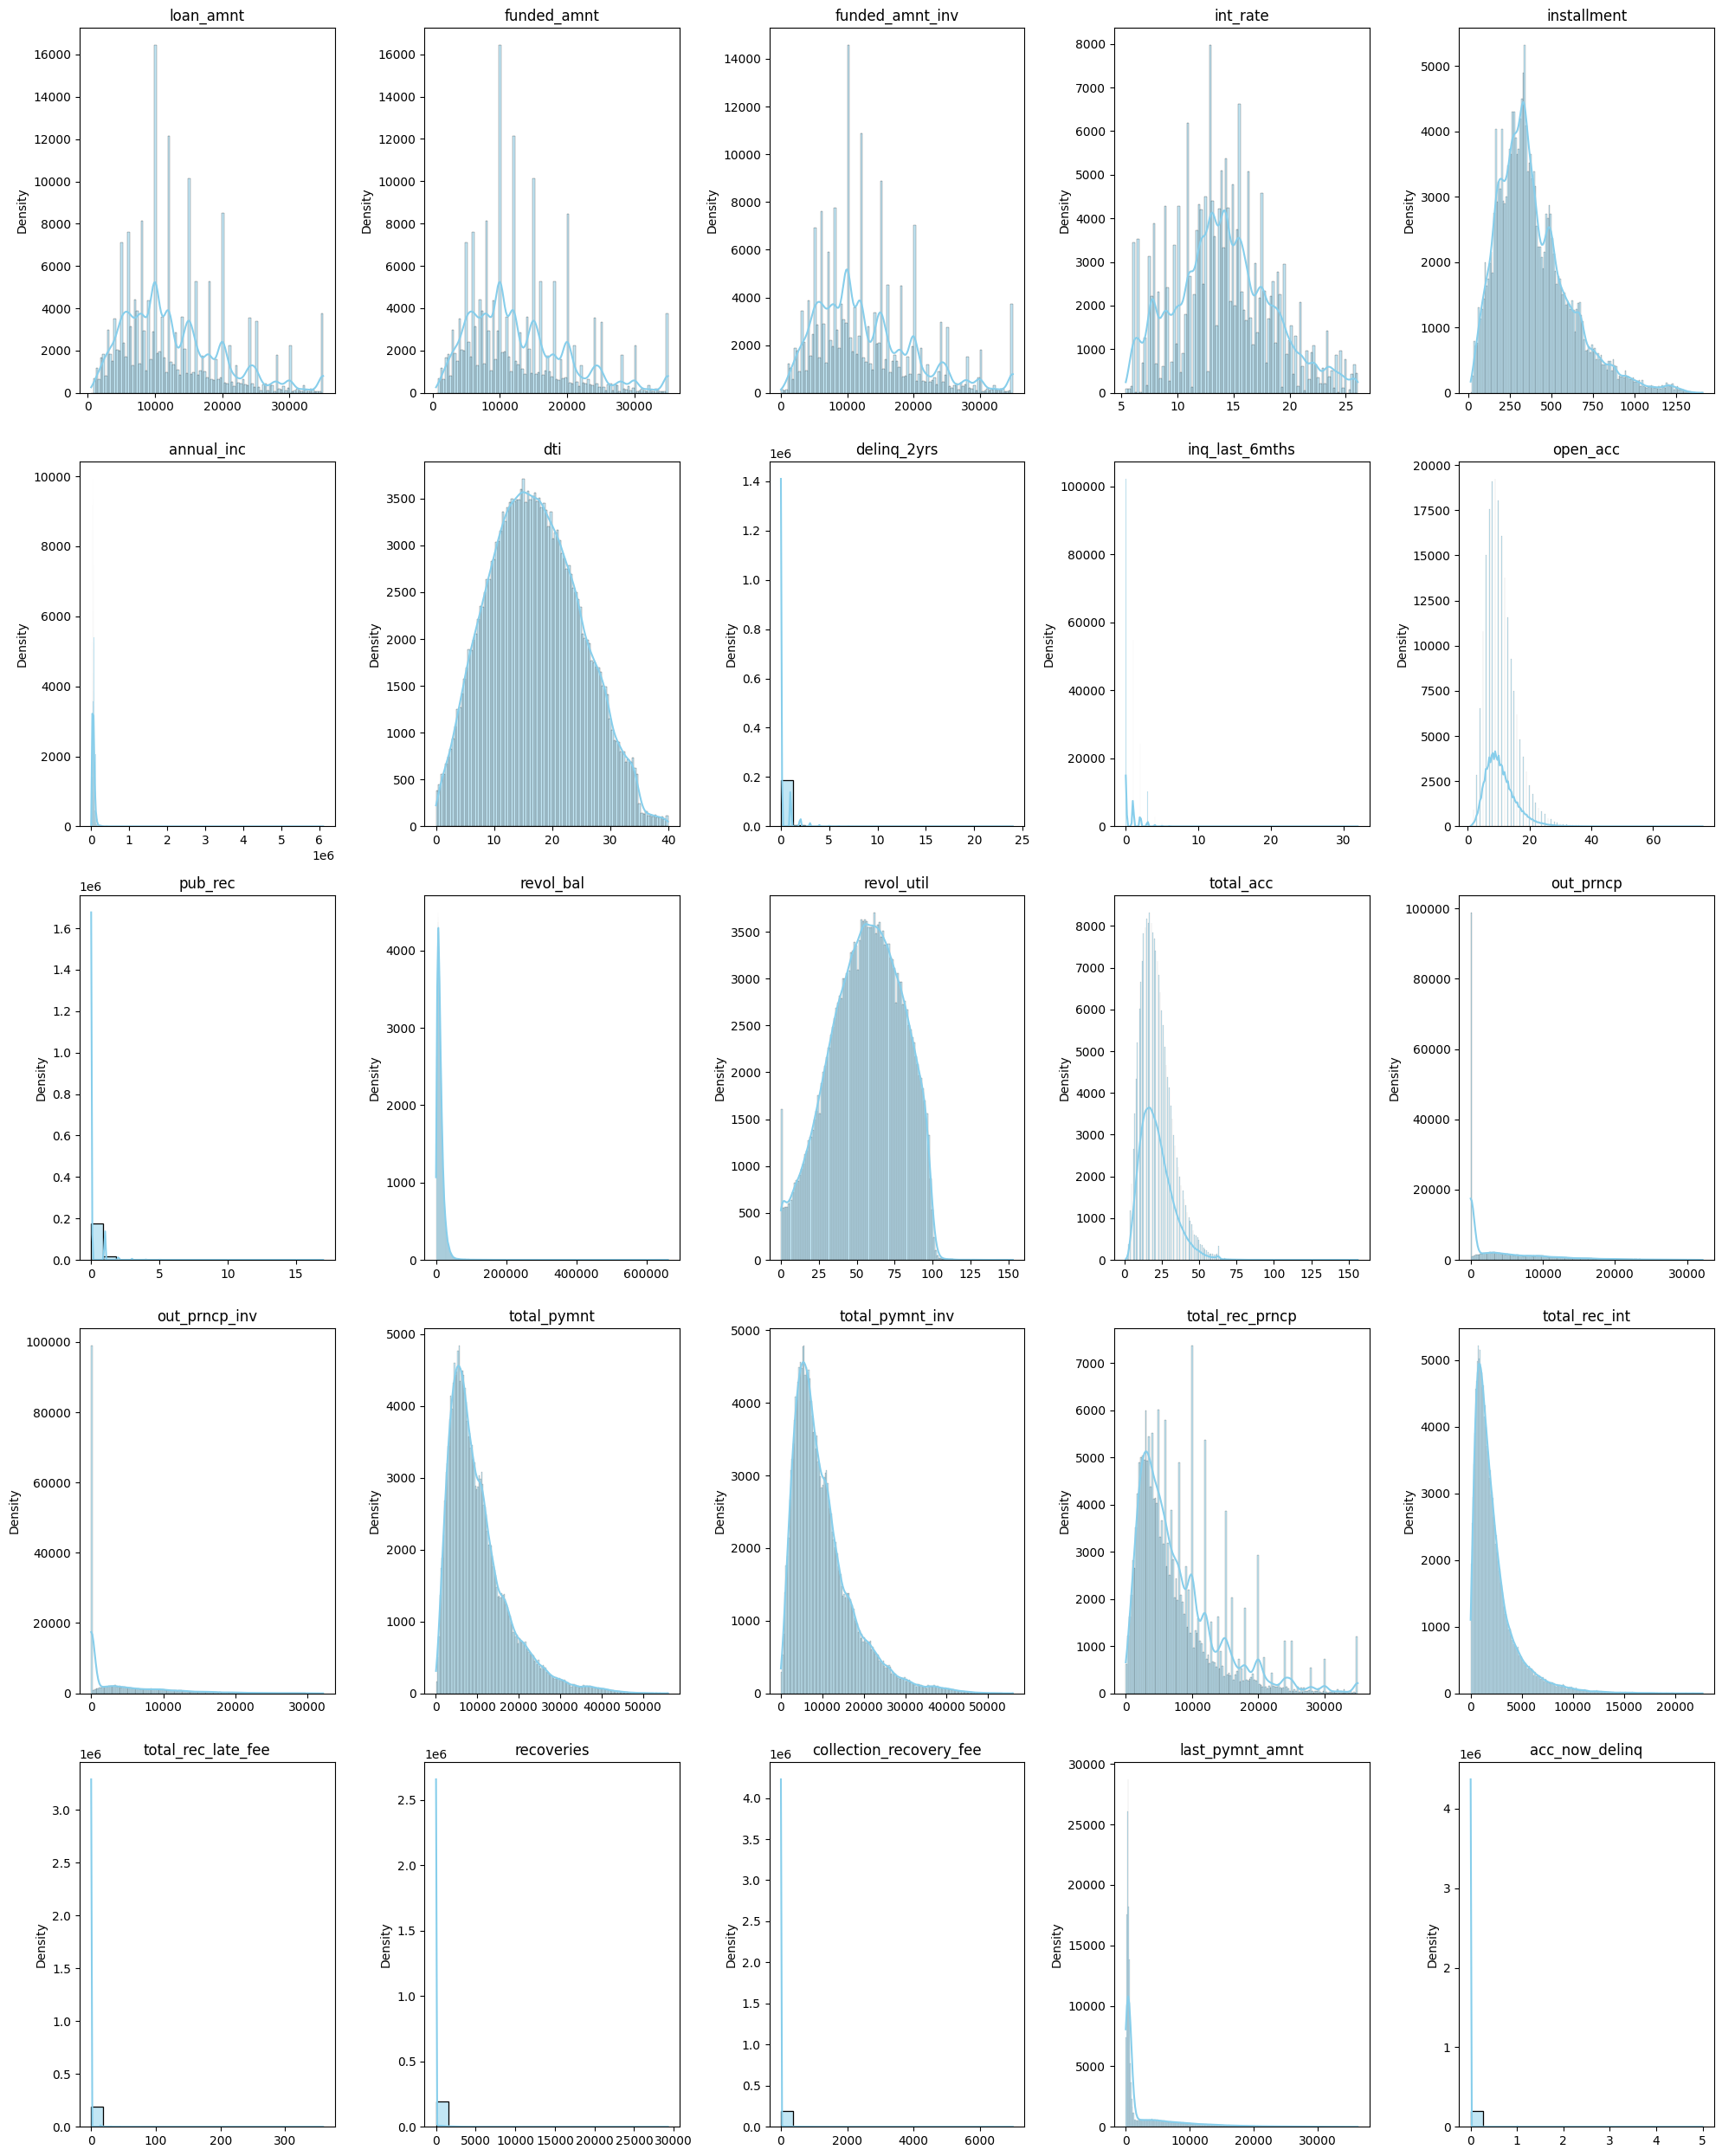

In [89]:
# Create Distplot for Each Numerical Feature
import seaborn as sns
import matplotlib.pyplot as plt

# List of all numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns for subplots
num_plots = len(numerical_features)
num_rows = 5  # Set the number of rows for subplots (change it as needed)
num_cols = math.ceil(num_plots / num_rows)

# Create subplots to display all the distributions
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))
axes = axes.flatten()

for i, column in enumerate(numerical_features):
    # Distplot
    sns.histplot(df[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

# If the number of plots is less than the number of subplots, hide the empty subplots
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


 <b> `LOAN AMOUNT , FUNDED AMOUNT & FUNDED AMOUNT INV`

> Kita memiliki 3 bidang berbeda yang menunjukkan jumlah pinjaman yang diajukan / didanai. <br>


| kolom | jenis pinjaman |
| ----- | ---------- |
| loan_amnt |  jumlah pinjaman yang diminta peminjam.
| funded_amnt | Jumlah sebenarnya yang diberikan kepada peminjam berdasarkan persetujuan dari platform pinjaman.
| funded_amnt_inv| jumlah aktual yg berhasil dipinjamkan investor

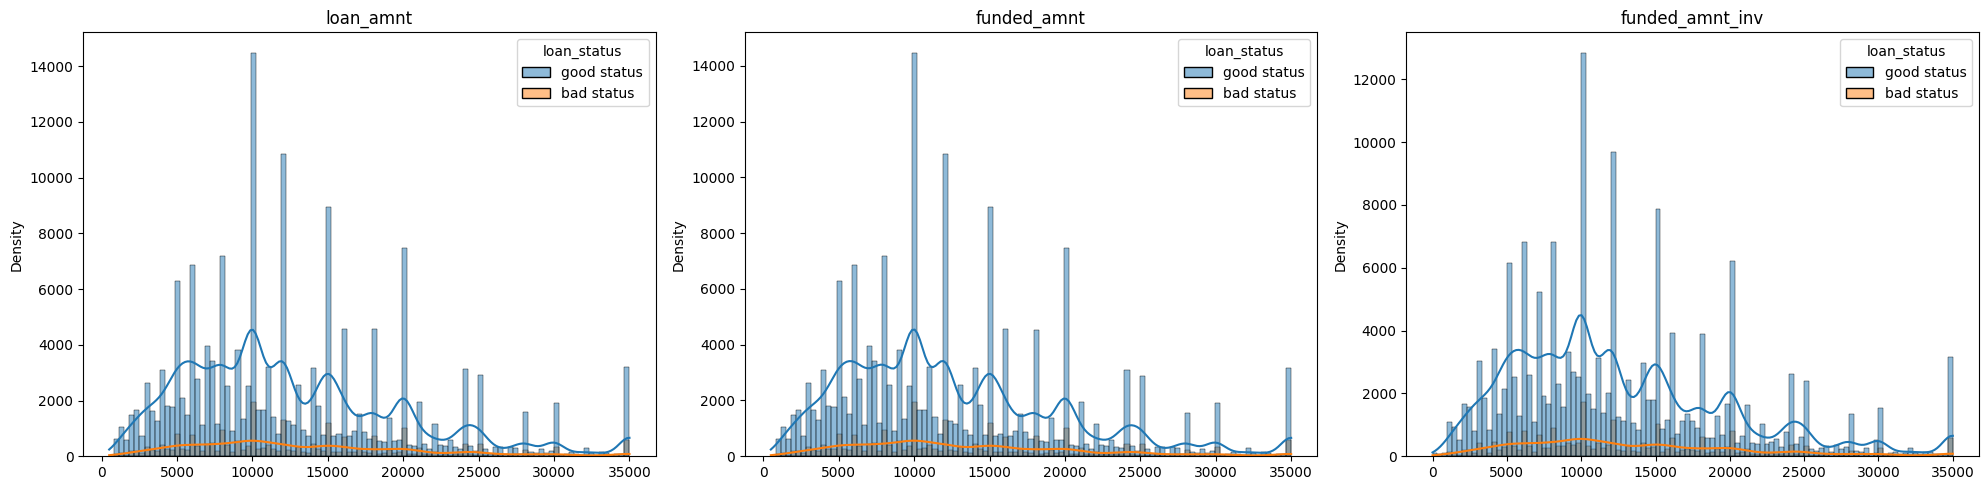

In [90]:
# Showing Distribution jenis pinjaman
numerical_features = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
num_plots = len(numerical_features)
num_rows = 1
num_cols = num_plots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))
axes = axes.flatten()

for i in range(num_plots):
    # Distplot with hue
    sns.histplot(data=df, x=numerical_features[i], hue='loan_status', kde=True, ax=axes[i])
    axes[i].set_title(numerical_features[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [91]:
# Check 3 data pinjaman
df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].head(5)
# ternyata banyak data sama antara ketiga kolom

,loan_amnt,funded_amnt,funded_amnt_inv
5,5000,5000,5000.0
6,7000,7000,7000.0
7,3000,3000,3000.0
9,5375,5375,5350.0
12,9000,9000,9000.0


In [92]:
# Checking data yang sama
are_all_columns_equal = (df['loan_amnt'] == df['funded_amnt']) & (df['loan_amnt'] == df['funded_amnt_inv'])
rows_with_true = df[are_all_columns_equal]

# Showing Persentase
num_rows_with_true = rows_with_true.shape[0]
total_rows = df.shape[0]
percentage_same = (num_rows_with_true / total_rows) * 100
print(f"Persentase data yang sama: {percentage_same:.2f}%")

# Artinya, dalam kasus ini, 85.20% pinjaman telah disetujui dengan nilai yang sama dengan jumlah yang ingin dipinjamkan oleh peminjam,
# dan jumlah yang berhasil didanai oleh investor sesuai dengan jumlah yang disetujui.
# Ketika nilai pada ketiga kolom tersebut sama, ini menunjukkan bahwa peminjam menerima pinjaman sesuai dengan jumlah yang diminta
# dan tidak ada perbedaan antara nilai yang disetujui oleh platform dan yang didanai oleh investor

Persentase data yang sama: 87.84%


In [93]:
# Check perbedaan data dr 3 kolom
rows_with_false = df[~are_all_columns_equal]
rows_with_false[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].head(5)

# Perbedaan ini menunjukkan bahwa dalam kasus ini, pinjaman ('loan_amnt') telah disetujui oleh platform pinjaman
# dan diberikan kepada peminjam sebesar 5375 (sesuai dengan 'funded_amnt').
# Namun, dalam proses pendanaan oleh investor, hanya 5350 yang berhasil didanai (sesuai dengan 'funded_amnt_inv').

,loan_amnt,funded_amnt,funded_amnt_inv
9,5375,5375,5350.0
39,12500,12500,12475.0
70,20975,13575,13550.0
77,7250,7200,7175.0
80,35000,22075,22050.0


In [94]:
# Showing Persentase
num_rows_with_false = rows_with_false.shape[0]
total_rows = df.shape[0]
percentage_different = (num_rows_with_false / total_rows) * 100
print(f"Persentase data yang berbeda: {percentage_different:.2f}%")

# beberapa alasan mengapa perbedaan nilai ini bisa terjadi (14.80%)
# Pendanaan Tidak Penuh: Kemungkinan ada beberapa investor yang hanya bersedia membiayai sebagian dari jumlah pinjaman yang diminta oleh peminjam.
# Jadi, meskipun pinjaman disetujui dengan jumlah tertentu, tidak semua investor berpartisipasi dalam mendanai seluruh jumlah tersebut.
# Perbedaan ini adalah hal yang wajar dalam proses pemberian pinjaman melalui platform pinjaman,
# dan ini menunjukkan bagaimana platform tersebut mengatur pendanaan dari berbagai investor untuk memenuhi kebutuhan peminjam.

Persentase data yang berbeda: 12.16%


<b> `INT RATE , TOTAL RECEIVED INTEREST & INSTALLMENT`

| fitur | keterangan |
| ---------| ------|
| int_rate | tingkat bunga yg dibayar oleh peminjam
| total_rec_int |  jumlah bunga (interest) yang telah berhasil dikumpulkan dari peminjam selama masa pengembalian pinjaman.
| installment | pembayaran tetap yg harus dibayar peminjam

In [95]:
# Jika 'status' memiliki nilai 'bad status', akan diubah menjadi 0
# Jika 'status' memiliki nilai 'good status', akan diubah menjadi 1
df['loan_status'] = df['loan_status'].map({'bad status': 0, 'good status': 1})

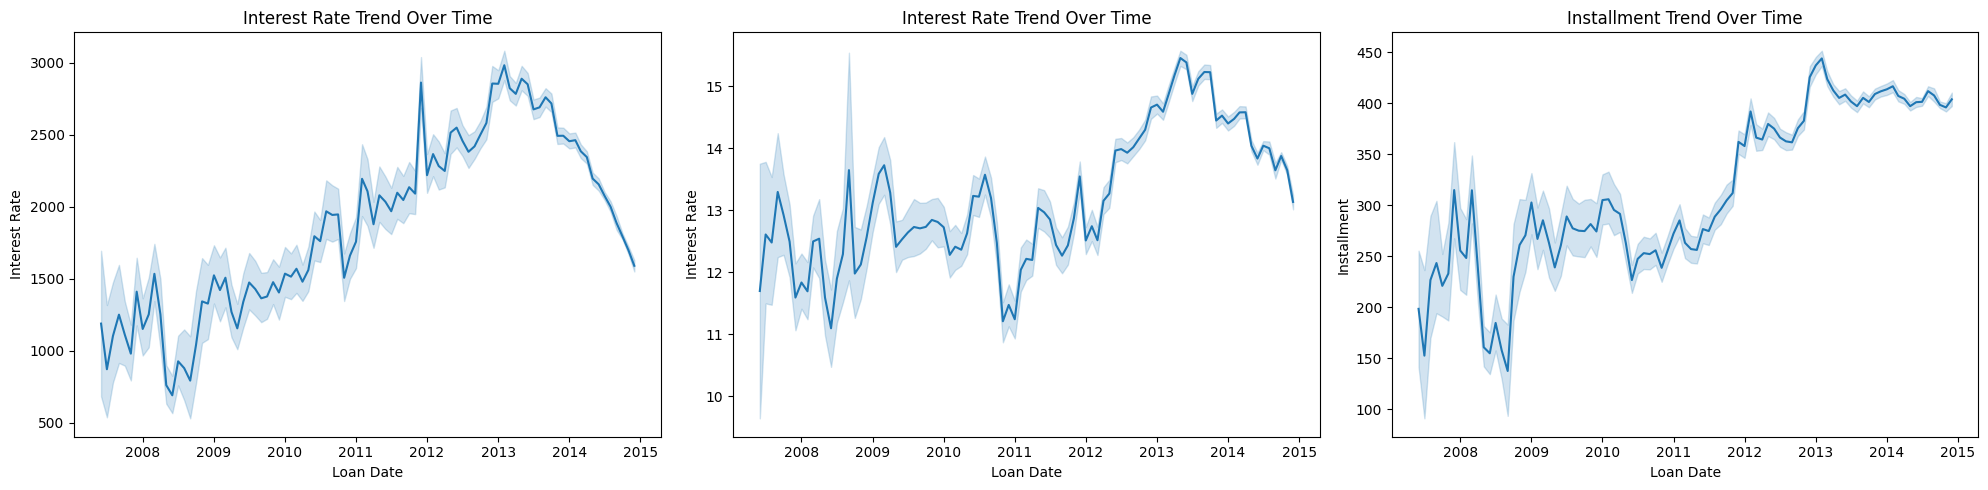

In [96]:
# Showing Tren Bunga dan Installment Peminjam
plt.figure(figsize=(20, 5))
# Plot pertama: Interest Rate Trend Over Time
plt.subplot(1, 3, 1)
sns.lineplot(data=df, x='issue_d', y='total_rec_int')
plt.title('Interest Rate Trend Over Time')
plt.xlabel('Loan Date')
plt.ylabel('Interest Rate')

# Plot kedua: Interest Rate Trend Over Time
plt.subplot(1, 3, 2)
sns.lineplot(data=df, x='issue_d', y='int_rate')
plt.title('Interest Rate Trend Over Time')
plt.xlabel('Loan Date')
plt.ylabel('Interest Rate')

# Plot ketiga: Installment Trend Over Time
plt.subplot(1, 3, 3)
sns.lineplot(data=df, x='issue_d', y='installment')
plt.title('Installment Trend Over Time')
plt.xlabel('Loan Date')
plt.ylabel('Installment')

plt.tight_layout()
plt.show()


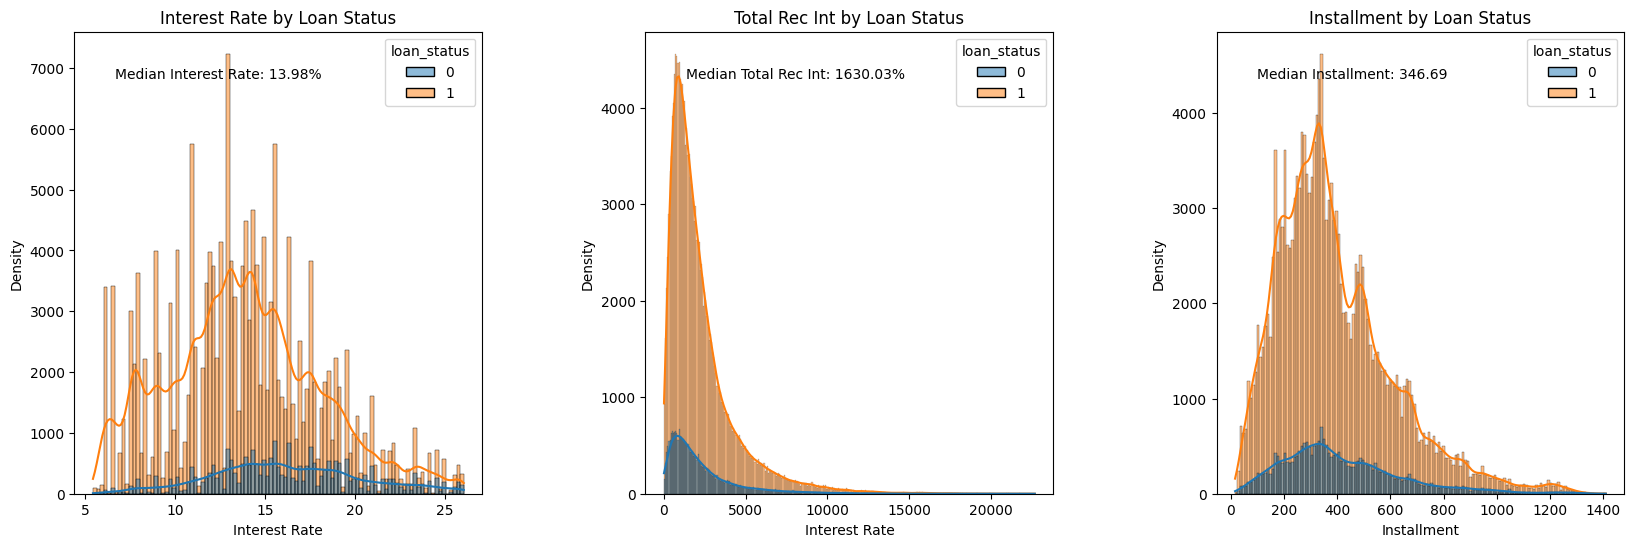

In [97]:
# Comparing Distributions of Rate and Installment by Loan Status

# Create a figure and define the size
plt.figure(figsize=(20, 6))

# First set of plots
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='int_rate', kde=True, hue='loan_status')
plt.title('Interest Rate by Loan Status')
plt.xlabel('Interest Rate')
plt.ylabel('Density')
# Median Interest Rate
median_rate = df['int_rate'].median()
plt.text(0.1, 0.9, f"Median Interest Rate: {median_rate:.2f}%", transform=plt.gca().transAxes)

plt.subplot(1, 3, 2)
# Second set of plots
sns.histplot(data=df, x='total_rec_int', kde=True, hue='loan_status')
plt.title('Total Rec Int by Loan Status')
plt.xlabel('Interest Rate')
plt.ylabel('Density')
# Median Total Rec Int
median_total_rec_int = df['total_rec_int'].median()
plt.text(0.1, 0.9, f"Median Total Rec Int: {median_total_rec_int:.2f}%", transform=plt.gca().transAxes)

plt.subplot(1, 3, 3)
# Third set of plots
sns.histplot(data=df, x='installment', kde=True, hue='loan_status')
plt.title('Installment by Loan Status')
plt.xlabel('Installment')
plt.ylabel('Density')
# Median Installment
median_installment = df['installment'].median()
plt.text(0.1, 0.9, f"Median Installment: {median_installment:.2f}", transform=plt.gca().transAxes)

# Adjust the layout to leave some space for the text
plt.subplots_adjust(wspace=0.4)

# Display the plots
plt.show()


<b> `TOTAL_REC_LATE_FEE ,COLLECTION_RECOVERY_FEE & TOTAL_REC_LATE_FEE`

| fitur numerikal | keterangan |
| ---------| ------|
| total_rec_late_fee | jumlah biaya keterlambatan (late fee) yang telah berhasil dikumpulkan dari peminjam
| collection_recovery_fee | biaya yang dibebankan kepada peminjam oleh pemberi pinjaman/  agen penagihan dalam proses pemulihan dana yang gagal dibayarkan oleh peminjam.
| total_rec_late_fee | jumlah biaya keterlambatan (late fee) yang telah berhasil dikumpulkan dari peminjam

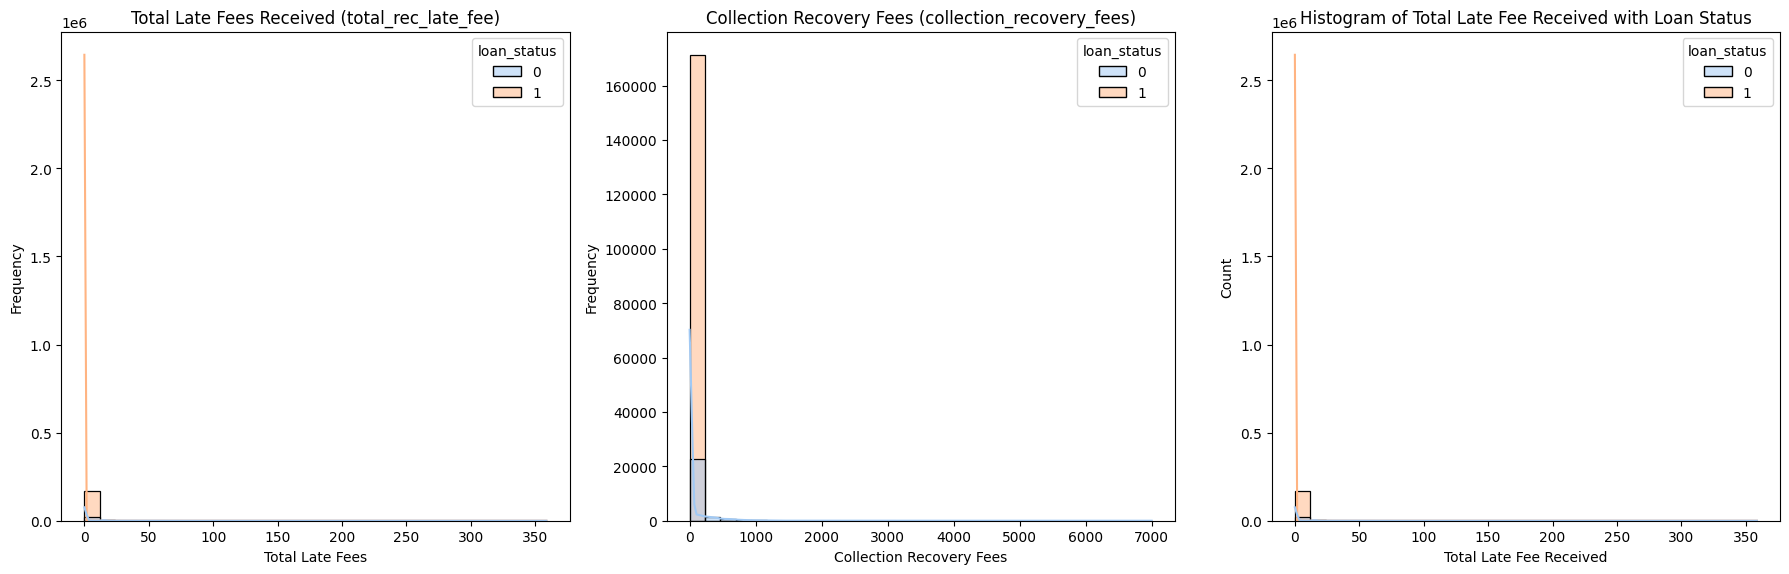

In [98]:
# Create a figure with three subplots (one row and three columns)
plt.figure(figsize=(18, 6))

# First subplot for 'total_rec_late_fee' with hue 'loan_status'
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='total_rec_late_fee', bins=30, kde=True, hue='loan_status', palette='pastel')
plt.title('Total Late Fees Received (total_rec_late_fee)')
plt.xlabel('Total Late Fees')
plt.ylabel('Frequency')

# Second subplot for 'collection_recovery_fees' with hue 'loan_status'
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='collection_recovery_fee', bins=30, kde=True, hue='loan_status', palette='pastel')
plt.title('Collection Recovery Fees (collection_recovery_fees)')
plt.xlabel('Collection Recovery Fees')
plt.ylabel('Frequency')

# Third subplot for 'total_rec_late_fee' with hue 'loan_status'
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='total_rec_late_fee', bins=30, kde=True, hue='loan_status', palette='pastel')
plt.xlabel('Total Late Fee Received')
plt.ylabel('Count')
plt.title('Histogram of Total Late Fee Received with Loan Status')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


## Data Corelation

In [99]:
# Check Distribution Numerical Data
from scipy.stats import normaltest
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
distribusi = []

# Loop untuk memeriksa normalitas pada setiap kolom numerikal
for col in numerical_columns:
    stats, pval = normaltest(df[col])
    if pval > 0.05:
        distribusi.append('normal')
    else:
        distribusi.append('tidak normal')

# Buat DataFrame hasil test normalitas
hasil_test_normalitas = pd.DataFrame({'distribusi': distribusi}, index=numerical_columns)
hasil_test_normalitas.head(5)

,distribusi
loan_amnt,tidak normal
funded_amnt,tidak normal
funded_amnt_inv,tidak normal
int_rate,tidak normal
installment,tidak normal


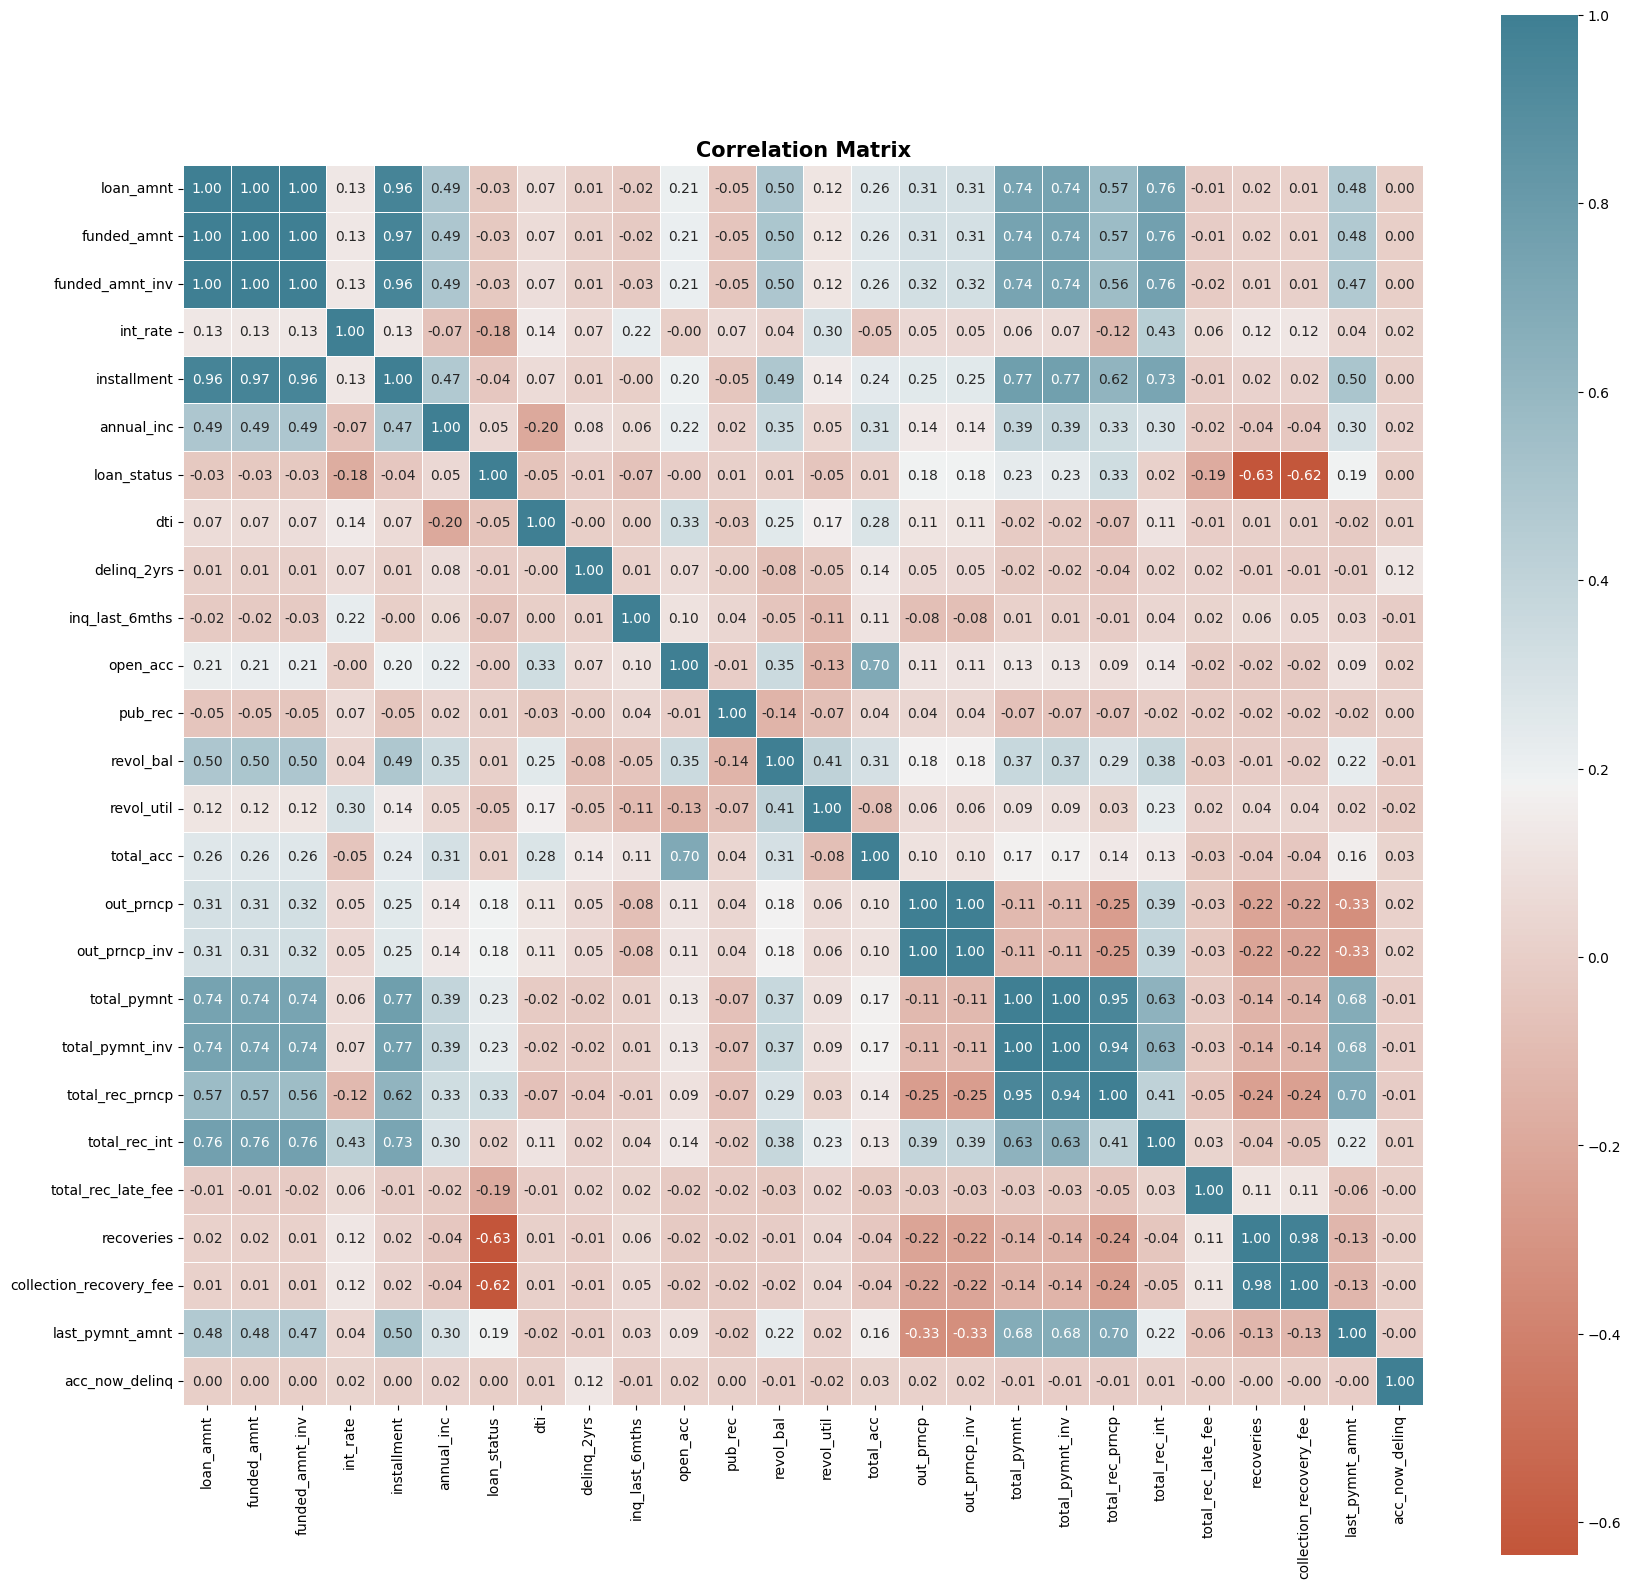

In [100]:
# Create Heatmap Correlation Chart for Each Numerical Features
plt.figure(figsize=(20, 20))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

In [101]:
# Calculate the correlation matrix
corr_matrix = df.corr().abs()

# Create a mask to get the upper triangle of the correlation matrix
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

# Apply the mask to get the upper triangle values of the correlation matrix
upper = corr_matrix.where(mask)

# Find columns with high correlation (correlation coefficient > 0.7)
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

print("Columns with high correlation (> 0.7):", to_drop_hicorr)


Columns with high correlation (> 0.7): ['funded_amnt', 'funded_amnt_inv', 'installment', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'collection_recovery_fee', 'last_pymnt_amnt']


In [102]:
# Showing High Corelation
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt']

In [103]:
# Drop Columns High Corelation
df.drop(to_drop_hicorr, axis=1, inplace=True)

## Handling Outlier

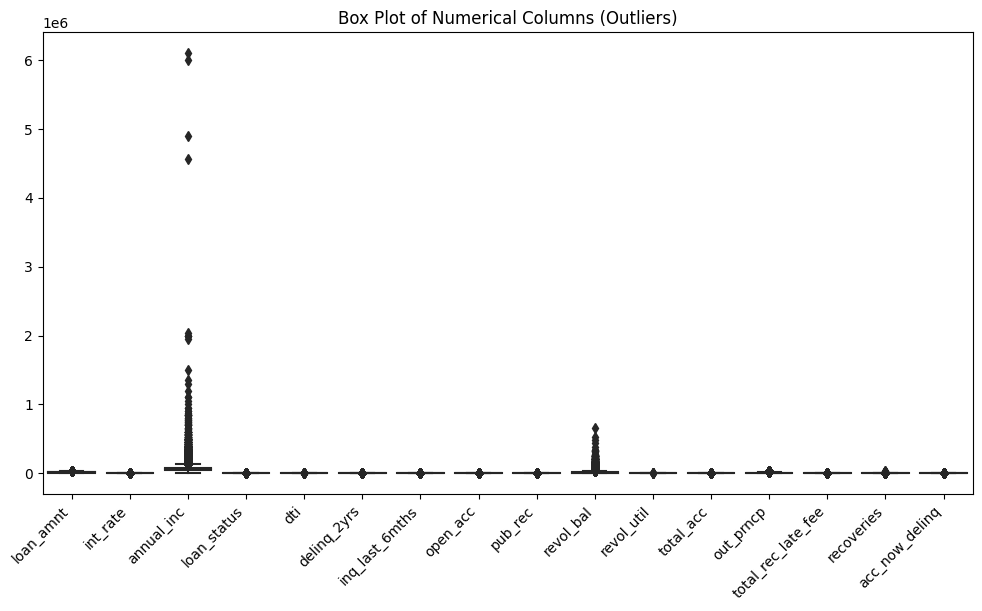

In [104]:
# Showing Outlier
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Create a box plot for each numerical column
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_columns, palette='viridis')
plt.title('Box Plot of Numerical Columns (Outliers)')
plt.xticks(rotation=45, ha='right')
plt.show()


In [105]:
# Showing Percentage Data Outlier

# Filter numeric columns
numeric_columns = df.select_dtypes(include=[int, float]).columns

df_outlier = []
for column in numeric_columns:
    if df[column].dtype != 'O':  # Exclude non-numeric columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        condition = (df[column] < lower_bound) | (df[column] > upper_bound)
        outlier_count = df.loc[condition, column].count()
        outlier_percentage = (outlier_count / df[column].count()) * 100
        df_outlier.append([column, outlier_count, upper_bound, lower_bound, round(outlier_percentage, 2)])

df_outlier = pd.DataFrame(columns=['Kolom', 'Jumlah Outlier', 'Upper Bound', 'Lower Bound', 'Persentase'],
                          data=df_outlier)

# Sort the DataFrame by the "Persentase" column in descending order
df_outlier = df_outlier.sort_values(by='Persentase', ascending=False)
df_outlier

,Kolom,Jumlah Outlier,Upper Bound,Lower Bound,Persentase
5,delinq_2yrs,27726,0.000,0.000,14.12
3,loan_status,24941,1.000,1.000,12.70
8,pub_rec,20753,0.000,0.000,10.57
6,inq_last_6mths,14812,2.500,-1.500,7.54
14,recoveries,10877,0.000,0.000,5.54
12,out_prncp,10794,15770.775,-9462.465,5.50
9,revol_bal,8718,30754.500,-9737.500,4.44
2,annual_inc,7731,131750.000,-15050.000,3.94
11,total_acc,5380,46.500,-5.500,2.74
0,loan_amnt,5012,31700.000,-7500.000,2.55


In [106]:
# Checking Distribution below Q1 and above Q3

# Make Function to checking Outlier
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
outlier = {
    'delinq_2yrs': [q1['delinq_2yrs'], q3['delinq_2yrs']],
    'pub_rec': [q1['pub_rec'], q3['pub_rec']],
    'inq_last_6mths': [q1['inq_last_6mths'], q3['inq_last_6mths']],
    'recoveries': [q1['recoveries'], q3['recoveries']],
    'out_prncp': [q1['out_prncp'], q3['out_prncp']],
    'annual_inc': [q1['annual_inc'], q3['annual_inc']],
    'revol_bal': [q1['revol_bal'], q3['revol_bal']],
    'revol_util': [q1['revol_util'], q3['revol_util']],
    'open_acc': [q1['open_acc'], q3['open_acc']],
    'total_acc': [q1['total_acc'], q3['total_acc']],
    'acc_now_delinq': [q1['acc_now_delinq'], q3['acc_now_delinq']],
    'loan_amnt': [q1['loan_amnt'], q3['loan_amnt']],
    'total_rec_late_fee': [q1['total_rec_late_fee'], q3['total_rec_late_fee']],
    'int_rate': [q1['int_rate'], q3['int_rate']],
    'dti': [q1['dti'], q3['dti']],}

# Membuat dataframe dari data di atas
df_summary = pd.DataFrame(outlier, index=['Q1', 'Q3'])
df_summary = df_summary.transpose()
df_summary

,Q1,Q3
delinq_2yrs,0.00,0.00
pub_rec,0.00,0.00
inq_last_6mths,0.00,1.00
recoveries,0.00,0.00
out_prncp,0.00,6308.31
annual_inc,40000.00,76700.00
revol_bal,5447.00,15570.00
revol_util,39.30,74.20
open_acc,7.00,13.00
total_acc,14.00,27.00


In [107]:
# Showing distribution data below q1 = 0.0 in 5 bins
df[df['delinq_2yrs']<= 0.0]['delinq_2yrs'].value_counts(bins=5).sort_index()

# Showing distribution data above q3 in 5 bins
df[df['delinq_2yrs']>=0.0]['delinq_2yrs'].value_counts(bins=5).sort_index()

(-0.025, 4.8]    195538
(4.8, 9.6]          713
(9.6, 14.4]          58
(14.4, 19.2]         12
(19.2, 24.0]          2
Name: delinq_2yrs, dtype: int64

In [108]:
# Showing distribution data below q1 = 0.0 in 5 bins
df[df['pub_rec']<= 0.0]['pub_rec'].value_counts(bins=5).sort_index()

# Showing distribution data above q3 in 5 bins
df[df['pub_rec']>=0.0]['pub_rec'].value_counts(bins=5).sort_index()

(-0.018000000000000002, 3.4]    196013
(3.4, 6.8]                         277
(6.8, 10.2]                         29
(10.2, 13.6]                         2
(13.6, 17.0]                         2
Name: pub_rec, dtype: int64

In [109]:
# Showing distribution data below q1 = 0.0 in 5 bins
df[df['inq_last_6mths']<= 0.0]['inq_last_6mths'].value_counts(bins=5).sort_index()

# Showing distribution data above q3 in 5 bins
df[df['inq_last_6mths']>=1.0]['inq_last_6mths'].value_counts(bins=5).sort_index()

(0.968, 7.2]    93980
(7.2, 13.4]        70
(13.4, 19.6]       11
(19.6, 25.8]        2
(25.8, 32.0]        4
Name: inq_last_6mths, dtype: int64

In [110]:
# Showing distribution data below q1 = 0.0 in 5 bins
df[df['recoveries']<= 0.0]['recoveries'].value_counts(bins=5).sort_index()

# Showing distribution data above q3 in 5 bins
df[df['recoveries']>=0.0]['recoveries'].value_counts(bins=5).sort_index()

(-29.283, 5856.414]       196164
(5856.414, 11712.828]        137
(11712.828, 17569.242]        14
(17569.242, 23425.656]         6
(23425.656, 29282.07]          2
Name: recoveries, dtype: int64

In [111]:
# Showing distribution data below q1 = 0.0 in 5 bins
df[df['out_prncp']<= 0.0]['out_prncp'].value_counts(bins=5).sort_index()

# Showing distribution data above q3 in 5 bins
df[df['out_prncp']>=1903.16]['out_prncp'].value_counts(bins=5).sort_index()

(1872.902, 7954.604]      45962
(7954.604, 14006.048]     25168
(14006.048, 20057.492]     9953
(20057.492, 26108.936]     3522
(26108.936, 32160.38]      1055
Name: out_prncp, dtype: int64

In [112]:
# Showing distribution data below q1 in 5 bins
df[df['annual_inc']<= 40000.00]['annual_inc'].value_counts(bins=5).sort_index()

(1857.895, 9516.8]       57
(9516.8, 17137.6]      1537
(17137.6, 24758.4]     5773
(24758.4, 32379.2]    16646
(32379.2, 40000.0]    26032
Name: annual_inc, dtype: int64

In [113]:
# Showing distribution data above q3 in 5 bins
df[df['annual_inc']>=76700.00]['annual_inc'].value_counts(bins=5).sort_index()

(70676.699, 1281360.0]    49072
(1281360.0, 2486020.0]        8
(2486020.0, 3690680.0]        0
(3690680.0, 4895340.0]        1
(4895340.0, 6100000.0]        3
Name: annual_inc, dtype: int64

In [114]:
# Showing distribution data below q1 in 5 bins
df[df['revol_bal']<= 5447.00]['revol_bal'].value_counts(bins=5).sort_index()

(-5.448, 1089.4]     6364
(1089.4, 2178.8]     7137
(2178.8, 3268.2]     9409
(3268.2, 4357.6]    12529
(4357.6, 5447.0]    13653
Name: revol_bal, dtype: int64

In [115]:
# Showing distribution data above q3 in 5 bins
df[df['revol_bal']>= 15570.00]['revol_bal'].value_counts(bins=5).sort_index()

(14923.858, 144798.2]    48969
(144798.2, 274026.4]       102
(274026.4, 403254.6]         8
(403254.6, 532482.8]         3
(532482.8, 661711.0]         1
Name: revol_bal, dtype: int64

In [116]:
# Showing distribution data below q1 in 5 bins
df[df['revol_util']<= 39.30]['revol_util'].value_counts(bins=5).sort_index()

(-0.0403, 7.86]     4944
(7.86, 15.72]       5914
(15.72, 23.58]      8644
(23.58, 31.44]     12727
(31.44, 39.3]      16990
Name: revol_util, dtype: int64

In [117]:
# Showing distribution data below q1 in 5 bins
df[df['open_acc']<= 7.0]['open_acc'].value_counts(bins=5).sort_index()

(0.993, 2.2]      981
(2.2, 3.4]       2857
(3.4, 4.6]       6519
(4.6, 5.8]      10822
(5.8, 7.0]      32587
Name: open_acc, dtype: int64

In [118]:
# Showing distribution data above q3 in 5 bins
df[df['open_acc']>= 13.0]['open_acc'].value_counts(bins=5).sort_index()

(12.936, 25.6]    54257
(25.6, 38.2]       1975
(38.2, 50.8]         88
(50.8, 63.4]          9
(63.4, 76.0]          1
Name: open_acc, dtype: int64

In [119]:
# Showing distribution data below q1 in 5 bins
df[df['total_acc']<= 14.00]['total_acc'].value_counts(bins=5).sort_index()

(0.986, 3.6]      435
(3.6, 6.2]       5667
(6.2, 8.8]       7845
(8.8, 11.4]     17881
(11.4, 14.0]    22949
Name: total_acc, dtype: int64

In [120]:
# Showing distribution data above q3 in 5 bins
df[df['total_acc']>= 27.00]['total_acc'].value_counts(bins=5).sort_index()

(26.869999999999997, 52.8]    51543
(52.8, 78.6]                   2380
(78.6, 104.4]                    49
(104.4, 130.2]                    2
(130.2, 156.0]                    1
Name: total_acc, dtype: int64

In [121]:
# Showing distribution data below q1 in 5 bins
df[df['acc_now_delinq']<= 0.0]['acc_now_delinq'].value_counts(bins=5).sort_index()

# Showing distribution data above q3 in 5 bins
df[df['acc_now_delinq']>= 0.0]['acc_now_delinq'].value_counts(bins=5).sort_index()

(-0.006, 1.0]    196294
(1.0, 2.0]           26
(2.0, 3.0]            2
(3.0, 4.0]            0
(4.0, 5.0]            1
Name: acc_now_delinq, dtype: int64

In [122]:
# Showing distribution data below q1 in 5 bins
df[df['loan_amnt']<= 7200.00]['loan_amnt'].value_counts(bins=5).sort_index()

(493.29900000000004, 1840.0]     2543
(1840.0, 3180.0]                 7303
(3180.0, 4520.0]                 8876
(4520.0, 5860.0]                13175
(5860.0, 7200.0]                18300
Name: loan_amnt, dtype: int64

In [123]:
# Showing distribution data above q3 in 5 bins
df[df['loan_amnt']>= 17000.00]['loan_amnt'].value_counts(bins=5).sort_index()

(16981.999, 20600.0]    21917
(20600.0, 24200.0]      10597
(24200.0, 27800.0]       6334
(27800.0, 31400.0]       5404
(31400.0, 35000.0]       5112
Name: loan_amnt, dtype: int64

In [124]:
# Showing distribution data below q1 in 5 bins
df[df['total_rec_late_fee']<= 0.0]['total_rec_late_fee'].value_counts(bins=5).sort_index()

# Showing distribution data above q3 in 5 bins
df[df['total_rec_late_fee']>= 0.0]['total_rec_late_fee'].value_counts(bins=5).sort_index()

(-0.36, 71.736]       196179
(71.736, 143.472]        134
(143.472, 215.208]         8
(215.208, 286.944]         1
(286.944, 358.68]          1
Name: total_rec_late_fee, dtype: int64

In [125]:
# Showing distribution data below q1 in 5 bins
df[df['int_rate']<= 11.14]['int_rate'].value_counts(bins=5).sort_index()

(5.412999999999999, 6.564]     5616
(6.564, 7.708]                 9171
(7.708, 8.852]                 7855
(8.852, 9.996]                12100
(9.996, 11.14]                16429
Name: int_rate, dtype: int64

In [126]:
# Showing distribution data above q3 in 5 bins
df[df['int_rate']>= 16.99]['int_rate'].value_counts(bins=5).sort_index()

(16.98, 18.804]     21666
(18.804, 20.618]    13488
(20.618, 22.432]     6596
(22.432, 24.246]     4920
(24.246, 26.06]      3470
Name: int_rate, dtype: int64

In [127]:
# Showing distribution data below q1 in 5 bins
df[df['dti']<= 11.16]['dti'].value_counts(bins=5).sort_index()

(-0.012199999999999999, 2.232]     3137
(2.232, 4.464]                     6108
(4.464, 6.696]                    10051
(6.696, 8.928]                    13366
(8.928, 11.16]                    16509
Name: dti, dtype: int64

In [128]:
# Showing distribution data above q3 in 5 bins
df[df['dti']>= 22.64]['dti'].value_counts(bins=5).sort_index()

(22.622, 26.11]    21271
(26.11, 29.58]     14953
(29.58, 33.05]      8181
(33.05, 36.52]      3779
(36.52, 39.99]       945
Name: dti, dtype: int64

In [129]:
# Filtering data
df = df[(df['delinq_2yrs'] <= 4.8)]
df = df[(df['pub_rec'] <= 3.4)]
df = df[(df['inq_last_6mths'] <= 7.2)]
df = df[(df['recoveries'] <= 5856.414)]
df = df[(df['out_prncp'] <= 26108.936)]
df = df[(df['annual_inc'] >= 9516.8) | (df['annual_inc'] <= 1281360.0)]
df = df[(df['revol_bal'] <= 144798.2)]
df = df[(df['revol_util'] >= 7.86)]
df = df[(df['open_acc'] >= 2.2) | (df['open_acc'] <= 38.2)]
df = df[(df['total_acc'] >= 6.2) | (df['total_acc'] <= 78.6)]
df = df[(df['acc_now_delinq'] <=  1.0)]
df = df[(df['loan_amnt'] >= 1840.0)]
df = df[(df['total_rec_late_fee'] <= 71.736)]
df = df[(df['int_rate'] <= 26.06)]
df = df[(df['dti'] >= 2.232) |(df['dti'] <= 36.52)]

In [130]:
df.shape

(186488, 29)

# Data Analysis

In [131]:
# # Create Countplot by Loan Status

# plt.figure(figsize=(10,5))
# sns.countplot(y=df['grade'], palette=['#002855']*2 + ['#9e9e9e']*5, order = df['grade'].value_counts().index)
# plt.title('Number of Grade', fontsize=14)
# y_numbers = range(7)
# for i in y_numbers:
#     plt.text(y = y_numbers[i], x = df['grade'].value_counts()[i]+(3000), s = str(round(df['grade'].value_counts()[i], 2)), size = 12, ha = 'left', va='center')


<b> `BAD LOAN BY GRADE`

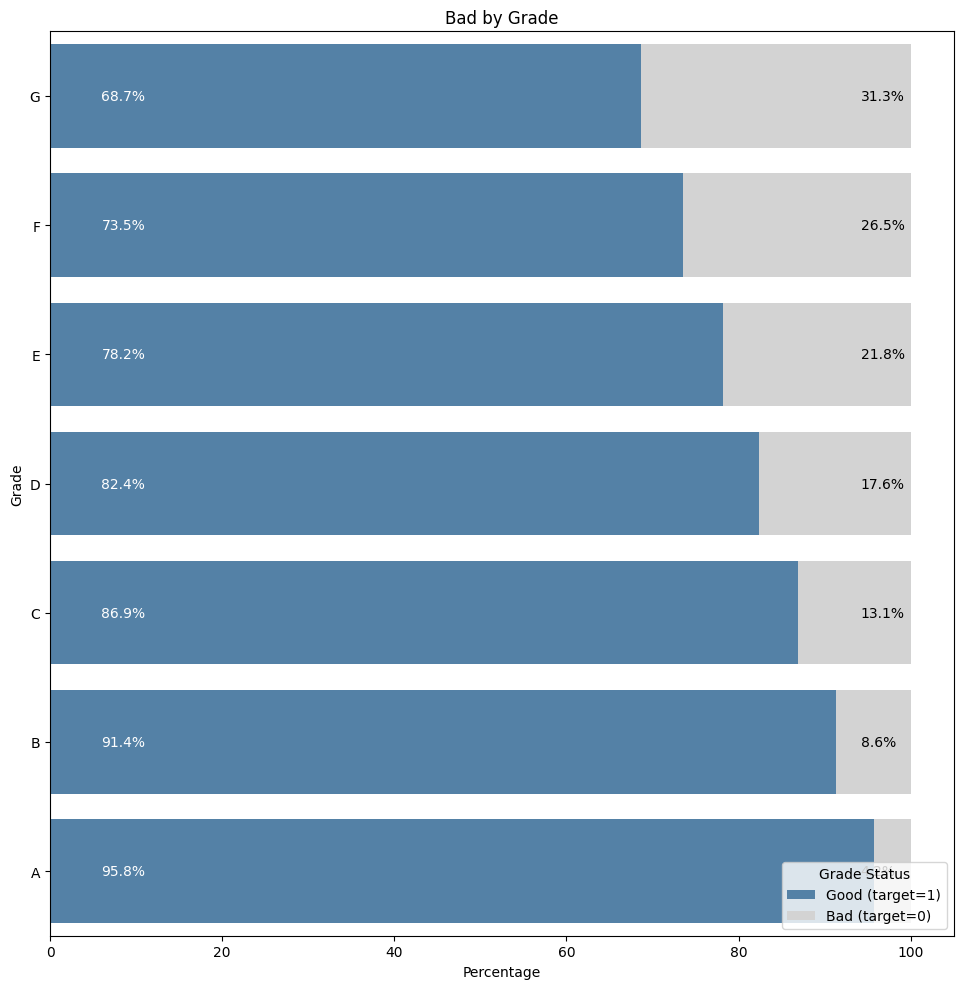

In [132]:
data_viz = df.copy()
data_viz['target'] = data_viz['loan_status']

# Calculate the percentage of bad borrowers for each grade
issue = pd.crosstab(data_viz['grade'], data_viz['target'])
issue_percentage = issue.div(issue.sum(axis=1), axis=0) * 100
issue_percentage.columns = [0, 1]
issue_percentage = issue_percentage.sort_values(by=1, ascending=True)  # Sorting by bad percentage (target=1)

# Plot the horizontal stacked bar chart
plt.figure(figsize=(10, 10))
sns.barplot(data=issue_percentage, y=issue_percentage.index, x=1, color='steelblue', label='Good (target=1)')
sns.barplot(data=issue_percentage, y=issue_percentage.index, x=0, color='lightgray', left=issue_percentage[1], label='Bad (target=0)')


# Calculate the maximum x-coordinate for all labels
max_x = issue_percentage.max(axis=1).max()

# Annotate the percentage on each bar at the maximum x-coordinate
for index, value in enumerate(issue_percentage[1]):
    plt.annotate(f'{value:.1f}%', xy=(max_x, index), xytext=(-525, 0), textcoords='offset points', ha='right', va='center', color='white')

for index, value in enumerate(issue_percentage[0]):
    plt.annotate(f'{value:.1f}%', xy=(max_x, index), xytext=(-10, 0), textcoords='offset points', ha='left', va='center', color='black')

plt.title("Bad by Grade")
plt.xlabel('Percentage')
plt.ylabel('Grade')
plt.legend(title='Grade Status', loc='lower right')

plt.tight_layout()
plt.show()


<b> `OPEN ACCOUNTS &  TOTAL_ACCOUNTS`

| fitur numerikal | keterangan |
| ---------| ------|
| open_acc | Open Accounts jumlah total akun kredit atau akun lainnya yang saat ini aktif dan terbuka atas nama peminjam
| | akun terbuka mencakup berbagai jenis akun seperti kartu kredit, pinjaman pribadi, hipotek, pinjaman mobil, dan lain sebagainya.
| total_acc |  total jumlah akun kredit yang dimiliki oleh individu


In [133]:
# merubah tipe data agar bisa mudah dianalisis
df['open_acc'] = df['open_acc'].astype(int)
df['total_acc'] = df['total_acc'].astype(int)
df['acc_now_delinq'] = df['acc_now_delinq'].astype(int)

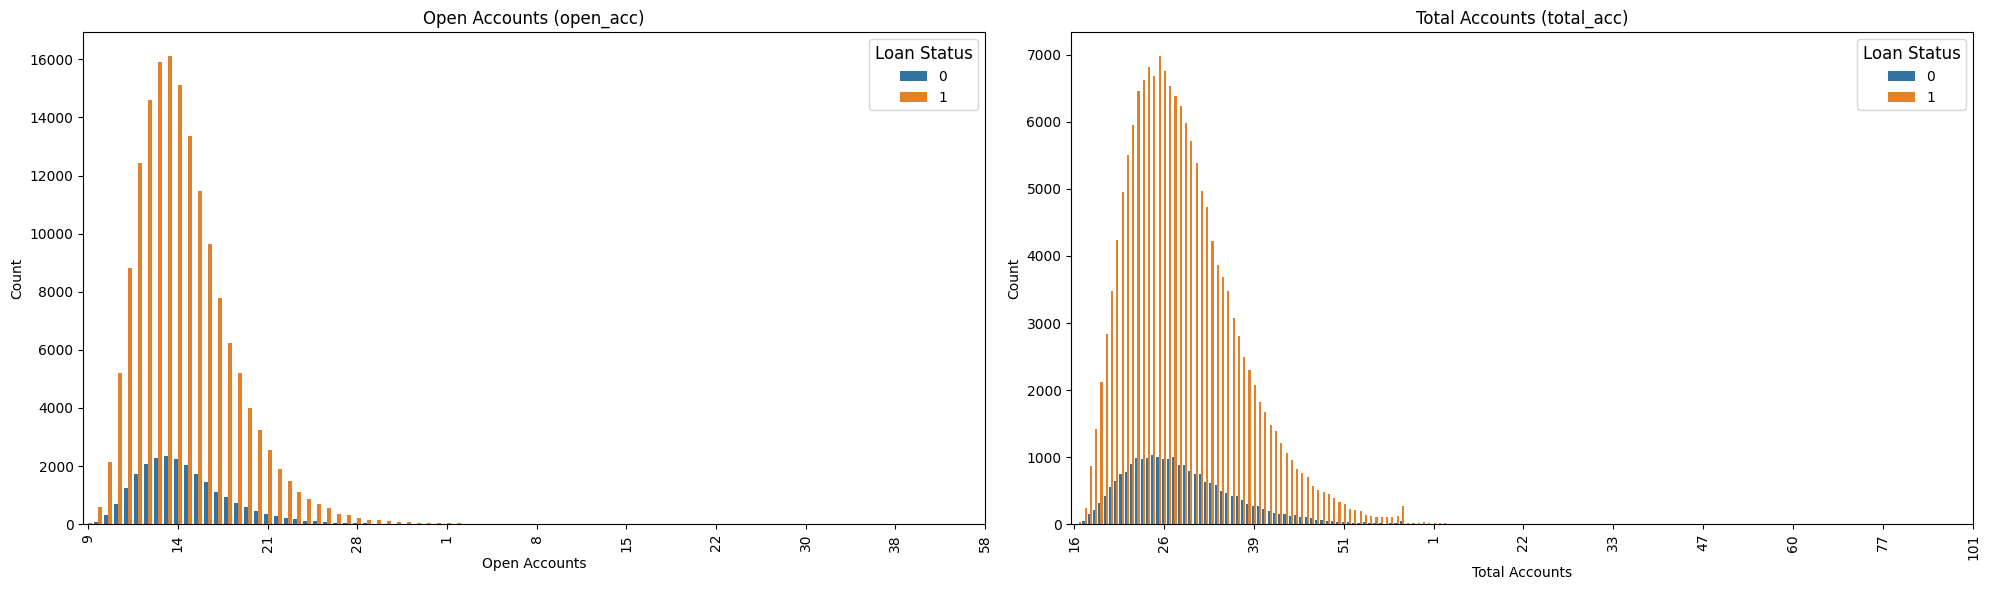

open_acc terendah : 1
total_acc terendah : 1
open_acc tertinggi : 76
total_acc tertinggi : 156


In [134]:
# Showing Distribution open_acc & total_acc by Loan Status

# Menghitung jumlah nilai unik pada kolom 'open_acc' berdasarkan 'loan_status' dan ambil 50 data teratas
open_acc_counts = df.groupby('loan_status')['open_acc'].value_counts().reset_index(name='count').groupby('open_acc').head(50)

# Menghitung jumlah nilai unik pada kolom 'total_acc' berdasarkan 'loan_status' dan ambil 70 data teratas
total_acc_counts = df.groupby('loan_status')['total_acc'].value_counts().reset_index(name='count').groupby('total_acc').head(70)

# Membuat dua subplot dalam satu baris menggunakan plt.subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot pertama untuk 'open_acc'
sns.barplot(x='open_acc', y='count', hue='loan_status', data=open_acc_counts, ax=ax1)
ax1.set_title('Open Accounts (open_acc)')
ax1.set_xlabel('Open Accounts')
ax1.set_ylabel('Count')

# Atur posisi dan label sumbu x agar tidak tertumpuk
x_ticks = range(0, len(open_acc_counts['open_acc']), len(open_acc_counts['open_acc']) // 10)
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(open_acc_counts['open_acc'][x_ticks], rotation=90)

# Plot kedua untuk 'total_acc'
sns.barplot(x='total_acc', y='count', hue='loan_status', data=total_acc_counts, ax=ax2)
ax2.set_title('Total Accounts (total_acc)')
ax2.set_xlabel('Total Accounts')
ax2.set_ylabel('Count')

# Atur posisi dan label sumbu x agar tidak tertumpuk
x_ticks = range(0, len(total_acc_counts['total_acc']), len(total_acc_counts['total_acc']) // 10)
ax2.set_xticks(x_ticks)
ax2.set_xticklabels(total_acc_counts['total_acc'][x_ticks], rotation=90)

# Tambahkan legenda ke setiap subplot
ax1.legend(title='Loan Status', title_fontsize='12', loc='upper right')
ax2.legend(title='Loan Status', title_fontsize='12', loc='upper right')
plt.tight_layout()
plt.show()

print('open_acc terendah :', df['open_acc'].min())
print('total_acc terendah :', df['total_acc'].min())
print('open_acc tertinggi :', df['open_acc'].max())
print('total_acc tertinggi :', df['total_acc'].max())


<b> `DELINQUENCY_2YEARS , INQUARY_LAST_6MONTHS & PUBLIC_RECORDS`

| fitur | keterangan |
| ---------| ------|
| delinq_2yrs | tunggakan dalam 2 tahun terakhir
| inq_last_6mths |Permintaan Kredit dalam 6 Bulan Terakhir
| pub_rec |  catatan publik yang ada dalam riwayat kredit peminjam.
| | Contoh catatan publik termasuk kebangkrutan, lelang properti, gugatan hukum, dan tagihan pajak yang tertunggak.

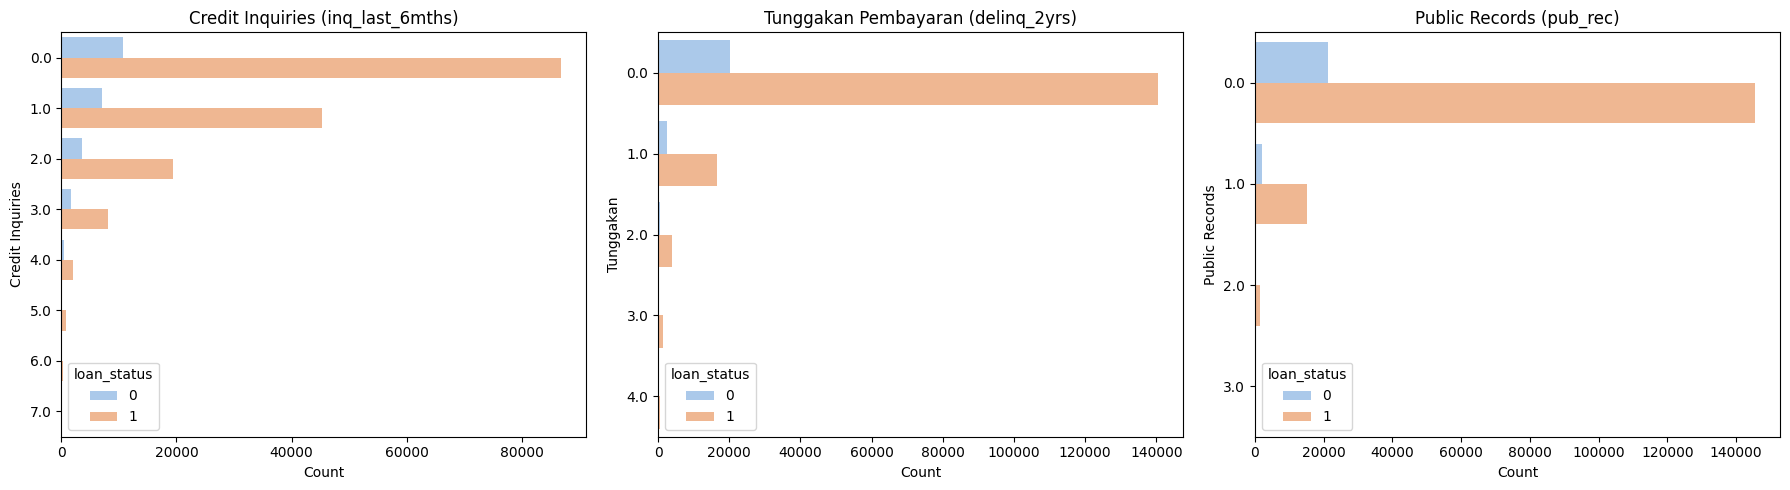

In [135]:
# Showing total delinq_2yrs , inq_last_6mths , pub_rec by Loan Status
plt.figure(figsize=(18, 5))
# Plot pertama untuk 'inq_last_6mths' dengan hue 'loan_status'
plt.subplot(1, 3, 1)
sns.countplot(y='inq_last_6mths', data=df, hue='loan_status', palette='pastel')
plt.title('Credit Inquiries (inq_last_6mths)')
plt.xlabel('Count')
plt.ylabel('Credit Inquiries')

# Plot kedua untuk 'delinq_2yrs' dengan hue 'loan_status'
plt.subplot(1, 3, 2)
sns.countplot(y='delinq_2yrs', data=df, hue='loan_status', palette='pastel')
plt.title('Tunggakan Pembayaran (delinq_2yrs)')
plt.xlabel('Count')
plt.ylabel('Tunggakan')

# Plot ketiga untuk 'pub_rec' dengan hue 'loan_status'
plt.subplot(1, 3, 3)
sns.countplot(y='pub_rec', data=df, hue='loan_status', palette='pastel')
plt.title('Public Records (pub_rec)')
plt.xlabel('Count')
plt.ylabel('Public Records')

plt.tight_layout()
plt.show()


<b> `RECOVERIES , OUTSTANDING PRINCIPAL & DELINQUENT ACCOUNT `

| fitur numerikal | keterangan |
| ---------| ------|
| recoveries | dana yang berhasil dikumpulkan oleh pemberi pinjaman setelah peminjam mengalami masalah pembayaran dan akhirnya gagal membayar pinjaman
| out_prncp | outstanding principal" atau "sisa pokok pinjaman yang belum dilunasi
| acc_now_delinq |  jumlah akun saat ini yang memiliki keterlambatan pembayaran.

In [136]:
# Acc_now_delinq di doniminasi oleh 0:
# 0: Tidak ada akun yang sedang dalam status tunggakan pembayaran (tidak ada tunggakan).
# 1-5: Jumlah akun saat ini yang sedang dalam status tunggakan pembayaran,
# dengan angka yang menunjukkan jumlah akun yang mengalami tunggakan (misalnya, 1 berarti ada satu akun dalam status tunggakan,
# 2 berarti ada dua akun dalam status tunggakan, dan seterusnya).

In [137]:
df['recoveries'].value_counts().head(2)

0.0      176307
100.0         5
Name: recoveries, dtype: int64

In [138]:
df['out_prncp'].value_counts().head(2)

0.00       92923
6563.61       53
Name: out_prncp, dtype: int64

In [139]:
df['acc_now_delinq'].value_counts().head(2)

0    186098
1       390
Name: acc_now_delinq, dtype: int64

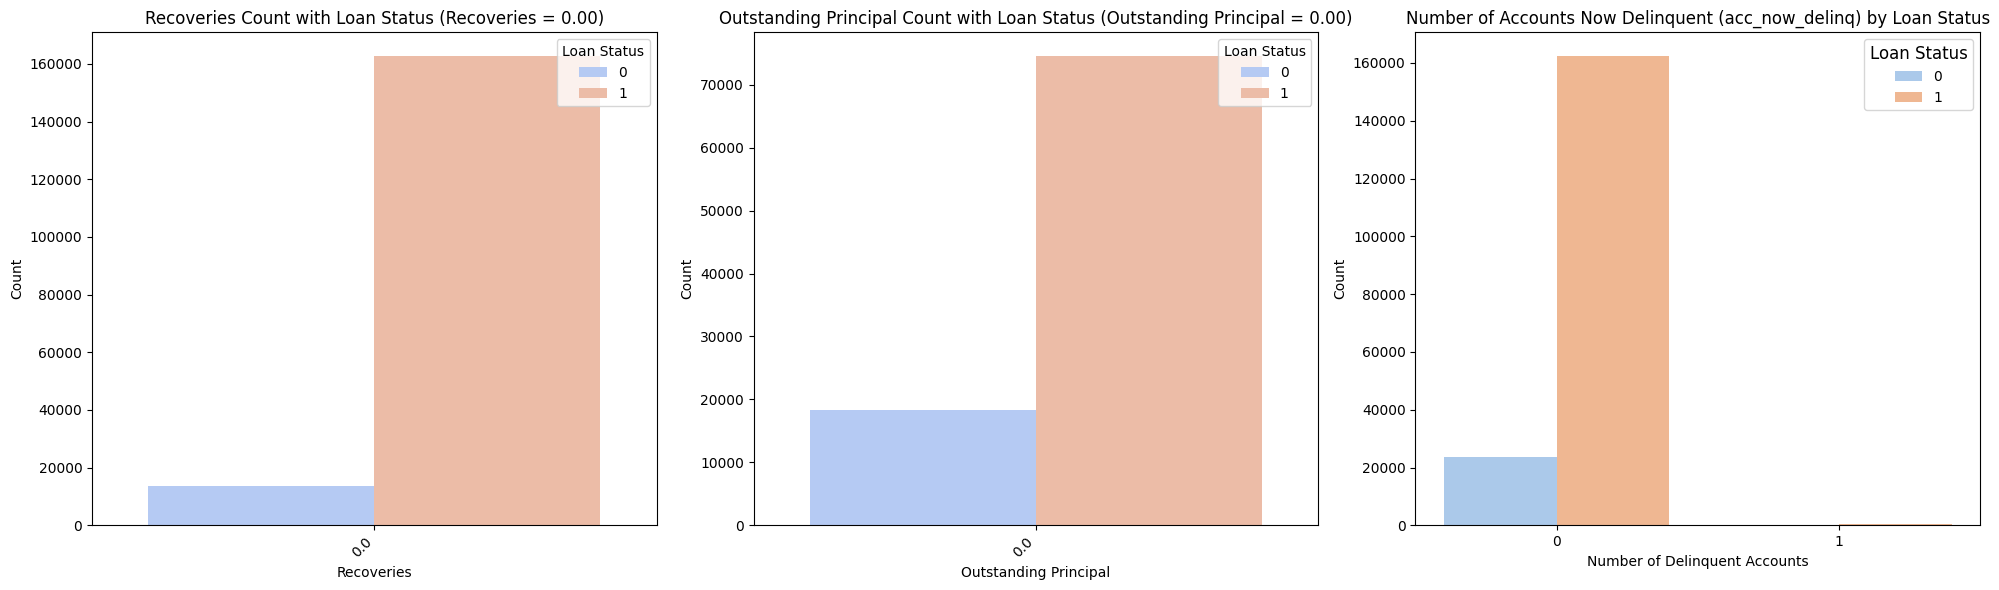

In [140]:
# Showing total recoveries , out_prncp , acc_now_delinq by Loan Status

# Filter the DataFrame to get rows where 'recoveries' is equal to 0.00
df_recoveries_zero = df[df['recoveries'] == 0.00]
df_out_prncp_zero = df[df['out_prncp'] == 0.00]

# Create a figure with three subplots (one row and three columns)
plt.figure(figsize=(20, 6))

# First subplot for 'recoveries'
plt.subplot(1, 3, 1)
sns.countplot(data=df_recoveries_zero, x='recoveries', hue='loan_status', palette='coolwarm')
plt.xlabel('Recoveries')
plt.ylabel('Count')
plt.title('Recoveries Count with Loan Status (Recoveries = 0.00)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status', loc='upper right')

# Second subplot for 'out_prncp'
plt.subplot(1, 3, 2)
sns.countplot(data=df_out_prncp_zero, x='out_prncp', hue='loan_status', palette='coolwarm')
plt.xlabel('Outstanding Principal')
plt.ylabel('Count')
plt.title('Outstanding Principal Count with Loan Status (Outstanding Principal = 0.00)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status', loc='upper right')

# Third subplot for 'acc_now_delinq'
plt.subplot(1, 3, 3)
acc_now_delinq_counts = df.groupby(['loan_status', 'acc_now_delinq']).size().reset_index(name='count')
sns.barplot(x='acc_now_delinq', y='count', hue='loan_status', data=acc_now_delinq_counts, palette='pastel')
plt.title('Number of Accounts Now Delinquent (acc_now_delinq) by Loan Status')
plt.xlabel('Number of Delinquent Accounts')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', title_fontsize='12', loc='upper right')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


<b> `REVOLVER BALANCE & REVOLVING UTILIZATION`

| fitur numerikal | keterangan |
| ---------| ------|
| revol_bal | revolving balance saldo yang harus dibayar pada akun kartu kredit
| | Misalnya, jika revol_bal adalah 5000 berarti saldo yang harus dibayar pada akun kartu kredit atau kredit tersebut adalah $5000 Saldo ini mencerminkan jumlah total utang yang belum dilunasi oleh pemegang akun pada saat tertentu.
| revol_util | revolving utilization, penggunaan kredit berputar (revolving credit) dari total kredit yang tersedia pada akun kartu kredit atau kredit


In [141]:
#jika revol_util adalah 50%, itu berarti pemegang akun telah menggunakan sekitar 50% dari total kredit yang tersedia
# pada akun kartu kredit atau kredit tersebut. Misalnya, jika total kredit yang tersedia adalah $10,000,
# maka penggunaan kredit berputar saat ini adalah $5,000

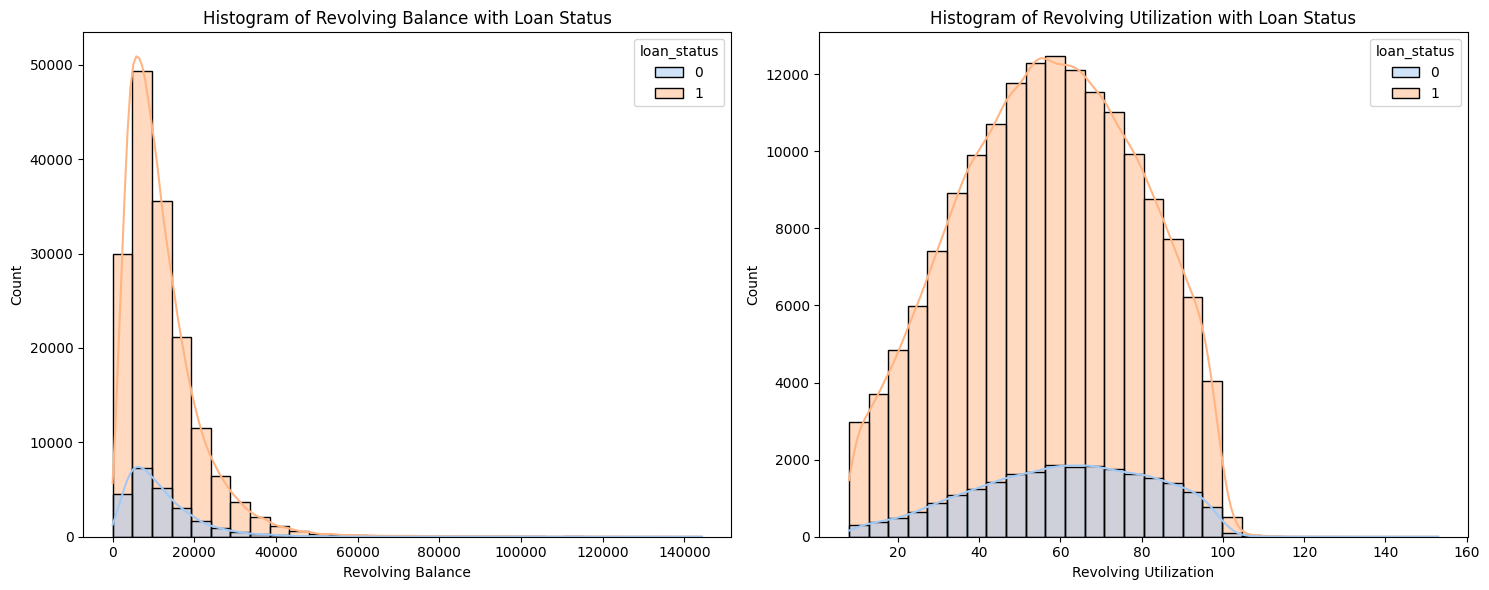

In [142]:
# Showing Revolving Balance and Revolving Utilization by loan_status
# Histogram of revol_bal with hue loan_status
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='revol_bal', bins=30, kde=True, hue='loan_status', palette='pastel')
plt.xlabel('Revolving Balance')
plt.ylabel('Count')
plt.title('Histogram of Revolving Balance with Loan Status')

# Histogram of revol_util with hue loan_status
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='revol_util', bins=30, kde=True, hue='loan_status', palette='pastel')
plt.xlabel('Revolving Utilization')
plt.ylabel('Count')
plt.title('Histogram of Revolving Utilization with Loan Status')

plt.tight_layout()
plt.show()


<b> `ANNUAL INCOME & LOAN AMOUNT`

| fitur numerikal | keterangan |
| ---------| ------|
| annual_inc | pemasukan peminjam
| loan_amnt |  jumlah uang yang akan dipinjamkan peminjam


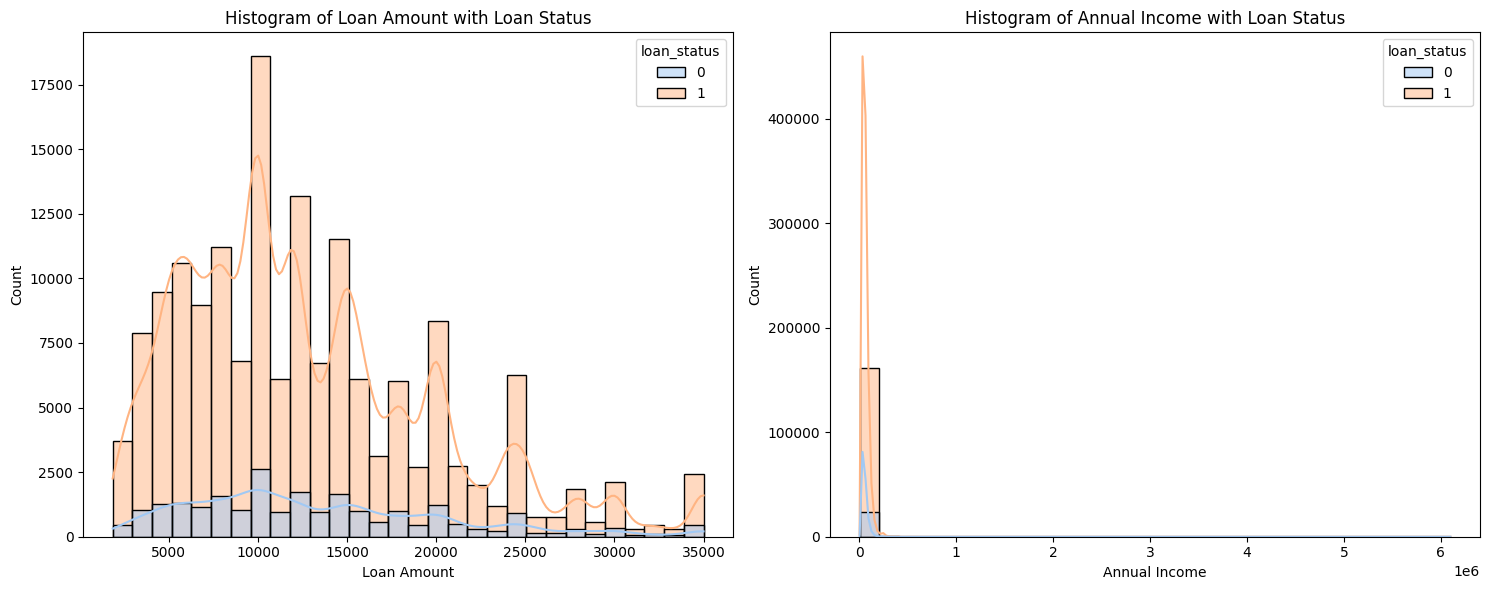

In [143]:
# Histogram of Loan Amount and Annual Income by loan_status

# Create a figure with two subplots (one row and two columns)
plt.figure(figsize=(15, 6))
# First subplot for 'loan_amnt'
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='loan_amnt', bins=30, kde=True, hue='loan_status', palette='pastel')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram of Loan Amount with Loan Status')

# Second subplot for 'annual_inc'
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='annual_inc', bins=30, kde=True, hue='loan_status', palette='pastel')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Histogram of Annual Income with Loan Status')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


<b> `INTEREST RATE & DTI`

| fitur | keterangan |
| ---------| ------|
| int_rate | tingkat bunga yg dibayar oleh peminjam
| dti | Debt-to-Income" ratio, yaitu rasio utang terhadap pendapatan
|     | perbandingan antara total utang seseorang dengan pendapatan bulanannya

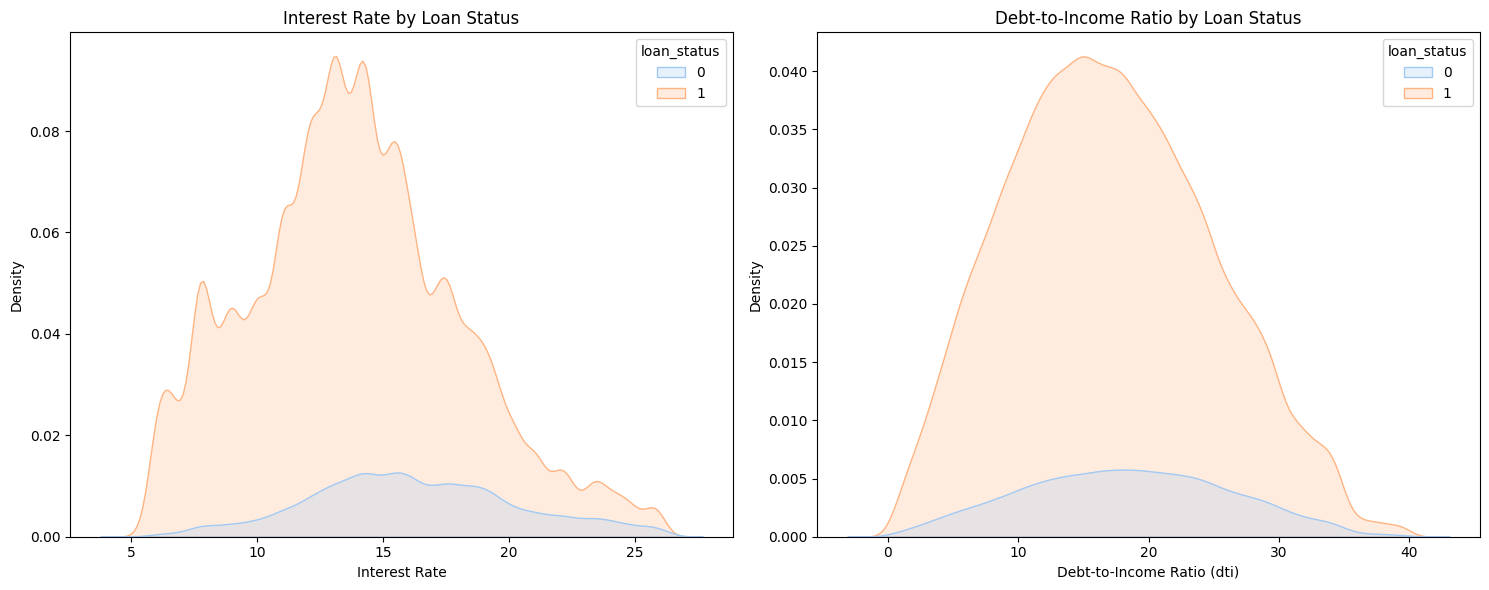

In [144]:
# Density Plot of Interest Rate and Debt-to-Income Ratio by loan_status

# Create a 1x2 subplot for the kernel density plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the kernel density plot for 'int_rate' with hue 'loan_status'
sns.kdeplot(data=df, x='int_rate', hue='loan_status', fill=True, palette='pastel', ax=axes[0])
axes[0].set_xlabel('Interest Rate')
axes[0].set_ylabel('Density')
axes[0].set_title('Interest Rate by Loan Status')

# Plot the kernel density plot for 'dti' with hue 'loan_status'
sns.kdeplot(data=df, x='dti', hue='loan_status', fill=True, palette='pastel', ax=axes[1])
axes[1].set_xlabel('Debt-to-Income Ratio (dti)')
axes[1].set_ylabel('Density')
axes[1].set_title('Debt-to-Income Ratio by Loan Status')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

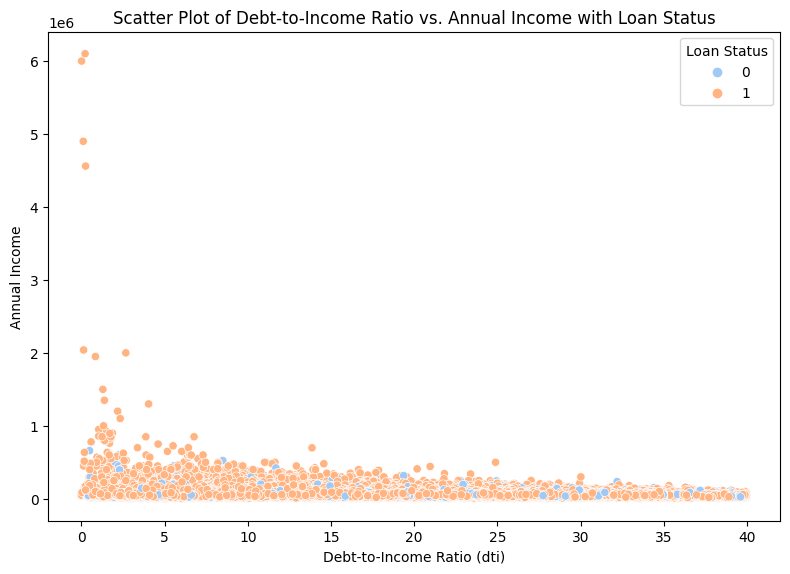

In [145]:
# Scatter Plot of Debt-to-Income Ratio vs. Annual Income with Loan Status

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='dti', y='annual_inc', hue='loan_status', palette='pastel')
plt.xlabel('Debt-to-Income Ratio (dti)')
plt.ylabel('Annual Income')
plt.title('Scatter Plot of Debt-to-Income Ratio vs. Annual Income with Loan Status')
plt.legend(title='Loan Status', loc='upper right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# Machine Learning

In [146]:
!pip install category-encoders

In [147]:
pip install lightgbm


In [148]:
!pip install -U xgboost

In [149]:
# Import library Modeling
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import BinaryEncoder
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186488 entries, 5 to 466283
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   loan_amnt            186488 non-null  int64         
 1   term                 186488 non-null  object        
 2   int_rate             186488 non-null  float64       
 3   grade                186488 non-null  object        
 4   emp_title            186488 non-null  object        
 5   emp_length           186488 non-null  object        
 6   home_ownership       186488 non-null  object        
 7   annual_inc           186488 non-null  float64       
 8   verification_status  186488 non-null  object        
 9   issue_d              186488 non-null  datetime64[ns]
 10  loan_status          186488 non-null  int64         
 11  purpose              186488 non-null  object        
 12  title                186488 non-null  object        
 13  dti           

In [151]:
# drop kolom date
df = df.drop(['issue_d', 'earliest_cr_line','last_pymnt_d','last_credit_pull_d'], axis=1)

In [152]:
# Menghapus kata "tahun" dari kolom 'years_experience'
df['emp_length'] = df['emp_length'].str.replace(' tahun', '', regex=True)
df['term'] = df['term'].str.replace(' tahun', '', regex=True)

In [154]:
# Counting the Number of Unique Values in Categorical Features of a DataFrame
categorical_column = df.describe(include='object').columns
for i in categorical_column:
    print(f'Jumlah nilai unik dari fitur {i} adalah {df[i].nunique()}')

Jumlah nilai unik dari fitur term adalah 2
Jumlah nilai unik dari fitur grade adalah 7
Jumlah nilai unik dari fitur emp_title adalah 87158
Jumlah nilai unik dari fitur emp_length adalah 5
Jumlah nilai unik dari fitur home_ownership adalah 4
Jumlah nilai unik dari fitur verification_status adalah 2
Jumlah nilai unik dari fitur purpose adalah 14
Jumlah nilai unik dari fitur title adalah 20045
Jumlah nilai unik dari fitur initial_list_status adalah 2


In [155]:
# Counting the Number of Unique Values in Categorical Features of a DataFrame
# categorical_column = df.describe(exclude='object').columns
# for i in categorical_column:
#     print(f'Jumlah nilai unik dari fitur {i} adalah {df[i].nunique()}')

Jumlah nilai unik dari fitur loan_amnt adalah 1212
Jumlah nilai unik dari fitur int_rate adalah 478
Jumlah nilai unik dari fitur annual_inc adalah 13100
Jumlah nilai unik dari fitur loan_status adalah 2
Jumlah nilai unik dari fitur dti adalah 3961
Jumlah nilai unik dari fitur delinq_2yrs adalah 5
Jumlah nilai unik dari fitur inq_last_6mths adalah 8
Jumlah nilai unik dari fitur open_acc adalah 54
Jumlah nilai unik dari fitur pub_rec adalah 4
Jumlah nilai unik dari fitur revol_bal adalah 35068
Jumlah nilai unik dari fitur revol_util adalah 1056
Jumlah nilai unik dari fitur total_acc adalah 99
Jumlah nilai unik dari fitur out_prncp adalah 62249
Jumlah nilai unik dari fitur total_rec_late_fee adalah 2496
Jumlah nilai unik dari fitur recoveries adalah 9878
Jumlah nilai unik dari fitur acc_now_delinq adalah 2


In [157]:
# drop kolom yang mendominasi
df = df.drop(['initial_list_status', 'verification_status'], axis=1)

# drop kolom yg banyak memiliki nilai unik
df = df.drop(['emp_title', 'title','total_rec_late_fee'], axis=1)

## Feature Encoding

In [159]:
# Encoding
one_hot_enc = OneHotEncoder(drop='first',handle_unknown='ignore')
one_hot_enc_column = ['term','emp_length','home_ownership']

binary_enc = BinaryEncoder()
binary_enc_column = ['purpose']

ordinal_enc = OrdinalEncoder()
ordinal_enc_column = ['grade']

## Scaling

In [160]:
# Scaling
robust_scaler = RobustScaler()
robust_scaler_column = [
    'loan_amnt','total_acc', 'revol_util', 'revol_bal','acc_now_delinq','out_prncp','recoveries',
    'pub_rec', 'open_acc', 'inq_last_6mths', 'delinq_2yrs', 'dti', 'annual_inc', 'int_rate']


## Data Splitting

In [161]:
# Feature and Target Separation
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [162]:
# Data Splitting Training and Testing 80% 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [163]:
# Column Transformation with Scaling and Column Transformation without Scaling
transformer = ColumnTransformer([
    ('binary', binary_enc, binary_enc_column),
    ('onehot', one_hot_enc, one_hot_enc_column),
    ('ordinal', ordinal_enc, ordinal_enc_column)
], remainder = 'passthrough')

transformer_with_scaler = ColumnTransformer([
    ('binary', binary_enc, binary_enc_column),
    ('onehot', one_hot_enc, one_hot_enc_column),
    ('ordinal', ordinal_enc, ordinal_enc_column),
    ('scaler', robust_scaler, robust_scaler_column)
], remainder = 'passthrough')

## Modelling

In [164]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def cross_val_test(transform):
    logreg = LogisticRegression(random_state=0)
    dt = DecisionTreeClassifier(random_state=0)
    rf = RandomForestClassifier(random_state=0)
    xgb = XGBClassifier(random_state=0)
    lgbm = lgb.LGBMClassifier(objective='binary', random_state=0)

    models = [logreg, dt, rf, xgb, lgbm]
    score = []
    rata = []
    precision = []
    recall = []
    accuracy = []
    roc_auc = []  # Add the roc_auc list

    f2_score = make_scorer(fbeta_score, beta=2)

    for i in models:
        skfold = StratifiedKFold(n_splits=3)
        estimator = Pipeline([
            ('preprocess', transform),
            ('model', i),
        ])
        model_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring=f2_score)
        model_precision = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='precision')
        model_recall = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall')
        model_accuracy = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='accuracy')
        model_roc_auc = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='roc_auc')

        score.append(model_cv)
        rata.append(model_cv.mean())
        precision.append(model_precision.mean())
        recall.append(model_recall.mean())
        accuracy.append(model_accuracy.mean())
        roc_auc.append(model_roc_auc.mean())  # Append ROC AUC to the list

    summary = pd.DataFrame({
        'model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
        'mean ROC AUC': roc_auc , # Add ROC AUC to the DataFrame
        'mean Accuracy': accuracy,
        'mean Precision': precision,
        'mean Recall': recall,
        'mean F2': rata,
    }).set_index('model').sort_values(by='mean ROC AUC', ascending=False)

    return summary


In [165]:
# Result Data Train without Scaler
cross_val_test(transformer)

,mean ROC AUC,mean Accuracy,mean Precision,mean Recall,mean F2
model,,,,,
LightGBM,0.831996,0.927555,0.923535,0.999800,0.983556
XGBoost,0.826210,0.926959,0.923727,0.998810,0.982832
Random Forest,0.815545,0.927428,0.923398,0.999816,0.983537
Logistic Regression,0.725298,0.927475,0.923300,1.000000,0.983657
Decision Tree,0.713613,0.862900,0.928133,0.913711,0.916559


In [166]:
# Result Data Train with Scaler
cross_val_test(transformer_with_scaler)

,mean ROC AUC,mean Accuracy,mean Precision,mean Recall,mean F2
model,,,,,
LightGBM,0.831426,0.927589,0.923537,0.999839,0.983586
XGBoost,0.826210,0.926959,0.923727,0.998810,0.982832
Random Forest,0.814930,0.927354,0.923368,0.999762,0.983488
Logistic Regression,0.812072,0.927488,0.923313,1.000000,0.983660
Decision Tree,0.713513,0.862370,0.928150,0.913035,0.916018


## Predict to Test Set with the Benchmark Model

In [167]:
# Benchmark 2 model terbaik
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, fbeta_score

# Define the models
models = {
    'xgb': XGBClassifier(random_state=0),
    'lgbm': lgb.LGBMClassifier(objective='binary', random_state=0)
}

score_roc_auc = []
score_accuracy = []
score_precision = []
score_recall = []
score_f2 = []

for model_name, model_instance in models.items():
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', model_instance)
    ])

    estimator.fit(X_train, y_train)
    y_pred_prob = estimator.predict_proba(X_test)[:, 1]  # Get the probability of the positive class
    y_pred = estimator.predict(X_test)

    score_roc_auc.append(roc_auc_score(y_test, y_pred_prob))
    score_accuracy.append(accuracy_score(y_test, y_pred))
    score_precision.append(precision_score(y_test, y_pred))
    score_recall.append(recall_score(y_test, y_pred))
    score_f2.append(fbeta_score(y_test, y_pred, beta=2))

score_summary = pd.DataFrame({
    'Models': list(models.keys()),
    'ROC_AUC': score_roc_auc,
    'Accuracy': score_accuracy,
    'Precision': score_precision,
    'Recall': score_recall,
    'F2 Score': score_f2
})

score_summary

,Models,ROC_AUC,Accuracy,Precision,Recall,F2 Score
0,xgb,0.831460,0.928307,0.924787,0.999140,0.983328
1,lgbm,0.836647,0.928361,0.924188,0.999969,0.983835


## Hyperparameter Tuning

In [168]:
# number of trees in the random forest
n_estimators = [5, 20, 50, 100]

# maximum number of levels allowed in each decision tree
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]

# Hyperparameter grid for LightGBM
lgbm_grid = {
    'model__num_leaves': list(np.arange(2, 900, 5)),
    'model__max_depth': max_depth,
    'model__learning_rate': list(np.arange(0.1, 1, 0.01)),
    'model__n_estimators': n_estimators,
    'model__min_data_in_leaf': list(np.arange(10, 101, 2))
}

# Benchmark model with hyperparameter tuning
lgbm_model = lgb.LGBMClassifier(objective='binary', random_state=0)

# Create algorithm chains
estimator_lgbm = Pipeline([
    ('preprocessing', transformer),
    ('model', lgbm_model)
])

from sklearn.model_selection import KFold
# Define the cross-validation object
n_splits = 5  # Number of folds
shuffle = True  # Shuffle the data during cross-validation
random_state = 0  # Random state for reproducibility
crossval = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)

# Hyperparameter tuning
random_lgbm = RandomizedSearchCV(
    estimator_lgbm,
    param_distributions=lgbm_grid,
    n_iter=50,
    cv=crossval,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=0
)

# Fit the randomized search to the data
random_lgbm.fit(X_train, y_train)

# Checking Best Score and Best Params
print('LightGBM')
print('Best_score:', random_lgbm.best_score_)
print('Best_params:', random_lgbm.best_params_)


[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
LightGBM
Best_score: 0.8299834068591107
Best_params: {'model__num_leaves': 122, 'model__n_estimators': 50, 'model__min_data_in_leaf': 90, 'model__max_depth': 70, 'model__learning_rate': 0.14999999999999997}


## Predict to Test Set with the Tuned Model

In [169]:
# Predict to Test Set with the Tuned Model (LightGBM)
# After Tuning
# Model LightGBM
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, fbeta_score, precision_recall_fscore_support
model = {'LGBM': LGBMClassifier(objective='binary', random_state=0)}

# Define model terhadap estimator terbaik
lgbm_tuning = random_lgbm.best_estimator_

# Fitting model
lgbm_tuning.fit(X_train, y_train)

# Predict test set
y_pred_lgbm_tuning = lgbm_tuning.predict(X_test)

# Calculate F2 score
beta = 2  # Set the beta value for F2 score
precision, recall, fbeta_score_lgbm_tuning, _ = precision_recall_fscore_support(y_test, y_pred_lgbm_tuning, beta=beta)

# Calculate Precision, Recall, F2 Score, and ROC AUC after tuning
precision_lgbm_tuning = precision_score(y_test, y_pred_lgbm_tuning)
recall_lgbm_tuning = recall_score(y_test, y_pred_lgbm_tuning)
fbeta_score_lgbm_tuning = fbeta_score(y_test, y_pred_lgbm_tuning, beta=beta)
roc_auc_lgbm_tuning = roc_auc_score(y_test, y_pred_lgbm_tuning)
accuracy_lgbm_tuning = accuracy_score(y_test, y_pred_lgbm_tuning)


index = ['LightGBM After Tuning']
score_lgbm_after_tuning = pd.DataFrame({
    'ROC AUC': roc_auc_lgbm_tuning,
    'Accuracy': accuracy_lgbm_tuning,
    'Precision': precision_lgbm_tuning,
    'Recall': recall_lgbm_tuning,
    'F2 Score': fbeta_score_lgbm_tuning
}, index=index)
score_lgbm_after_tuning

,ROC AUC,Accuracy,Precision,Recall,F2 Score
LightGBM After Tuning,0.719063,0.928334,0.924475,0.99957,0.983591


## Performance Comparison

In [170]:
#Before Tuning
score_summary.rename(index={1: 'LightGBM Before Tuning'}, inplace=True)
score_summary.drop(index=0, inplace=True)
score_summary.drop(columns=['Models'], inplace=True)
score_summary

,ROC_AUC,Accuracy,Precision,Recall,F2 Score
LightGBM Before Tuning,0.836647,0.928361,0.924188,0.999969,0.983835


In [171]:
score_lgbm_after_tuning

,ROC AUC,Accuracy,Precision,Recall,F2 Score
LightGBM After Tuning,0.719063,0.928334,0.924475,0.99957,0.983591


## Confusion Matrix

Text(847.0858585858584, 0.5, 'Actual Class')

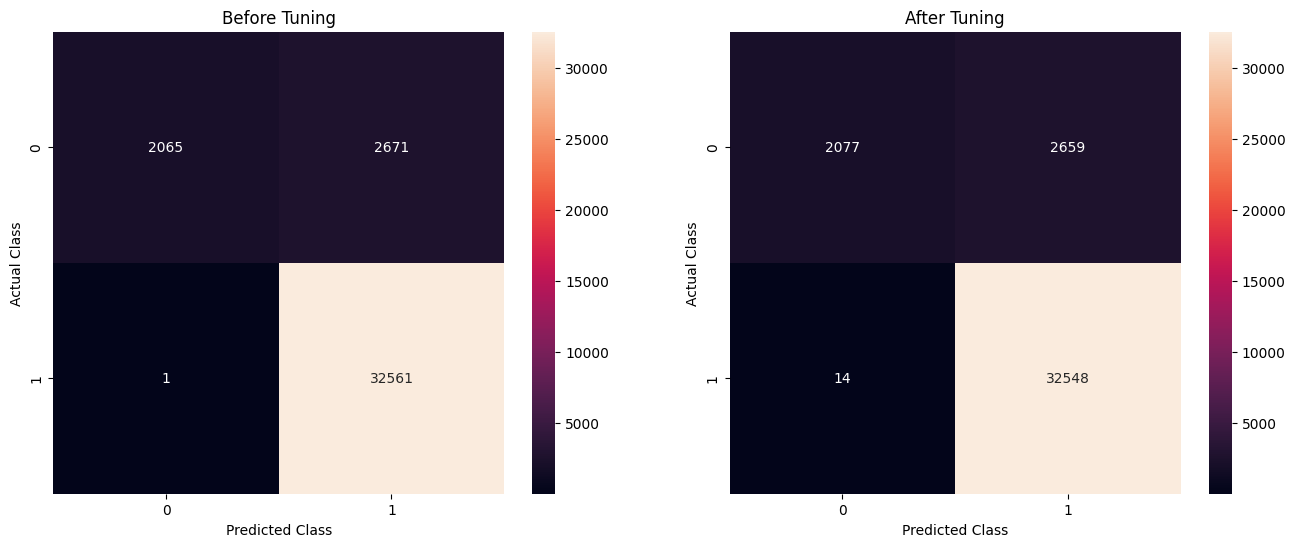

In [172]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.heatmap(confusion_matrix(y_test, y_pred_prob.round()), annot=True, fmt='g').set_title('Before Tuning')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.subplot(122)
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm_tuning), annot=True, fmt='g').set_title('After Tuning')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

## Feature Importance

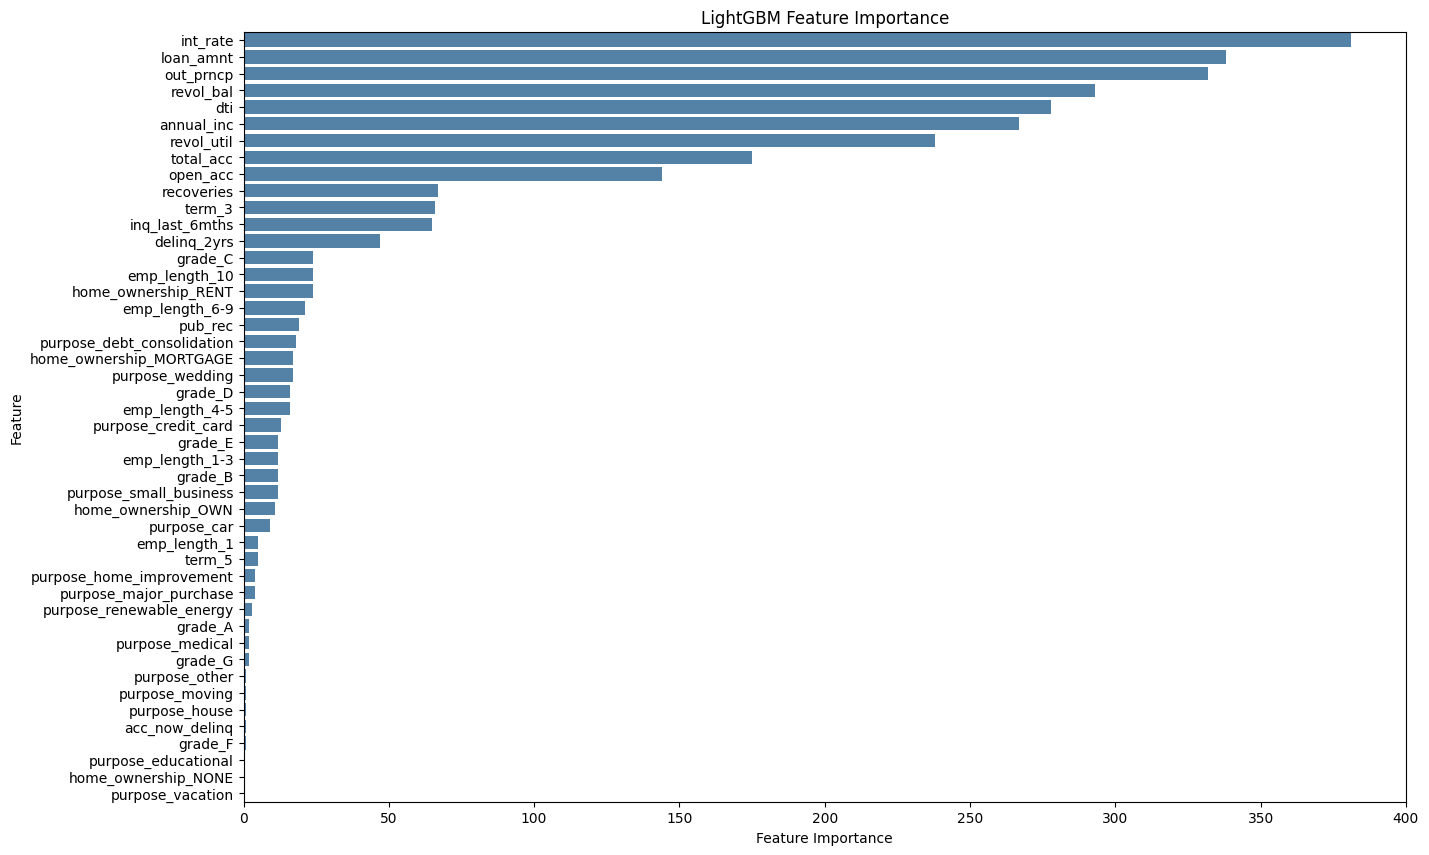

In [177]:

X_train_encoded = pd.get_dummies(X_train, columns=['grade', 'home_ownership', 'purpose','term','emp_length'])
lgbm_model = lgb.LGBMClassifier(objective='binary', random_state=0)
lgbm_model.fit(X_train_encoded, y_train)
lgbm_feature_importance = lgbm_model.feature_importances_


feature_importance_summary = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'LightGBM Importance': lgbm_feature_importance
})


feature_importance_summary = feature_importance_summary.sort_values(by='LightGBM Importance', ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x='LightGBM Importance', y='Feature', data=feature_importance_summary, color='steelblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('LightGBM Feature Importance')
plt.show()


## Conclusion

## Recomendation